In [1]:
from kuramoto.SDL_SVP import SDL_SVP
from kuramoto.SDL_BCD import SDL_BCD
from kuramoto.SNMF import SNMF
from kuramoto.LMF import LMF
from kuramoto.nmf import *

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [2]:
sampling_alg = 'pivot'

ntwk = 'UCLA26' # COVID_PPI, Wisconsin87, Caltech36, UCLA26
ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
save_folder = 'images/'
k1 = 20
k2 = 40

path = "../Data/Networks_all_NDL/" + str(ntwk) + '.txt'
G = nn.NNetwork()
G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
print('num nodes in G', len(G.nodes()))
print('num edges in G', len(G.get_edges()))

num nodes in G 20467
num edges in G 1495226


num of subgraphs induced on k-paths: 900
num of subgraphs induced on k-paths: 900
X.shape (400, 900)
X.shape (1600, 900)


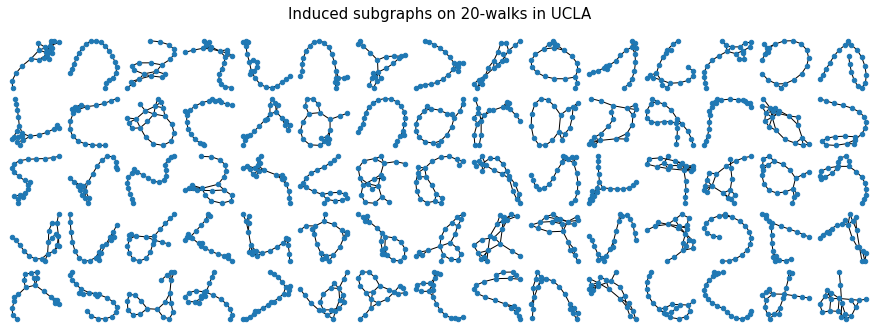

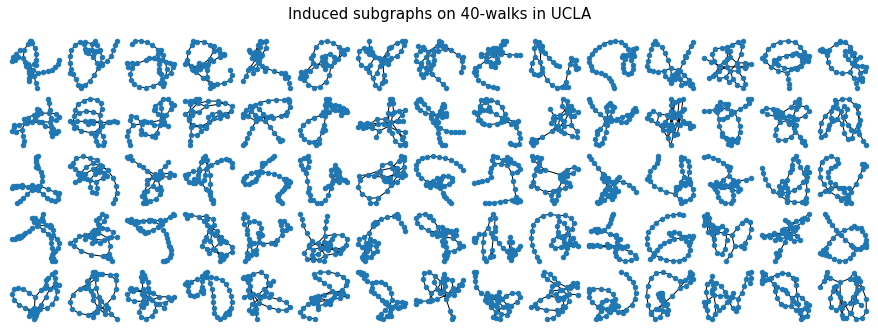

In [3]:
X1, embs1 = G.get_patches(k=k1, sample_size=900, skip_folded_hom=True)
X2, embs2 = G.get_patches(k=k2, sample_size=900, skip_folded_hom=True)

display_graphs(title='Induced subgraphs on {}-walks in {}'.format(k1, ntwk_nonumber),
                 save_path=save_folder + ntwk_nonumber + "_subgraphs_"+ str(sampling_alg) + "_walk", 
                 data = [X1, embs1],
                 grid_shape = [5, 15],
                 fig_size = [15, 5],
                 show_importance=False)

display_graphs(title='Induced subgraphs on {}-walks in {}'.format(k2, ntwk_nonumber),
                 save_path=save_folder + ntwk_nonumber + "_subgraphs_"+ str(sampling_alg) + "_walk", 
                 data = [X2, embs2],
                 grid_shape = [5, 15],
                 fig_size = [15, 5],
                 show_importance=False)

In [4]:
graph_list1 = generate_nxg(X1)
graph_list2 = generate_nxg(X2)

In [5]:
nodes = int(np.sqrt(X1.shape[0]))
df1 = pd.DataFrame()
K = 5

for G in graph_list1:
        
    if nx.is_connected(G):

        adj_mat = nx.to_numpy_array(G)
        temp = pd.DataFrame(np.array(nx.adjacency_matrix(G).todense().flatten('C')))
        
        model = Kuramoto(coupling=K, dt=0.01, T=18, n_nodes=nodes, half_sync=False)

        sim = model.run(adj_mat)
        arr = sim.T[-1]
        conc = pd.DataFrame(pd.Series(synchronization(arr)), columns=['Synchronized'])
            
        temp = pd.concat([temp, conc], axis=1)

        df1 = pd.concat([df1, temp], ignore_index=True)
    
df1

0    1    2    3    4    5    6    7    8    9  ...  391  392  393  \
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
895  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
896  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
897  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
898  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
899  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   

     394  395  396  397  398  399  Synchronized  
0    0.0  0.0  0.0  0.0  1.0  0.0          True  
1    0.0  0.0  0.0  0.0  1.0  0.0         False  
2    0.0  0.0  0.0  0.0  1.0  0.0          True  
3    0.0  0.0  0.0  0.0  1.0  0.0          True  
4    0.0  0.0  0.0  0.0  1.0  0.0         False  
..   ...  ...  ...  ...  ...  ...           ...  
895  0.0  0.0  0.0  0.0  1.0  0.0         False  
896  0.0  0.0  0.0  0.0  1.0  0.0          True  
897  0.0  0.0  0.0  0.0  1.0  0.0         False  
898  0.0  0.0  0.0  0.0  1.0  0.0          True  
899  0.0  0.0  0.0  1.0  1.0  0.0          True  

[900 rows x 401 columns]

In [6]:
print(f"% of synchronized cases: {sum(df1['Synchronized'])/len(df1)}")

% of synchronized cases: 0.5077777777777778


In [7]:
nodes = int(np.sqrt(X2.shape[0]))
df2 = pd.DataFrame()
K = 7.5

for G in graph_list2:
        
    if nx.is_connected(G):

        adj_mat = nx.to_numpy_array(G)
        temp = pd.DataFrame(np.array(nx.adjacency_matrix(G).todense().flatten('C')))
        
        model = Kuramoto(coupling=K, dt=0.01, T=18, n_nodes=nodes, half_sync=False)

        sim = model.run(adj_mat)
        arr = sim.T[-1]
        conc = pd.DataFrame(pd.Series(synchronization(arr)), columns=['Synchronized'])
            
        temp = pd.concat([temp, conc], axis=1)

        df2 = pd.concat([df2, temp], ignore_index=True)
    
df2

0    1    2    3    4    5    6    7    8    9  ...  1591  1592  1593  \
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
3    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
4    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
895  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
896  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
897  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
898  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
899  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

     1594  1595  1596  1597  1598  1599  Synchronized  
0     0.0   0.0   0.0   0.0   1.0   0.0         False  
1     0.0   0.0   0.0   0.0   1.0   0.0         False  
2     0.0   0.0   0.0   0.0   1.0   0.0         False  
3     0.0   0.0   0.0   0.0   1.0   0.0         False  
4     0.0   0.0   0.0   0.0   1.0   0.0         False  
..    ...   ...   ...   ...   ...   ...           ...  
895   1.0   0.0   0.0   1.0   1.0   0.0         False  
896   0.0   0.0   0.0   0.0   1.0   0.0         False  
897   0.0   0.0   0.0   0.0   1.0   0.0         False  
898   0.0   1.0   0.0   1.0   1.0   0.0         False  
899   0.0   0.0   0.0   1.0   1.0   0.0         False  

[900 rows x 1601 columns]

In [8]:
print(f"% of synchronized cases: {sum(df2['Synchronized'])/len(df2)}")

% of synchronized cases: 0.45111111111111113


In [9]:
X20 = df1.drop(['Synchronized'], axis=1).values
Y20 = df1['Synchronized'].values.reshape(-1,1)

X40 = df2.drop(['Synchronized'], axis=1).values
Y40 = df2['Synchronized'].values.reshape(-1,1)

In [10]:
X20_train, X20_test, Y20_train, Y20_test = train_test_split(X20, Y20, 
                                                            test_size=0.25)

X40_train, X40_test, Y40_train, Y40_test = train_test_split(X40, Y40, 
                                                            test_size=0.25)

## SDL_BCD

In [11]:
# SDL_BCD_feature
data_scale=10
results_dict_list20 = []
iteration1 = 200
r = 16

# Cross-validation
xi_list = [0, 0.1, 1, 5, 10]
beta = 1
iter_avg = 2

for j in range(len(xi_list)):
    xi = xi_list[j]
    for i in range(iter_avg):
        data_scale=500
        SDL_BCD_class20 = SDL_BCD(X = [X20_train.T/data_scale, Y20_train.T],
                                X_test = [X20_test.T/data_scale, Y20_test.T],
                                n_components = r,
                                xi = xi,
                                L1_reg = [0,0,0],
                                L2_reg = [0,0,0],
                                nonnegativity = [True,True,False],
                                full_dim = False)

        results_dict_new20 = SDL_BCD_class20.fit(option = "feature",
                                             iter = iteration1, 
                                             subsample_size = None,
                                             beta = beta,
                                             update_nuance_param = False,
                                             if_compute_recons_error = True, 
                                             if_validate = False)

initial loading beta [[ 0.55949661  0.65463502 -0.06111543 -0.2840371   0.96522468  0.1361083
   0.62919895  0.17578354  0.66821092  0.31546148 -0.75675329 -0.08267516
  -0.91443167  0.97128459 -0.89923359 -0.29808971 -0.17537749]]


  3%|█▎                                         | 6/200 [00:00<00:03, 55.20it/s]

--- Training --- [threshold, AUC] =  [0.336, 0.611]
--- Iteration 0: Training loss --- [Data, Label, Total] = [226.367867.3, 507.438169.3, 507.438169.3]


  5%|██                                        | 10/200 [00:00<00:03, 51.49it/s]


--- Training --- [threshold, AUC] =  [0.002, 0.636]
--- Iteration 10: Training loss --- [Data, Label, Total] = [270.808395.3, 2068.870210.3, 2068.870210.3]
Early stopping: training loss increased
!!! pred_type naive
initial loading beta [[ 0.06176664 -0.1731922  -0.14700032  0.68179344  0.24143092  0.48280206
  -0.46368133 -0.89183668  0.6363955  -0.6316611   0.64911528  0.64997907
   0.8299021   0.92440409 -0.03811781 -0.25601527 -0.60288574]]


  4%|█▌                                         | 7/200 [00:00<00:02, 68.39it/s]

--- Training --- [threshold, AUC] =  [1.542, 0.389]
--- Iteration 0: Training loss --- [Data, Label, Total] = [230.887247.3, 469.966569.3, 469.966569.3]


  5%|██                                        | 10/200 [00:00<00:03, 57.70it/s]

--- Training --- [threshold, AUC] =  [0.83, 0.648]
--- Iteration 10: Training loss --- [Data, Label, Total] = [264.611119.3, 658.488996.3, 658.488996.3]
Early stopping: training loss increased
!!! pred_type naive


initial loading beta [[-0.59812902  0.82871853  0.80152732  0.12682193  0.5985064  -0.09805894
   0.28567085  0.37690309 -0.21527137 -0.19507853  0.84685063 -0.2137845
  -0.40638606 -0.00439914  0.76153797  0.25616045  0.6225227 ]]


  4%|█▉                                         | 9/200 [00:00<00:02, 87.03it/s]

--- Training --- [threshold, AUC] =  [0.627, 0.61]
--- Iteration 0: Training loss --- [Data, Label, Total] = [214.531031.3, 489.563351.3, 511.016454.3]


  5%|██                                        | 10/200 [00:00<00:02, 74.32it/s]

--- Training --- [threshold, AUC] =  [0.99, 0.639]
--- Iteration 10: Training loss --- [Data, Label, Total] = [237.396387.3, 1563.642020.3, 1587.381659.3]
Early stopping: training loss increased
!!! pred_type naive


initial loading beta [[-0.76885609 -0.44620251  0.02630624 -0.8691927   0.93357795  0.23015687
   0.84868086 -0.58550344 -0.65905396  0.21383248 -0.13707661  0.81874831
  -0.55658873  0.60830229  0.05774203  0.25440051  0.33823788]]


  4%|█▋                                         | 8/200 [00:00<00:02, 72.14it/s]

--- Training --- [threshold, AUC] =  [1.457, 0.392]
--- Iteration 0: Training loss --- [Data, Label, Total] = [226.844277.3, 470.598093.3, 493.282520.3]


  5%|██                                        | 10/200 [00:00<00:02, 64.33it/s]

--- Training --- [threshold, AUC] =  [0.046, 0.487]
--- Iteration 10: Training loss --- [Data, Label, Total] = [265.225058.3, 1060.309382.3, 1086.831887.3]
Early stopping: training loss increased
!!! pred_type naive


initial loading beta [[ 0.41700816 -0.279619    0.68624275  0.25537718 -0.38156178 -0.2290476
  -0.10692344  0.1764904   0.44905773 -0.42869512  0.3383679  -0.7903146
   0.6475769   0.75037716  0.51463787  0.92756023  0.04584912]]


  4%|█▋                                         | 8/200 [00:00<00:02, 69.62it/s]

--- Training --- [threshold, AUC] =  [0.628, 0.39]
--- Iteration 0: Training loss --- [Data, Label, Total] = [215.395692.3, 489.935148.3, 705.330840.3]


  5%|██                                        | 10/200 [00:00<00:03, 58.90it/s]

--- Training --- [threshold, AUC] =  [0.949, 0.44]
--- Iteration 10: Training loss --- [Data, Label, Total] = [143.366777.3, 1020.116524.3, 1163.483301.3]
Early stopping: training loss increased
!!! pred_type naive


initial loading beta [[-0.60439441  0.80045767  0.25245184  0.04514693 -0.79443991 -0.75762731
  -0.23827043 -0.65116308  0.51926964 -0.2191733   0.43344049  0.50336766
  -0.8741104  -0.70913927  0.22070699  0.80506386 -0.93461836]]


  4%|█▋                                         | 8/200 [00:00<00:02, 76.43it/s]

--- Training --- [threshold, AUC] =  [1.489, 0.388]
--- Iteration 0: Training loss --- [Data, Label, Total] = [213.507364.3, 468.088416.3, 681.595780.3]
--- Training --- [threshold, AUC] =  [0.264, 0.464]
--- Iteration 10: Training loss --- [Data, Label, Total] = [133.488082.3, 554.640102.3, 688.128183.3]


 12%|█████                                     | 24/200 [00:00<00:02, 71.34it/s]

--- Training --- [threshold, AUC] =  [0.243, 0.484]
--- Iteration 20: Training loss --- [Data, Label, Total] = [75.847396.3, 573.217945.3, 649.065341.3]


 16%|██████▋                                   | 32/200 [00:00<00:02, 71.57it/s]

--- Training --- [threshold, AUC] =  [0.246, 0.501]
--- Iteration 30: Training loss --- [Data, Label, Total] = [39.882775.3, 570.012879.3, 609.895654.3]


 20%|████████▍                                 | 40/200 [00:00<00:02, 73.23it/s]

--- Training --- [threshold, AUC] =  [0.254, 0.518]
--- Iteration 40: Training loss --- [Data, Label, Total] = [21.347587.3, 562.737650.3, 584.085237.3]


 24%|██████████                                | 48/200 [00:00<00:02, 73.36it/s]

--- Training --- [threshold, AUC] =  [0.26, 0.482]
--- Iteration 50: Training loss --- [Data, Label, Total] = [11.656068.3, 557.534063.3, 569.190131.3]


 28%|███████████▊                              | 56/200 [00:00<00:02, 71.44it/s]

--- Training --- [threshold, AUC] =  [0.265, 0.456]
--- Iteration 60: Training loss --- [Data, Label, Total] = [6.734065.3, 553.810982.3, 560.545047.3]


 36%|██████████████▉                           | 71/200 [00:01<00:02, 64.15it/s]

--- Training --- [threshold, AUC] =  [0.267, 0.466]
--- Iteration 70: Training loss --- [Data, Label, Total] = [3.896895.3, 551.967701.3, 555.864596.3]


 40%|████████████████▌                         | 79/200 [00:01<00:01, 64.44it/s]

--- Training --- [threshold, AUC] =  [0.271, 0.45]
--- Iteration 80: Training loss --- [Data, Label, Total] = [2.420828.3, 548.599953.3, 551.020781.3]


 46%|███████████████████▌                      | 93/200 [00:01<00:02, 53.16it/s]

--- Training --- [threshold, AUC] =  [0.275, 0.451]
--- Iteration 90: Training loss --- [Data, Label, Total] = [1.405837.3, 545.456197.3, 546.862033.3]


 52%|█████████████████████▎                   | 104/200 [00:01<00:02, 39.08it/s]

--- Training --- [threshold, AUC] =  [0.279, 0.444]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.838494.3, 542.768899.3, 543.607393.3]


 57%|███████████████████████▎                 | 114/200 [00:02<00:02, 37.09it/s]

--- Training --- [threshold, AUC] =  [0.281, 0.456]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.487767.3, 540.814471.3, 541.302239.3]


 64%|██████████████████████████▍              | 129/200 [00:02<00:01, 41.20it/s]

--- Training --- [threshold, AUC] =  [0.284, 0.458]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.301042.3, 539.099258.3, 539.400301.3]
--- Training --- [threshold, AUC] =  [0.287, 0.495]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.179870.3, 536.696361.3, 536.876230.3]


 74%|██████████████████████████████▎          | 148/200 [00:02<00:00, 52.29it/s]

--- Training --- [threshold, AUC] =  [0.289, 0.529]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.111174.3, 535.131471.3, 535.242645.3]
--- Training --- [threshold, AUC] =  [0.291, 0.604]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.079785.3, 533.749881.3, 533.829665.3]


 84%|██████████████████████████████████▋      | 169/200 [00:03<00:00, 59.86it/s]

--- Training --- [threshold, AUC] =  [0.294, 0.683]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.059119.3, 532.178368.3, 532.237486.3]
--- Training --- [threshold, AUC] =  [0.296, 0.729]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.048565.3, 530.684633.3, 530.733199.3]


 97%|███████████████████████████████████████▊ | 194/200 [00:03<00:00, 70.05it/s]

--- Training --- [threshold, AUC] =  [0.297, 0.741]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.042751.3, 530.154005.3, 530.196757.3]
--- Training --- [threshold, AUC] =  [0.299, 0.738]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.039344.3, 528.799498.3, 528.838841.3]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 56.45it/s]


!!! pred_type naive
initial loading beta [[-0.87333321  0.20273639  0.69835708  0.58722433  0.56631049 -0.14148334
  -0.39916487 -0.24241824 -0.05899081  0.15418124  0.82983407 -0.85433014
   0.76814506  0.40974648 -0.84021463 -0.41133932 -0.38556215]]


  4%|█▌                                         | 7/200 [00:00<00:02, 66.07it/s]

--- Training --- [threshold, AUC] =  [0.37, 0.609]
--- Iteration 0: Training loss --- [Data, Label, Total] = [180.137571.3, 492.421450.3, 1393.109306.3]


  7%|██▉                                       | 14/200 [00:00<00:02, 64.76it/s]

--- Training --- [threshold, AUC] =  [0.062, 0.627]
--- Iteration 10: Training loss --- [Data, Label, Total] = [105.690557.3, 965.040029.3, 1493.492815.3]


 10%|████▍                                     | 21/200 [00:00<00:02, 61.01it/s]

--- Training --- [threshold, AUC] =  [0.099, 0.648]
--- Iteration 20: Training loss --- [Data, Label, Total] = [40.707279.3, 819.641012.3, 1023.177409.3]


 14%|██████                                    | 29/200 [00:00<00:02, 65.55it/s]

--- Training --- [threshold, AUC] =  [0.109, 0.661]
--- Iteration 30: Training loss --- [Data, Label, Total] = [10.877920.3, 789.973383.3, 844.362984.3]


 22%|█████████▏                                | 44/200 [00:00<00:02, 68.55it/s]

--- Training --- [threshold, AUC] =  [0.116, 0.676]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.076361.3, 772.193065.3, 772.574871.3]


 26%|██████████▋                               | 51/200 [00:00<00:02, 66.38it/s]

--- Training --- [threshold, AUC] =  [0.122, 0.684]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.042522.3, 755.788358.3, 756.000966.3]


 30%|████████████▍                             | 59/200 [00:00<00:02, 67.54it/s]

--- Training --- [threshold, AUC] =  [0.128, 0.686]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.034011.3, 743.183282.3, 743.353339.3]


 36%|███████████████▎                          | 73/200 [00:01<00:01, 63.77it/s]

--- Training --- [threshold, AUC] =  [0.133, 0.688]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.033812.3, 731.782558.3, 731.951617.3]


 40%|████████████████▊                         | 80/200 [00:01<00:01, 63.47it/s]

--- Training --- [threshold, AUC] =  [0.137, 0.69]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.033718.3, 724.201629.3, 724.370220.3]


 48%|████████████████████▏                     | 96/200 [00:01<00:01, 68.13it/s]

--- Training --- [threshold, AUC] =  [0.14, 0.691]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.033680.3, 716.636032.3, 716.804431.3]


 52%|█████████████████████                    | 103/200 [00:01<00:01, 67.64it/s]

--- Training --- [threshold, AUC] =  [0.143, 0.692]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.033656.3, 711.511721.3, 711.680002.3]


 56%|██████████████████████▊                  | 111/200 [00:01<00:01, 68.51it/s]

--- Training --- [threshold, AUC] =  [0.145, 0.693]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.033638.3, 707.416845.3, 707.585036.3]


 59%|████████████████████████▏                | 118/200 [00:01<00:01, 68.54it/s]

--- Training --- [threshold, AUC] =  [0.147, 0.694]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.033626.3, 703.549710.3, 703.717838.3]


 68%|███████████████████████████▋             | 135/200 [00:01<00:00, 75.10it/s]

--- Training --- [threshold, AUC] =  [0.149, 0.695]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.033616.3, 699.728912.3, 699.896990.3]


 72%|█████████████████████████████▎           | 143/200 [00:02<00:00, 74.39it/s]

--- Training --- [threshold, AUC] =  [0.151, 0.695]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.033607.3, 696.562082.3, 696.730119.3]


 76%|██████████████████████████████▉          | 151/200 [00:02<00:00, 73.07it/s]

--- Training --- [threshold, AUC] =  [0.152, 0.696]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.033600.3, 693.611885.3, 693.779885.3]


 80%|████████████████████████████████▊        | 160/200 [00:02<00:00, 76.33it/s]

--- Training --- [threshold, AUC] =  [0.154, 0.696]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.033594.3, 690.311537.3, 690.479507.3]


 84%|██████████████████████████████████▍      | 168/200 [00:02<00:00, 76.31it/s]

--- Training --- [threshold, AUC] =  [0.156, 0.697]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.033590.3, 687.531972.3, 687.699923.3]


 92%|█████████████████████████████████████▋   | 184/200 [00:02<00:00, 74.44it/s]

--- Training --- [threshold, AUC] =  [0.157, 0.697]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.033586.3, 684.324031.3, 684.491961.3]


 96%|███████████████████████████████████████▎ | 192/200 [00:02<00:00, 73.50it/s]

--- Training --- [threshold, AUC] =  [0.159, 0.698]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.033582.3, 682.068529.3, 682.236438.3]


100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 70.00it/s]


!!! pred_type naive
initial loading beta [[-0.59907162  0.54213481 -0.29340143 -0.08663289 -0.57915173 -0.84441852
  -0.02833989 -0.4813566   0.28334596  0.60937719  0.76324937 -0.69691313
   0.54892216 -0.00789437 -0.26870203 -0.4318871  -0.42342569]]


  4%|█▋                                         | 8/200 [00:00<00:02, 72.16it/s]

--- Training --- [threshold, AUC] =  [1.371, 0.39]
--- Iteration 0: Training loss --- [Data, Label, Total] = [181.636231.3, 491.935084.3, 1400.116241.3]


  5%|██                                        | 10/200 [00:00<00:03, 62.00it/s]


--- Training --- [threshold, AUC] =  [0.015, 0.589]
--- Iteration 10: Training loss --- [Data, Label, Total] = [98.472381.3, 1423.770964.3, 1916.132869.3]
Early stopping: training loss increased
!!! pred_type naive
initial loading beta [[ 0.43425793 -0.73236937 -0.85358606  0.71529153  0.00152332 -0.87651435
   0.53924866 -0.71379495 -0.24101626 -0.69491148  0.41755602 -0.84464306
  -0.1768435   0.37100781  0.14363074 -0.78147376 -0.33828255]]


  2%|█                                          | 5/200 [00:00<00:04, 43.09it/s]

--- Training --- [threshold, AUC] =  [0.321, 0.389]
--- Iteration 0: Training loss --- [Data, Label, Total] = [186.745175.3, 515.541858.3, 2382.993613.3]


  6%|██▎                                       | 11/200 [00:00<00:03, 49.25it/s]

--- Training --- [threshold, AUC] =  [0.019, 0.654]
--- Iteration 10: Training loss --- [Data, Label, Total] = [95.366916.3, 1344.055787.3, 2297.724945.3]


 10%|███▉                                      | 19/200 [00:00<00:03, 59.32it/s]

--- Training --- [threshold, AUC] =  [0.024, 0.648]
--- Iteration 20: Training loss --- [Data, Label, Total] = [52.095428.3, 1269.316252.3, 1790.270531.3]


 17%|███████▏                                  | 34/200 [00:00<00:02, 65.70it/s]

--- Training --- [threshold, AUC] =  [0.025, 0.549]
--- Iteration 30: Training loss --- [Data, Label, Total] = [2.381391.3, 1259.498705.3, 1283.312616.3]


 20%|████████▌                                 | 41/200 [00:00<00:02, 65.48it/s]

--- Training --- [threshold, AUC] =  [0.028, 0.669]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.071943.3, 1217.662054.3, 1218.381488.3]


 24%|██████████▎                               | 49/200 [00:00<00:02, 68.48it/s]

--- Training --- [threshold, AUC] =  [0.031, 0.682]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.036195.3, 1183.329126.3, 1183.691077.3]


 32%|█████████████▋                            | 65/200 [00:00<00:01, 71.02it/s]

--- Training --- [threshold, AUC] =  [0.034, 0.682]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.035997.3, 1158.960183.3, 1159.320154.3]


 37%|███████████████▌                          | 74/200 [00:01<00:01, 74.68it/s]

--- Training --- [threshold, AUC] =  [0.036, 0.683]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.035929.3, 1140.800306.3, 1141.159592.3]


 41%|█████████████████▏                        | 82/200 [00:01<00:01, 72.91it/s]

--- Training --- [threshold, AUC] =  [0.038, 0.685]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.035876.3, 1124.499956.3, 1124.858716.3]


 45%|██████████████████▉                       | 90/200 [00:01<00:01, 73.45it/s]

--- Training --- [threshold, AUC] =  [0.039, 0.686]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.035824.3, 1113.630902.3, 1113.989147.3]


 54%|█████████████████████▉                   | 107/200 [00:01<00:01, 76.35it/s]

--- Training --- [threshold, AUC] =  [0.04, 0.686]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.035777.3, 1102.298723.3, 1102.656498.3]


 57%|███████████████████████▌                 | 115/200 [00:01<00:01, 75.14it/s]

--- Training --- [threshold, AUC] =  [0.042, 0.687]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.035725.3, 1092.316650.3, 1092.673903.3]


 62%|█████████████████████████▏               | 123/200 [00:01<00:01, 76.18it/s]

--- Training --- [threshold, AUC] =  [0.043, 0.688]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.035675.3, 1084.498155.3, 1084.854908.3]


 66%|██████████████████████████▊              | 131/200 [00:01<00:00, 77.02it/s]

--- Training --- [threshold, AUC] =  [0.044, 0.688]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.035624.3, 1076.523238.3, 1076.879475.3]


 70%|████████████████████████████▋            | 140/200 [00:01<00:00, 78.83it/s]

--- Training --- [threshold, AUC] =  [0.045, 0.689]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.035574.3, 1069.053509.3, 1069.409252.3]


 78%|███████████████████████████████▉         | 156/200 [00:02<00:00, 76.44it/s]

--- Training --- [threshold, AUC] =  [0.046, 0.689]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.035526.3, 1062.642261.3, 1062.997523.3]


 82%|█████████████████████████████████▌       | 164/200 [00:02<00:00, 73.72it/s]

--- Training --- [threshold, AUC] =  [0.046, 0.689]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.035481.3, 1057.663927.3, 1058.018738.3]


 86%|███████████████████████████████████▎     | 172/200 [00:02<00:00, 69.10it/s]

--- Training --- [threshold, AUC] =  [0.047, 0.69]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.035435.3, 1052.925712.3, 1053.280064.3]


 90%|████████████████████████████████████▉    | 180/200 [00:02<00:00, 69.23it/s]

--- Training --- [threshold, AUC] =  [0.048, 0.691]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.035391.3, 1047.393322.3, 1047.747233.3]


 94%|██████████████████████████████████████▌  | 188/200 [00:02<00:00, 70.20it/s]

--- Training --- [threshold, AUC] =  [0.048, 0.691]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.035345.3, 1043.323167.3, 1043.676621.3]


100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 71.19it/s]


!!! pred_type naive
initial loading beta [[ 0.34419889  0.61024267 -0.985646    0.02036007  0.30050581  0.77360894
   0.06130565  0.19844186 -0.93942305  0.70369568  0.77183922  0.88875514
   0.3763685   0.76347586  0.22367033  0.02350173 -0.34614667]]


  4%|█▋                                         | 8/200 [00:00<00:02, 74.77it/s]

--- Training --- [threshold, AUC] =  [0.27, 0.612]
--- Iteration 0: Training loss --- [Data, Label, Total] = [179.385223.3, 549.850509.3, 2343.702736.3]
--- Training --- [threshold, AUC] =  [0.018, 0.632]
--- Iteration 10: Training loss --- [Data, Label, Total] = [97.433725.3, 1369.066826.3, 2343.404078.3]


 12%|█████                                     | 24/200 [00:00<00:02, 71.06it/s]

--- Training --- [threshold, AUC] =  [0.007, 0.669]
--- Iteration 20: Training loss --- [Data, Label, Total] = [51.341601.3, 1680.841059.3, 2194.257069.3]


 16%|██████▋                                   | 32/200 [00:00<00:02, 69.64it/s]

--- Training --- [threshold, AUC] =  [0.011, 0.667]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.461978.3, 1531.627578.3, 1536.247354.3]


 20%|████████▏                                 | 39/200 [00:00<00:02, 64.22it/s]

--- Training --- [threshold, AUC] =  [0.014, 0.685]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.093539.3, 1452.481118.3, 1453.416512.3]


 27%|███████████▎                              | 54/200 [00:00<00:02, 66.59it/s]

--- Training --- [threshold, AUC] =  [0.016, 0.683]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.036387.3, 1400.666132.3, 1401.030000.3]


 30%|████████████▊                             | 61/200 [00:00<00:02, 66.99it/s]

--- Training --- [threshold, AUC] =  [0.018, 0.684]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.036233.3, 1366.476775.3, 1366.839102.3]


 34%|██████████████▎                           | 68/200 [00:01<00:02, 64.90it/s]

--- Training --- [threshold, AUC] =  [0.02, 0.685]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.036184.3, 1340.392663.3, 1340.754499.3]


 38%|███████████████▊                          | 75/200 [00:01<00:02, 62.02it/s]

--- Training --- [threshold, AUC] =  [0.021, 0.685]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.036144.3, 1317.652834.3, 1318.014277.3]


 50%|████████████████████▋                    | 101/200 [00:01<00:01, 52.66it/s]

--- Training --- [threshold, AUC] =  [0.022, 0.686]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.036107.3, 1301.581874.3, 1301.942940.3]
--- Training --- [threshold, AUC] =  [0.023, 0.687]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.036073.3, 1286.932412.3, 1287.293142.3]


 60%|████████████████████████▊                | 121/200 [00:02<00:01, 56.15it/s]

--- Training --- [threshold, AUC] =  [0.024, 0.687]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.036038.3, 1272.850017.3, 1273.210393.3]
--- Training --- [threshold, AUC] =  [0.025, 0.687]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.036000.3, 1262.883967.3, 1263.243967.3]


 72%|█████████████████████████████▋           | 145/200 [00:02<00:00, 68.76it/s]

--- Training --- [threshold, AUC] =  [0.025, 0.688]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.035967.3, 1252.770689.3, 1253.130361.3]
--- Training --- [threshold, AUC] =  [0.026, 0.689]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.035936.3, 1244.632722.3, 1244.992078.3]


 81%|█████████████████████████████████▏       | 162/200 [00:02<00:00, 75.06it/s]

--- Training --- [threshold, AUC] =  [0.027, 0.689]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.035900.3, 1236.568823.3, 1236.927823.3]
--- Training --- [threshold, AUC] =  [0.027, 0.689]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.035869.3, 1230.475952.3, 1230.834647.3]


 94%|██████████████████████████████████████▎  | 187/200 [00:02<00:00, 77.52it/s]

--- Training --- [threshold, AUC] =  [0.028, 0.69]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.035836.3, 1224.554998.3, 1224.913357.3]
--- Training --- [threshold, AUC] =  [0.028, 0.69]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.035805.3, 1218.805417.3, 1219.163468.3]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 65.42it/s]


--- Training --- [threshold, AUC] =  [0.029, 0.69]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.035775.3, 1213.918873.3, 1214.276623.3]
!!! pred_type naive


In [12]:
W = results_dict_new20['loading'][0]
coeff = results_dict_new20['loading'][1][0]
H = results_dict_new20['code']

In [13]:
coeff

array([8.81790406e-03, 4.06777294e-02, 8.19089428e-05, 1.22608802e-04,
       5.34467395e-05, 4.16326444e-05, 2.81613366e-05, 4.12260260e-05,
       2.60971564e-05, 2.41079077e-05, 2.31221267e-05, 3.78123603e-05,
       4.31710450e-05, 1.19911330e-05, 2.95596461e-05, 4.22534428e-05,
       9.89651335e-05])

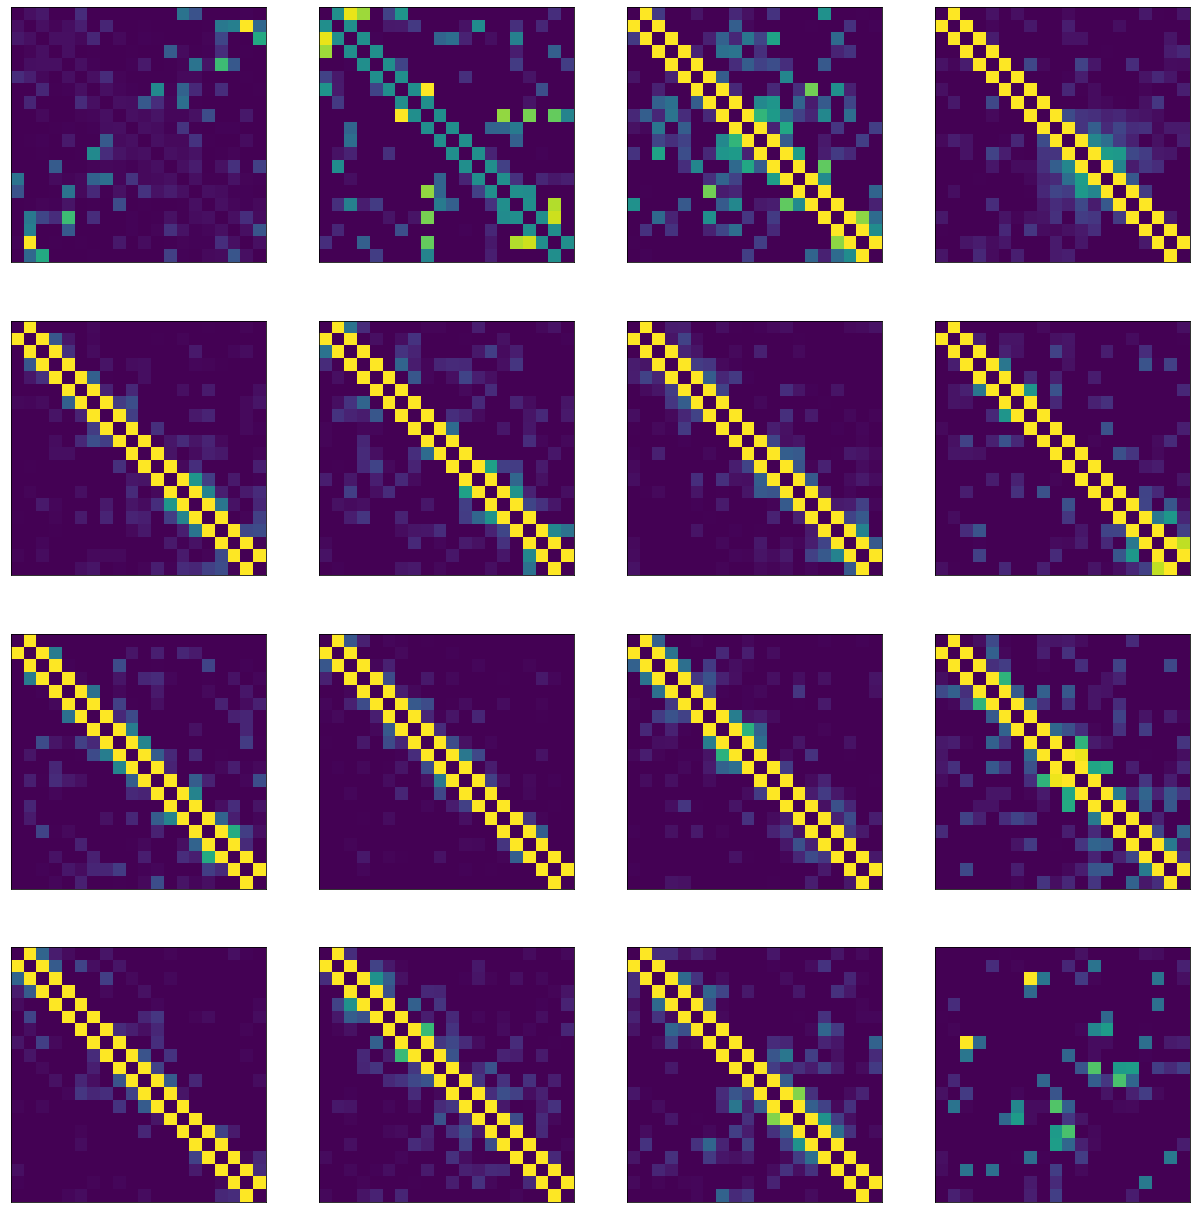

In [14]:
display_dictionary(W = W, figsize=[20,20])

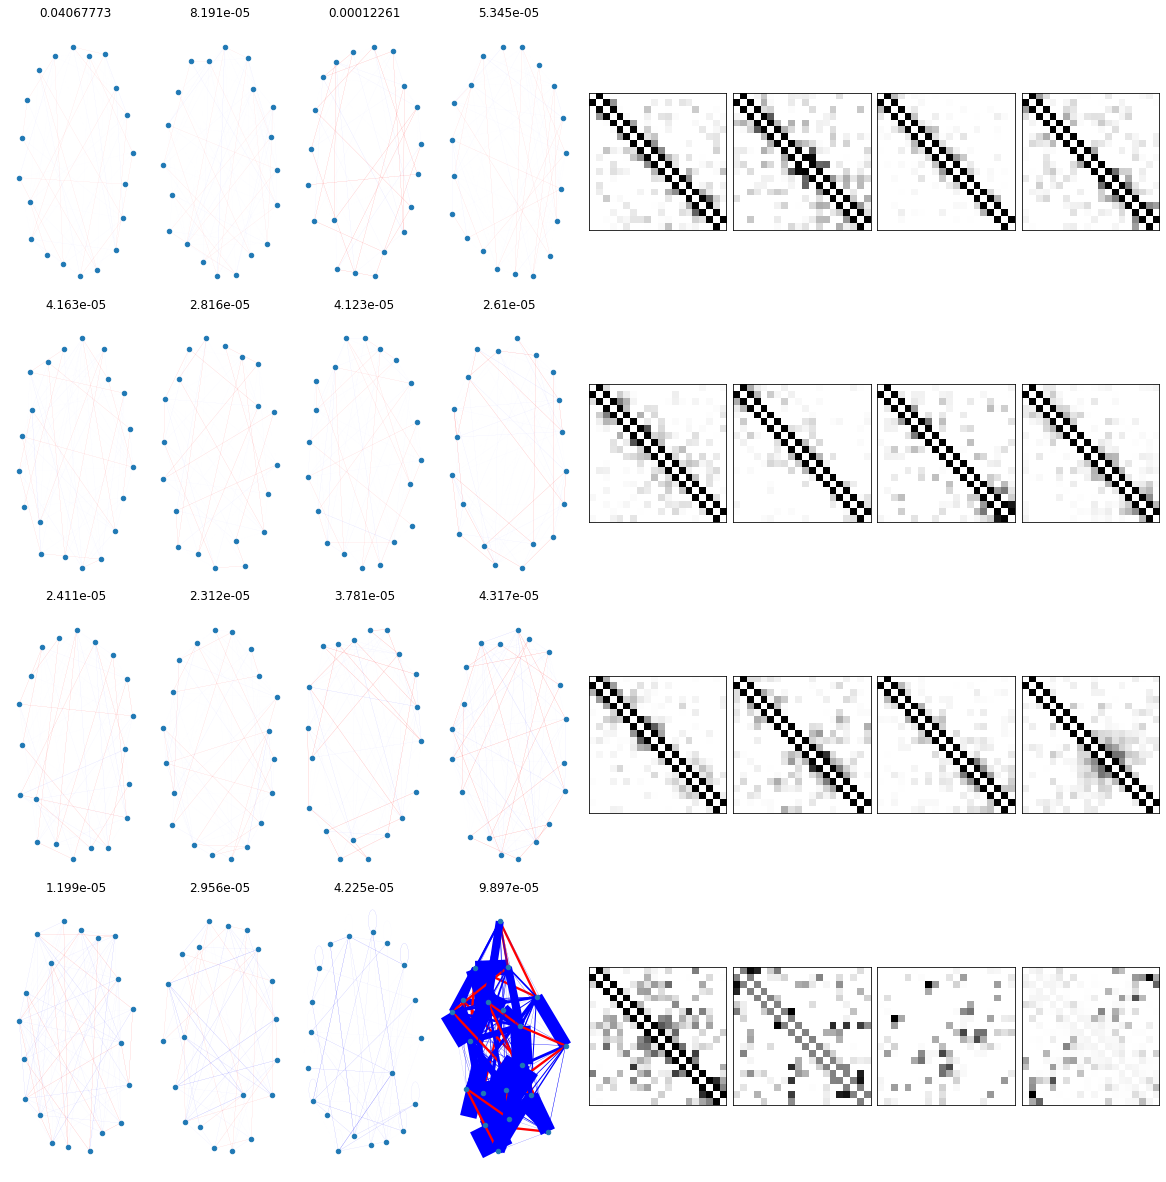

In [15]:
display_dict_and_graph(W = W, 
                       At = np.dot(H, H.T), 
                       regression_coeff = coeff, 
                       weight_graph = 150, 
                       fig_size = [20,20], 
                       show_importance = True)

In [16]:
# SDL_BCD_feature
data_scale=10
results_dict_list40 = []
iteration1 = 200
r = 16

# Cross-validation
xi_list = [0, 0.1, 1, 5, 10]
beta = 1
iter_avg = 2

for j in range(len(xi_list)):
    xi = xi_list[j]
    for i in range(iter_avg):
        data_scale=500
        SDL_BCD_class40 = SDL_BCD(X = [X40_train.T/data_scale, Y40_train.T],
                                X_test = [X40_test.T/data_scale, Y40_test.T],
                                n_components = r,
                                xi = xi,
                                L1_reg = [0,0,0],
                                L2_reg = [0,0,0],
                                nonnegativity = [True,True,False],
                                full_dim = False)

        results_dict_new40 = SDL_BCD_class40.fit(option = "feature",
                                             iter = iteration1, 
                                             subsample_size = None,
                                             beta = beta,
                                             update_nuance_param = False,
                                             if_compute_recons_error = True, 
                                             if_validate = False)

initial loading beta [[-0.530009    0.63703974 -0.00421298  0.49312544 -0.79173922 -0.23480481
  -0.29981156  0.17373463 -0.83712708  0.92028439  0.31484012 -0.62461628
  -0.52779151  0.47230991 -0.22066462  0.2574781   0.06810824]]


  2%|▊                                          | 4/200 [00:00<00:04, 39.36it/s]

--- Training --- [threshold, AUC] =  [0.287, 0.583]
--- Iteration 0: Training loss --- [Data, Label, Total] = [226.545001.3, 508.547933.3, 508.547933.3]


  5%|██                                        | 10/200 [00:00<00:05, 36.66it/s]


--- Training --- [threshold, AUC] =  [0.0, 0.665]
--- Iteration 10: Training loss --- [Data, Label, Total] = [278.301700.3, 2766.648324.3, 2766.648324.3]
Early stopping: training loss increased
!!! pred_type naive
initial loading beta [[-0.79756621  0.94391467  0.91335567 -0.42111689  0.88697908 -0.11785195
   0.06636292  0.58722601 -0.92695742  0.1291964  -0.82834579 -0.59653991
  -0.25307432 -0.43310551  0.2502737  -0.95999309 -0.8032872 ]]


  2%|█                                          | 5/200 [00:00<00:04, 48.75it/s]

--- Training --- [threshold, AUC] =  [0.298, 0.601]
--- Iteration 0: Training loss --- [Data, Label, Total] = [224.657145.3, 502.964795.3, 502.964795.3]


  5%|██                                        | 10/200 [00:00<00:04, 43.05it/s]

--- Training --- [threshold, AUC] =  [0.031, 0.654]
--- Iteration 10: Training loss --- [Data, Label, Total] = [293.167409.3, 1085.800561.3, 1085.800561.3]
Early stopping: training loss increased
!!! pred_type naive


initial loading beta [[-0.21475765  0.3693084   0.21526212 -0.54312146 -0.31856018  0.90640534
  -0.51595292 -0.66905275 -0.93410016 -0.63566103  0.23720409  0.19604863
  -0.85590201  0.08603382  0.59249371 -0.60766307  0.32538448]]


  2%|█                                          | 5/200 [00:00<00:04, 48.16it/s]

--- Training --- [threshold, AUC] =  [1.446, 0.398]
--- Iteration 0: Training loss --- [Data, Label, Total] = [213.090190.3, 465.436635.3, 486.745654.3]


  6%|██▎                                       | 11/200 [00:00<00:03, 48.25it/s]

--- Training --- [threshold, AUC] =  [0.357, 0.497]
--- Iteration 10: Training loss --- [Data, Label, Total] = [276.239568.3, 479.433818.3, 507.057775.3]


 14%|██████                                    | 29/200 [00:00<00:03, 49.95it/s]

--- Training --- [threshold, AUC] =  [0.261, 0.542]
--- Iteration 20: Training loss --- [Data, Label, Total] = [269.076546.3, 524.865231.3, 551.772886.3]


 20%|████████▌                                 | 41/200 [00:00<00:03, 49.72it/s]

--- Training --- [threshold, AUC] =  [0.242, 0.572]
--- Iteration 30: Training loss --- [Data, Label, Total] = [260.123286.3, 538.430224.3, 564.442553.3]
--- Training --- [threshold, AUC] =  [0.23, 0.602]
--- Iteration 40: Training loss --- [Data, Label, Total] = [251.150304.3, 548.930931.3, 574.045961.3]


 30%|████████████▌                             | 60/200 [00:01<00:02, 54.11it/s]

--- Training --- [threshold, AUC] =  [0.221, 0.624]
--- Iteration 50: Training loss --- [Data, Label, Total] = [241.119064.3, 556.329171.3, 580.441078.3]
--- Training --- [threshold, AUC] =  [0.214, 0.645]
--- Iteration 60: Training loss --- [Data, Label, Total] = [230.444423.3, 562.927492.3, 585.971934.3]


 36%|██████████████▉                           | 71/200 [00:01<00:02, 46.65it/s]

--- Training --- [threshold, AUC] =  [0.208, 0.664]
--- Iteration 70: Training loss --- [Data, Label, Total] = [220.189422.3, 568.735966.3, 590.754908.3]


 43%|██████████████████                        | 86/200 [00:01<00:03, 37.09it/s]

--- Training --- [threshold, AUC] =  [0.204, 0.683]
--- Iteration 80: Training loss --- [Data, Label, Total] = [209.073218.3, 573.239954.3, 594.147276.3]


 48%|████████████████████▏                     | 96/200 [00:02<00:02, 38.68it/s]

--- Training --- [threshold, AUC] =  [0.199, 0.698]
--- Iteration 90: Training loss --- [Data, Label, Total] = [198.444112.3, 578.526580.3, 598.370992.3]


 53%|█████████████████████▋                   | 106/200 [00:02<00:02, 41.85it/s]

--- Training --- [threshold, AUC] =  [0.195, 0.713]
--- Iteration 100: Training loss --- [Data, Label, Total] = [188.918859.3, 583.174994.3, 602.066880.3]


 58%|███████████████████████▉                 | 117/200 [00:02<00:01, 46.59it/s]

--- Training --- [threshold, AUC] =  [0.193, 0.727]
--- Iteration 110: Training loss --- [Data, Label, Total] = [nan.3, 585.815658.3, nan.3]
--- Training --- [threshold, AUC] =  [0.191, 0.739]
--- Iteration 120: Training loss --- [Data, Label, Total] = [170.190852.3, 587.561108.3, 604.580193.3]


 68%|███████████████████████████▋             | 135/200 [00:02<00:01, 47.60it/s]

--- Training --- [threshold, AUC] =  [0.188, 0.751]
--- Iteration 130: Training loss --- [Data, Label, Total] = [160.231220.3, 591.211579.3, 607.234701.3]


 73%|█████████████████████████████▉           | 146/200 [00:03<00:01, 44.67it/s]

--- Training --- [threshold, AUC] =  [0.187, 0.76]
--- Iteration 140: Training loss --- [Data, Label, Total] = [152.077327.3, 592.454209.3, 607.661942.3]


 78%|████████████████████████████████▏        | 157/200 [00:03<00:00, 45.60it/s]

--- Training --- [threshold, AUC] =  [0.185, 0.766]
--- Iteration 150: Training loss --- [Data, Label, Total] = [143.422308.3, 595.096866.3, 609.439097.3]


 81%|█████████████████████████████████▏       | 162/200 [00:03<00:00, 40.30it/s]

--- Training --- [threshold, AUC] =  [0.183, 0.777]
--- Iteration 160: Training loss --- [Data, Label, Total] = [135.877560.3, 597.495070.3, 611.082826.3]


 88%|████████████████████████████████████▎    | 177/200 [00:04<00:00, 39.62it/s]

--- Training --- [threshold, AUC] =  [0.18, 0.785]
--- Iteration 170: Training loss --- [Data, Label, Total] = [128.868685.3, 600.526680.3, 613.413548.3]


 94%|██████████████████████████████████████▎  | 187/200 [00:04<00:00, 43.81it/s]

--- Training --- [threshold, AUC] =  [0.179, 0.79]
--- Iteration 180: Training loss --- [Data, Label, Total] = [121.400675.3, 601.989850.3, 614.129917.3]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 44.14it/s]

--- Training --- [threshold, AUC] =  [0.178, 0.797]
--- Iteration 190: Training loss --- [Data, Label, Total] = [115.478400.3, 603.559114.3, 615.106954.3]
!!! pred_type naive


initial loading beta [[ 0.64059531  0.12454943 -0.02237238  0.45666134 -0.56231854 -0.49527092
  -0.29049374  0.85755055  0.4442413   0.4473842  -0.81188874  0.08936876
  -0.87999444 -0.70153292 -0.12294459  0.47261185 -0.26834039]]


  2%|▊                                          | 4/200 [00:00<00:05, 37.97it/s]

--- Training --- [threshold, AUC] =  [1.477, 0.403]
--- Iteration 0: Training loss --- [Data, Label, Total] = [220.907450.3, 465.879640.3, 487.970385.3]


 10%|████▍                                     | 21/200 [00:00<00:03, 50.01it/s]

--- Training --- [threshold, AUC] =  [0.319, 0.593]
--- Iteration 10: Training loss --- [Data, Label, Total] = [276.581318.3, 492.783941.3, 520.442073.3]
--- Training --- [threshold, AUC] =  [0.339, 0.653]
--- Iteration 20: Training loss --- [Data, Label, Total] = [257.123289.3, 485.140592.3, 510.852921.3]


 20%|████████▌                                 | 41/200 [00:00<00:03, 52.54it/s]

--- Training --- [threshold, AUC] =  [0.34, 0.685]
--- Iteration 30: Training loss --- [Data, Label, Total] = [239.677731.3, 484.688616.3, 508.656389.3]
--- Training --- [threshold, AUC] =  [0.34, 0.706]
--- Iteration 40: Training loss --- [Data, Label, Total] = [223.048166.3, 484.777188.3, 507.082005.3]


 30%|████████████▍                             | 59/200 [00:01<00:02, 52.07it/s]

--- Training --- [threshold, AUC] =  [0.342, 0.719]
--- Iteration 50: Training loss --- [Data, Label, Total] = [207.790295.3, 484.067059.3, 504.846089.3]
--- Training --- [threshold, AUC] =  [0.338, 0.737]
--- Iteration 60: Training loss --- [Data, Label, Total] = [194.554905.3, 485.442933.3, 504.898424.3]


 38%|████████████████▏                         | 77/200 [00:01<00:02, 49.39it/s]

--- Training --- [threshold, AUC] =  [0.335, 0.747]
--- Iteration 70: Training loss --- [Data, Label, Total] = [181.950986.3, 486.710226.3, 504.905325.3]


 45%|██████████████████▉                       | 90/200 [00:01<00:02, 53.49it/s]

--- Training --- [threshold, AUC] =  [0.332, 0.759]
--- Iteration 80: Training loss --- [Data, Label, Total] = [169.847651.3, 487.491437.3, 504.476202.3]
--- Training --- [threshold, AUC] =  [0.33, 0.769]
--- Iteration 90: Training loss --- [Data, Label, Total] = [158.872746.3, 488.301471.3, 504.188746.3]


 54%|██████████████████████▏                  | 108/200 [00:02<00:01, 50.14it/s]

--- Training --- [threshold, AUC] =  [0.329, 0.775]
--- Iteration 100: Training loss --- [Data, Label, Total] = [147.989832.3, 488.888991.3, 503.687974.3]


 60%|████████████████████████▊                | 121/200 [00:02<00:01, 52.26it/s]

--- Training --- [threshold, AUC] =  [0.328, 0.781]
--- Iteration 110: Training loss --- [Data, Label, Total] = [nan.3, 489.128073.3, nan.3]
--- Training --- [threshold, AUC] =  [0.325, 0.787]
--- Iteration 120: Training loss --- [Data, Label, Total] = [128.962446.3, 490.267351.3, 503.163595.3]


 70%|████████████████████████████▋            | 140/200 [00:02<00:01, 51.57it/s]

--- Training --- [threshold, AUC] =  [0.323, 0.791]
--- Iteration 130: Training loss --- [Data, Label, Total] = [120.626907.3, 491.083324.3, 503.146015.3]


 73%|█████████████████████████████▉           | 146/200 [00:02<00:01, 47.84it/s]

--- Training --- [threshold, AUC] =  [0.323, 0.796]
--- Iteration 140: Training loss --- [Data, Label, Total] = [112.296897.3, 491.328455.3, 502.558144.3]
--- Training --- [threshold, AUC] =  [0.322, 0.8]
--- Iteration 150: Training loss --- [Data, Label, Total] = [104.660824.3, 491.551904.3, 502.017986.3]


 86%|███████████████████████████████████      | 171/200 [00:03<00:00, 53.84it/s]

--- Training --- [threshold, AUC] =  [0.321, 0.802]
--- Iteration 160: Training loss --- [Data, Label, Total] = [98.151931.3, 492.160587.3, 501.975780.3]
--- Training --- [threshold, AUC] =  [0.32, 0.805]
--- Iteration 170: Training loss --- [Data, Label, Total] = [91.609030.3, 492.338110.3, 501.499014.3]


 95%|██████████████████████████████████████▉  | 190/200 [00:03<00:00, 55.77it/s]

--- Training --- [threshold, AUC] =  [0.319, 0.807]
--- Iteration 180: Training loss --- [Data, Label, Total] = [85.290984.3, 492.806212.3, 501.335311.3]
--- Training --- [threshold, AUC] =  [0.318, 0.808]
--- Iteration 190: Training loss --- [Data, Label, Total] = [79.426578.3, 493.321966.3, 501.264624.3]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 51.95it/s]


!!! pred_type naive
initial loading beta [[ 0.95007843  0.90050109  0.04954818 -0.59413436  0.88431495 -0.2097747
  -0.21510606  0.19145878 -0.71205906  0.72692671 -0.07248025  0.47666488
  -0.08759001 -0.33717254 -0.79012824  0.71638111 -0.36778163]]


  3%|█▎                                         | 6/200 [00:00<00:03, 54.47it/s]

--- Training --- [threshold, AUC] =  [0.413, 0.604]
--- Iteration 0: Training loss --- [Data, Label, Total] = [212.661226.3, 467.901662.3, 680.562888.3]


  5%|██                                        | 10/200 [00:00<00:03, 47.95it/s]

--- Training --- [threshold, AUC] =  [0.101, 0.66]
--- Iteration 10: Training loss --- [Data, Label, Total] = [160.921437.3, 745.965788.3, 906.887226.3]
Early stopping: training loss increased
!!! pred_type naive


initial loading beta [[ 0.6419843   0.48935616  0.81171008  0.37729595 -0.94336093 -0.39267395
   0.33237022  0.67883476 -0.8041403  -0.04021045 -0.15284474 -0.57813724
   0.16929748  0.46612002 -0.50835322  0.64602631 -0.08056535]]


  3%|█▎                                         | 6/200 [00:00<00:03, 54.57it/s]

--- Training --- [threshold, AUC] =  [1.695, 0.401]
--- Iteration 0: Training loss --- [Data, Label, Total] = [212.149109.3, 547.745156.3, 759.894265.3]


  5%|██                                        | 10/200 [00:00<00:03, 49.48it/s]

--- Training --- [threshold, AUC] =  [1.0, 0.449]
--- Iteration 10: Training loss --- [Data, Label, Total] = [158.097836.3, 3231.448183.3, 3389.546020.3]
Early stopping: training loss increased
!!! pred_type naive


initial loading beta [[-0.61377395 -0.39445328  0.83764492 -0.40165767  0.95866865  0.245072
   0.9041454  -0.58133541  0.82500298  0.83386308 -0.69676368 -0.69391923
   0.75988511  0.4600205  -0.96502117 -0.44761576  0.42425799]]


  2%|█                                          | 5/200 [00:00<00:04, 45.55it/s]

--- Training --- [threshold, AUC] =  [0.64, 0.404]
--- Iteration 0: Training loss --- [Data, Label, Total] = [185.886297.3, 512.165355.3, 1441.596838.3]


  5%|██                                        | 10/200 [00:00<00:04, 45.03it/s]

--- Training --- [threshold, AUC] =  [0.995, 0.492]
--- Iteration 10: Training loss --- [Data, Label, Total] = [109.746757.3, 1937.677101.3, 2486.410886.3]
Early stopping: training loss increased
!!! pred_type naive


initial loading beta [[ 0.95156055 -0.59521598  0.87129628 -0.41376764 -0.32855243 -0.47708489
   0.11339954 -0.59305366 -0.42621618 -0.6212186   0.08020043 -0.78785737
   0.58641659  0.12271915  0.48485667 -0.8203414   0.16323299]]


  0%|                                                   | 0/200 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [1.495, 0.4]
--- Iteration 0: Training loss --- [Data, Label, Total] = [199.040392.3, 467.298234.3, 1462.500192.3]


  3%|█▎                                         | 6/200 [00:00<00:03, 56.94it/s]

--- Training --- [threshold, AUC] =  [0.785, 0.761]
--- Iteration 10: Training loss --- [Data, Label, Total] = [103.174358.3, 638.075834.3, 1153.947622.3]


 10%|███▉                                      | 19/200 [00:00<00:03, 59.19it/s]

--- Training --- [threshold, AUC] =  [0.806, 0.682]
--- Iteration 20: Training loss --- [Data, Label, Total] = [36.056016.3, 667.813200.3, 848.093279.3]


 12%|█████▎                                    | 25/200 [00:00<00:03, 51.31it/s]

--- Training --- [threshold, AUC] =  [0.833, 0.679]


 19%|███████▉                                  | 38/200 [00:00<00:02, 55.62it/s]

--- Iteration 30: Training loss --- [Data, Label, Total] = [24.478070.3, 712.584281.3, 834.974633.3]
--- Training --- [threshold, AUC] =  [0.833, 0.701]
--- Iteration 40: Training loss --- [Data, Label, Total] = [1.206106.3, 712.711612.3, 718.742141.3]


 28%|███████████▊                              | 56/200 [00:01<00:02, 50.99it/s]

--- Training --- [threshold, AUC] =  [0.822, 0.759]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.312543.3, 693.653976.3, 695.216692.3]


 34%|██████████████▎                           | 68/200 [00:01<00:02, 51.21it/s]

--- Training --- [threshold, AUC] =  [0.811, 0.807]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.110745.3, 676.284378.3, 676.838103.3]
--- Training --- [threshold, AUC] =  [0.803, 0.823]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.105626.3, 663.779212.3, 664.307342.3]


 43%|██████████████████                        | 86/200 [00:01<00:02, 50.77it/s]

--- Training --- [threshold, AUC] =  [0.796, 0.825]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.104954.3, 653.807512.3, 654.332280.3]
--- Training --- [threshold, AUC] =  [0.789, 0.826]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.104808.3, 643.487865.3, 644.011905.3]


 53%|█████████████████████▋                   | 106/200 [00:02<00:01, 51.96it/s]

--- Training --- [threshold, AUC] =  [0.781, 0.827]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.104703.3, 633.181648.3, 633.705160.3]
--- Training --- [threshold, AUC] =  [0.774, 0.828]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.104602.3, 624.999619.3, 625.522628.3]


 66%|██████████████████████████▊              | 131/200 [00:02<00:01, 57.46it/s]

--- Training --- [threshold, AUC] =  [0.77, 0.828]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.104499.3, 619.527184.3, 620.049681.3]
--- Training --- [threshold, AUC] =  [0.764, 0.829]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.104407.3, 612.664687.3, 613.186724.3]


 75%|██████████████████████████████▊          | 150/200 [00:02<00:00, 55.12it/s]

--- Training --- [threshold, AUC] =  [0.759, 0.829]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.104300.3, 606.760337.3, 607.281837.3]


 78%|███████████████████████████████▉         | 156/200 [00:02<00:00, 53.79it/s]

--- Training --- [threshold, AUC] =  [0.755, 0.829]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.104208.3, 602.712502.3, 603.233542.3]
--- Training --- [threshold, AUC] =  [0.75, 0.829]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.104116.3, 597.644035.3, 598.164614.3]


 90%|█████████████████████████████████████    | 181/200 [00:03<00:00, 53.11it/s]

--- Training --- [threshold, AUC] =  [0.747, 0.829]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.104033.3, 593.818108.3, 594.338275.3]
--- Training --- [threshold, AUC] =  [0.743, 0.829]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.103952.3, 590.511419.3, 591.031180.3]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 53.30it/s]

--- Training --- [threshold, AUC] =  [0.74, 0.829]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.103862.3, 587.362625.3, 587.881935.3]
!!! pred_type naive


initial loading beta [[ 0.36522634  0.46263726 -0.32396947 -0.29530979  0.63574965  0.23575579
  -0.57949219  0.89753472  0.5479371  -0.27764021 -0.89236589 -0.90215152
   0.18810062  0.46576083  0.87190446  0.70035113 -0.64621974]]


  2%|█                                          | 5/200 [00:00<00:04, 42.83it/s]

--- Training --- [threshold, AUC] =  [1.428, 0.399]
--- Iteration 0: Training loss --- [Data, Label, Total] = [178.833638.3, 466.395873.3, 2254.732254.3]


  6%|██▎                                       | 11/200 [00:00<00:03, 48.76it/s]

--- Training --- [threshold, AUC] =  [0.012, 0.701]
--- Iteration 10: Training loss --- [Data, Label, Total] = [102.998642.3, 1373.852069.3, 2403.838488.3]


 10%|███▉                                      | 19/200 [00:00<00:03, 58.47it/s]

--- Training --- [threshold, AUC] =  [0.084, 0.651]
--- Iteration 20: Training loss --- [Data, Label, Total] = [60.107131.3, 793.685688.3, 1394.756999.3]


 18%|███████▊                                  | 37/200 [00:00<00:03, 51.79it/s]

--- Training --- [threshold, AUC] =  [0.106, 0.747]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.230314.3, 732.798378.3, 745.101516.3]
--- Training --- [threshold, AUC] =  [0.11, 0.791]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.106675.3, 723.076613.3, 724.143366.3]


 28%|███████████▌                              | 55/200 [00:01<00:02, 50.92it/s]

--- Training --- [threshold, AUC] =  [0.109, 0.796]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.102238.3, 724.048956.3, 725.071332.3]


 34%|██████████████                            | 67/200 [00:01<00:02, 48.83it/s]

--- Training --- [threshold, AUC] =  [0.109, 0.799]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.101191.3, 724.634272.3, 725.646180.3]
--- Training --- [threshold, AUC] =  [0.108, 0.802]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.100840.3, 726.647419.3, 727.655818.3]


 43%|██████████████████                        | 86/200 [00:01<00:02, 51.02it/s]

--- Training --- [threshold, AUC] =  [0.108, 0.805]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.100621.3, 726.351207.3, 727.357419.3]
--- Training --- [threshold, AUC] =  [0.108, 0.807]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.100523.3, 726.288935.3, 727.294167.3]


 54%|██████████████████████▏                  | 108/200 [00:02<00:01, 49.22it/s]

--- Training --- [threshold, AUC] =  [0.109, 0.809]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.100454.3, 725.672226.3, 726.676763.3]
--- Training --- [threshold, AUC] =  [0.108, 0.81]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.100404.3, 726.569640.3, 727.573677.3]


 66%|███████████████████████████              | 132/200 [00:02<00:01, 53.35it/s]

--- Training --- [threshold, AUC] =  [0.108, 0.811]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.100368.3, 727.660880.3, 728.664560.3]
--- Training --- [threshold, AUC] =  [0.107, 0.812]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.100340.3, 729.839761.3, 730.843162.3]


 76%|██████████████████████████████▉          | 151/200 [00:02<00:00, 53.59it/s]

--- Training --- [threshold, AUC] =  [0.107, 0.813]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.100319.3, 729.736840.3, 730.740032.3]
--- Training --- [threshold, AUC] =  [0.107, 0.814]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.100302.3, 730.940268.3, 731.943291.3]


 86%|███████████████████████████████████      | 171/200 [00:03<00:00, 55.34it/s]

--- Training --- [threshold, AUC] =  [0.106, 0.815]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.100289.3, 731.697081.3, 732.699975.3]
--- Training --- [threshold, AUC] =  [0.106, 0.815]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.100279.3, 732.337476.3, 733.340271.3]


 95%|██████████████████████████████████████▉  | 190/200 [00:03<00:00, 57.47it/s]

--- Training --- [threshold, AUC] =  [0.106, 0.815]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.100272.3, 733.279226.3, 734.281946.3]
--- Training --- [threshold, AUC] =  [0.105, 0.816]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.100266.3, 734.138772.3, 735.141427.3]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 52.55it/s]


!!! pred_type naive
initial loading beta [[-0.52048471  0.35047539  0.44137369  0.10156442 -0.8527412   0.0850061
  -0.33042087 -0.6870392  -0.49989759 -0.93605709 -0.03370207  0.32385771
  -0.14046941 -0.41456252  0.3826667  -0.92005317 -0.68205193]]


  2%|█                                          | 5/200 [00:00<00:04, 48.17it/s]

--- Training --- [threshold, AUC] =  [1.508, 0.399]
--- Iteration 0: Training loss --- [Data, Label, Total] = [176.618186.3, 468.942466.3, 2235.124330.3]


  6%|██▎                                       | 11/200 [00:00<00:03, 53.84it/s]

--- Training --- [threshold, AUC] =  [0.754, 0.583]
--- Iteration 10: Training loss --- [Data, Label, Total] = [94.946407.3, 602.162915.3, 1551.626984.3]


  9%|███▊                                      | 18/200 [00:00<00:03, 57.90it/s]

--- Training --- [threshold, AUC] =  [0.652, 0.726]
--- Iteration 20: Training loss --- [Data, Label, Total] = [61.072785.3, 518.940059.3, 1129.667914.3]


 15%|██████▎                                   | 30/200 [00:00<00:02, 57.82it/s]

--- Training --- [threshold, AUC] =  [0.62, 0.767]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.982506.3, 502.545398.3, 522.370455.3]


 21%|████████▊                                 | 42/200 [00:00<00:02, 55.37it/s]

--- Training --- [threshold, AUC] =  [0.605, 0.797]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.464123.3, 495.810961.3, 500.452194.3]


 30%|████████████▊                             | 61/200 [00:01<00:02, 53.89it/s]

--- Training --- [threshold, AUC] =  [0.593, 0.815]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.104456.3, 490.954501.3, 491.999061.3]
--- Training --- [threshold, AUC] =  [0.583, 0.816]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.101416.3, 487.067049.3, 488.081210.3]


 40%|█████████████████                         | 81/200 [00:01<00:02, 56.97it/s]

--- Training --- [threshold, AUC] =  [0.576, 0.819]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.100759.3, 484.897634.3, 485.905228.3]
--- Training --- [threshold, AUC] =  [0.57, 0.82]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.100505.3, 483.004893.3, 484.009942.3]


 50%|████████████████████▌                    | 100/200 [00:01<00:01, 56.91it/s]

--- Training --- [threshold, AUC] =  [0.562, 0.821]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.100388.3, 480.498348.3, 481.502232.3]
--- Training --- [threshold, AUC] =  [0.556, 0.822]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.100327.3, 478.758534.3, 479.761808.3]


 58%|███████████████████████▉                 | 117/200 [00:02<00:01, 42.90it/s]

--- Training --- [threshold, AUC] =  [0.55, 0.823]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.100287.3, 477.096678.3, 478.099544.3]


 64%|██████████████████████████               | 127/200 [00:02<00:01, 42.84it/s]

--- Training --- [threshold, AUC] =  [0.545, 0.824]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.100260.3, 475.864260.3, 476.866858.3]


 70%|████████████████████████████▍            | 139/200 [00:02<00:01, 45.46it/s]

--- Training --- [threshold, AUC] =  [0.54, 0.825]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.100245.3, 474.872668.3, 475.875115.3]
--- Training --- [threshold, AUC] =  [0.536, 0.826]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.100230.3, 473.863062.3, 474.865366.3]


 78%|████████████████████████████████▏        | 157/200 [00:03<00:00, 51.52it/s]

--- Training --- [threshold, AUC] =  [0.532, 0.826]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.100219.3, 473.083989.3, 474.086179.3]
--- Training --- [threshold, AUC] =  [0.529, 0.827]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.100211.3, 472.448273.3, 473.450385.3]


 88%|████████████████████████████████████     | 176/200 [00:03<00:00, 54.76it/s]

--- Training --- [threshold, AUC] =  [0.526, 0.827]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.100204.3, 471.808466.3, 472.810507.3]
--- Training --- [threshold, AUC] =  [0.522, 0.827]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.100199.3, 471.176893.3, 472.178886.3]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 51.32it/s]

--- Training --- [threshold, AUC] =  [0.521, 0.828]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.100195.3, 470.887408.3, 471.889359.3]
!!! pred_type naive


In [17]:
W = results_dict_new40['loading'][0]
coeff = results_dict_new40['loading'][1][0]
H = results_dict_new40['code']

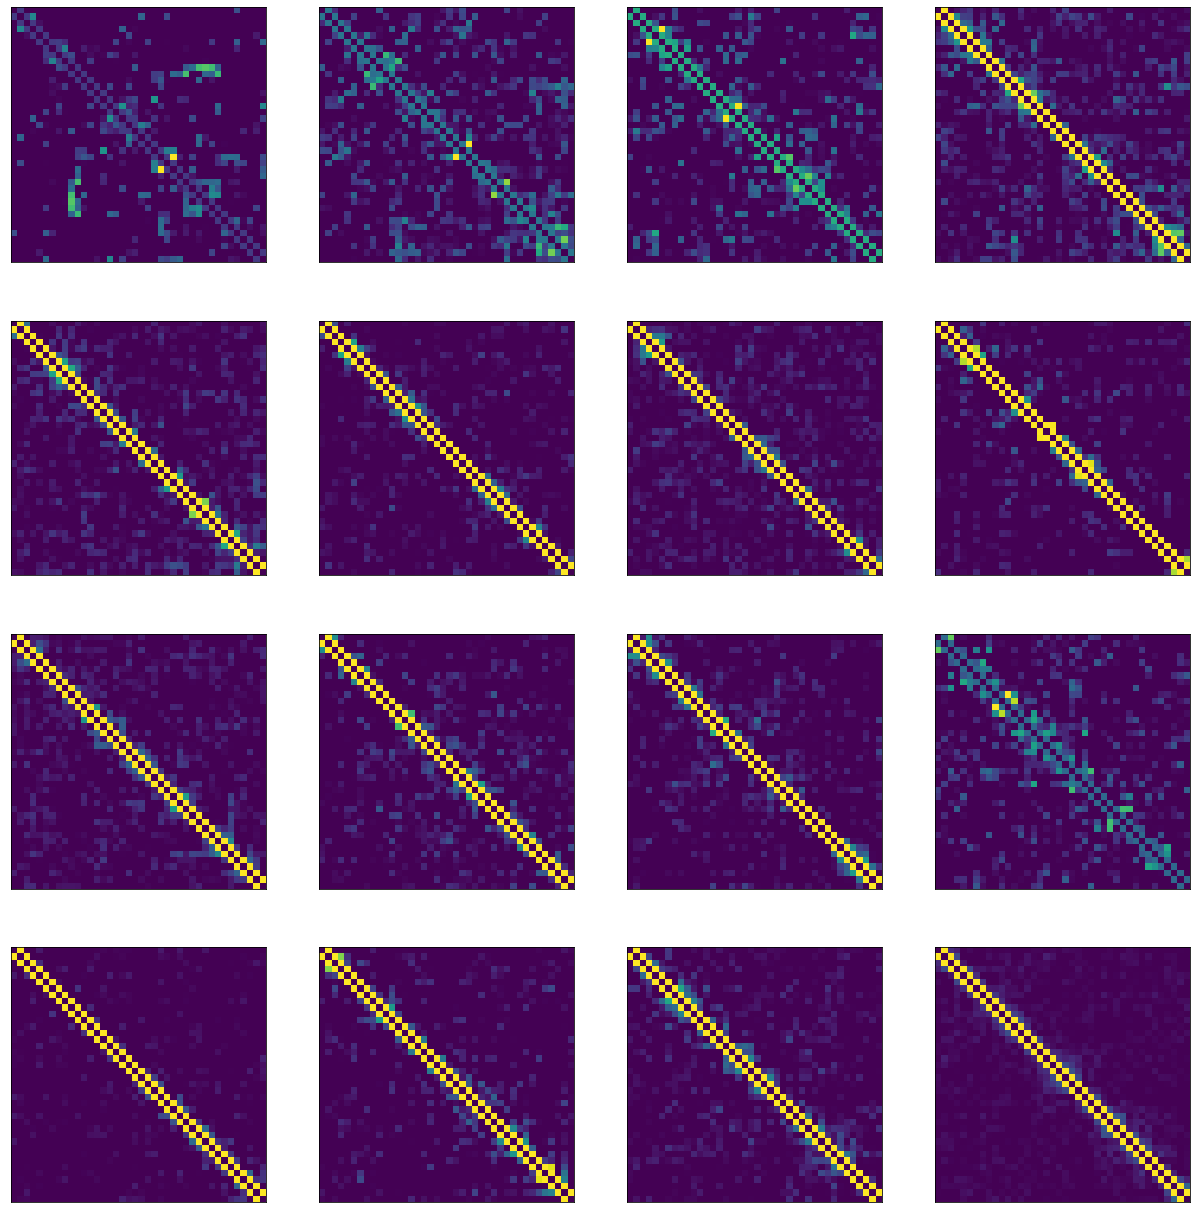

In [18]:
display_dictionary(W = W, figsize = [20,20])

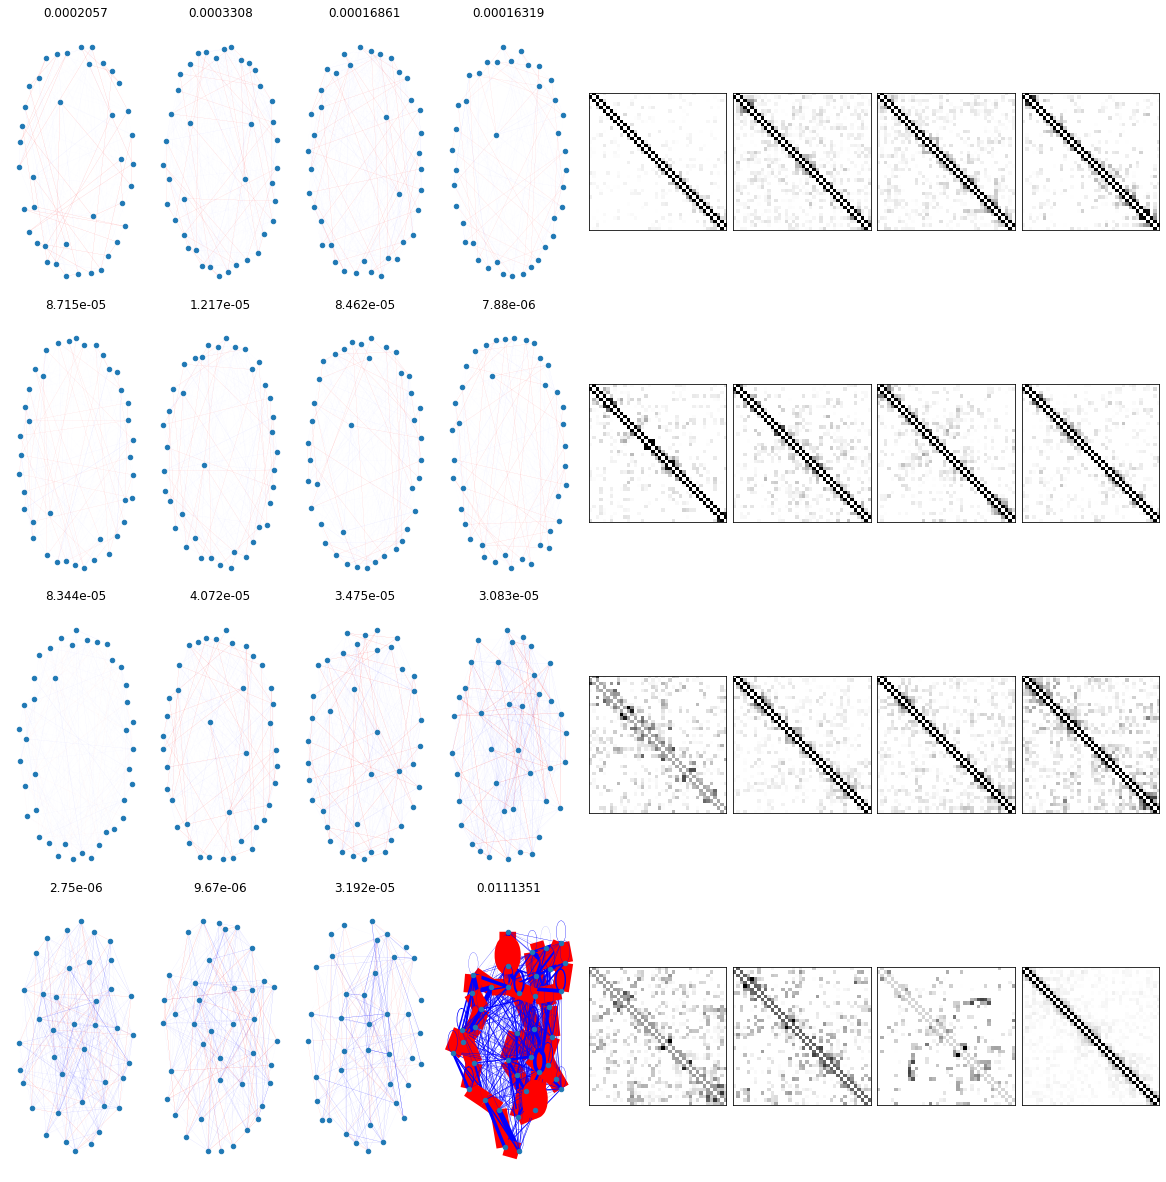

In [19]:
display_dict_and_graph(W = W, 
                       At = np.dot(H, H.T), 
                       regression_coeff = coeff, 
                       weight_graph = 150, 
                       fig_size = [20,20], 
                       show_importance = True)

## SNMF

In [167]:
iteration1 = 200 # Iteration for logistic training
xi_list = [0, 0.1, 1, 5, 10] # Trade-off parameters
beta = 1
iter_avg = 4
r = 16

SNMF_AUC_array = np.zeros(shape=[iter_avg, len(xi_list)]) 

for j in range(len(xi_list)):
    xi = xi_list[j]
    for i in range(iter_avg):
        SNMF_class_new = SNMF(X=[X_train.T, Y_train.T],
                              X_test=[X_test.T, Y_test.T],
                              n_components=r,
                              xi=xi,
                              L1_reg = [0,0,0],
                              L2_reg = [0,0,0],
                              nonnegativity=[True,True,False],
                              full_dim=False)

        results_dict_new_snmf_cv = SNMF_class_new.train_logistic(iter=iteration1, 
                                                                 subsample_size=None, 
                                                                 beta = beta,
                                                                 search_radius_const=1,
                                                                 update_nuance_param=False,
                                                                 if_compute_recons_error=False, 
                                                                 if_validate=False)

        SNMF_AUC_array[i, j] = results_dict_new_snmf_cv.get('Accuracy')

xi_SNMF = xi_list[np.argmax(np.sum(SNMF_AUC_array, 0))]

initial loading beta [[ 0.46175174 -0.47769919  0.29434192  0.28049791 -0.53283941  0.94235998
  -0.21606913 -0.04645451 -0.34901516 -0.06536046 -0.26578318  0.70510664
   0.23793737 -0.19789413  0.42821307 -0.2940103  -0.66964576]]


100%|█████████████████████████████████████████| 200/200 [00:13<00:00, 14.43it/s]


initial loading beta [[-0.77330114  0.15329717  0.8097044  -0.65067844  0.27281208  0.14768093
  -0.28066597 -0.35663661 -0.95822871 -0.91914748  0.55140599  0.76254974
  -0.3005423  -0.00733832 -0.13125489  0.6640209  -0.14404735]]


100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 16.08it/s]


initial loading beta [[ 0.8106358   0.29474639 -0.24667784  0.91898649 -0.92922046  0.61088727
   0.78521633 -0.92371155  0.74131719 -0.25939692 -0.30824389  0.37564987
   0.55276319 -0.93814803  0.21774822  0.58646143 -0.57742773]]


100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 16.17it/s]


initial loading beta [[ 0.1836608   0.4199212  -0.30819717  0.10139279 -0.86918961  0.26006308
   0.40172112  0.37666271 -0.31834959  0.77754419  0.89415083  0.5034359
  -0.89057641  0.08713962 -0.46578548 -0.09683612 -0.73483639]]


100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 15.84it/s]


initial loading beta [[ 0.9041549   0.73137222 -0.04771919  0.17421128 -0.96100353  0.08259159
   0.18400774  0.13352754  0.15641176 -0.92173318  0.94343056 -0.60426758
  -0.83701969 -0.18764387 -0.45795765  0.14819152 -0.70103648]]


100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 15.61it/s]


initial loading beta [[-0.28912803 -0.59708924 -0.007368    0.99760524  0.60706977 -0.81800061
  -0.45971601  0.03112216  0.32078223  0.36418782  0.4642253  -0.6486932
   0.56388296  0.62491763  0.17742218 -0.88583997 -0.42828362]]


100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 16.13it/s]


initial loading beta [[ 0.11270169 -0.39137954 -0.3564212  -0.01285474 -0.82625532  0.88807011
  -0.53346055  0.74901082  0.18611661  0.63692765  0.07910704  0.03115003
  -0.38187329  0.27767272 -0.4885421  -0.40905461 -0.11560613]]


100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 16.12it/s]


initial loading beta [[ 0.53358563  0.95278668  0.24554117  0.93496508 -0.13046984  0.92236747
   0.62036229 -0.21490635  0.04793952 -0.95661299  0.26624145  0.62320071
  -0.15724026 -0.78455278  0.39850756  0.28387862 -0.49580687]]


100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 16.15it/s]


initial loading beta [[-0.38203811 -0.68156175  0.03819396  0.61521411 -0.48699777 -0.48639014
   0.82166747 -0.3059004   0.18442709 -0.21910277  0.15472766  0.84176152
   0.09071699 -0.36911585 -0.67967636 -0.38322576 -0.40518726]]


100%|█████████████████████████████████████████| 200/200 [00:14<00:00, 14.27it/s]


initial loading beta [[ 0.24985435  0.50388467  0.08569471 -0.69616573 -0.4668377  -0.9947582
   0.72725695 -0.965969    0.07235537 -0.93609308 -0.45130872 -0.0331383
  -0.72565298  0.18323705 -0.93158192 -0.44766464 -0.80569949]]


100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 17.49it/s]


initial loading beta [[ 0.18995567  0.10900307 -0.52311004  0.82440131 -0.68789958  0.2413252
  -0.1548553   0.96659259 -0.80288389 -0.36113701 -0.62926889 -0.93135736
  -0.53298851 -0.01521173  0.1053431   0.66154198  0.69322116]]


100%|█████████████████████████████████████████| 200/200 [00:13<00:00, 14.99it/s]


initial loading beta [[ 0.71120866  0.39527545  0.08891127 -0.86596378 -0.67220342 -0.90071282
   0.57843819  0.79383691  0.46175161 -0.05877363  0.55970073 -0.72628427
   0.20557539 -0.35404089 -0.91322697 -0.99307653 -0.53418365]]


100%|█████████████████████████████████████████| 200/200 [00:14<00:00, 13.89it/s]


initial loading beta [[ 0.02960656 -0.70905732  0.15856663 -0.41687033 -0.18741199  0.80501668
   0.11605631 -0.90335818  0.94657731 -0.06883887 -0.3857491   0.76076594
  -0.60658663  0.6673788   0.85317171 -0.99587711 -0.89643043]]


100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 15.75it/s]


initial loading beta [[ 0.5169363  -0.01799956  0.53241738  0.60195286 -0.86002894 -0.13262566
  -0.71868132  0.73865472  0.64891446  0.98292833 -0.4418792  -0.10996612
   0.45840761 -0.22895391 -0.09830099  0.95364801 -0.40077416]]


100%|█████████████████████████████████████████| 200/200 [00:13<00:00, 14.92it/s]


initial loading beta [[ 0.00138891 -0.34872961 -0.70337575 -0.82605332 -0.16087305 -0.77318283
  -0.86928232  0.49449866 -0.80369975  0.7704672  -0.81235247 -0.19093408
  -0.59642739  0.45222021 -0.15444856 -0.47510693  0.19598935]]


100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 16.72it/s]


initial loading beta [[ 0.22985522  0.42830863 -0.36631613 -0.0086284   0.27993645  0.58670222
  -0.98206248 -0.0688574  -0.26500666 -0.8248646   0.67764132 -0.3055015
  -0.16907079  0.06973735 -0.66786998  0.36413945  0.98227325]]


100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 16.90it/s]


initial loading beta [[-0.78772193 -0.51727041 -0.99286127  0.09846157 -0.72121257  0.40747223
   0.39998945  0.45992691 -0.26194832 -0.91646571 -0.52490684  0.62931714
   0.97029979 -0.33211839 -0.34116891  0.71749534 -0.2244848 ]]


100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 16.74it/s]


initial loading beta [[ 0.32291095  0.81196008 -0.03571514 -0.07174402  0.65372753  0.90395993
   0.03727051 -0.70575256 -0.72455777  0.56723133 -0.81570786 -0.34288362
  -0.57563903  0.20118978  0.99477463 -0.93368024  0.30278131]]


100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 16.87it/s]


initial loading beta [[-0.40448403 -0.5932074  -0.13082019 -0.15701569 -0.33609744  0.80060288
   0.89368663 -0.51180292 -0.51079734  0.16656154  0.33551361 -0.58065255
   0.97486534 -0.81404031  0.43625893 -0.7190106  -0.73405744]]


100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 16.56it/s]


initial loading beta [[-0.78911007  0.06710221 -0.76482099  0.15287762 -0.69079369  0.96120858
  -0.11007473 -0.46325618 -0.14491135 -0.86545788  0.50928151  0.63306921
   0.2456542   0.96192649 -0.84156948  0.17232023  0.05418295]]


100%|█████████████████████████████████████████| 200/200 [00:13<00:00, 14.58it/s]


In [168]:
results_dict_new_snmf_cv

{'xi': 10,
 'L1_reg': [0, 0, 0],
 'L2_reg': [0, 0, 0],
 'nonnegativity': [True, True, False],
 'n_components': 16,
 'loading': [array([[0.00000000e+00, 5.42069495e-07, 3.12970218e-07, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [2.44784123e-02, 2.47004924e-02, 2.50028396e-02, ...,
          2.45370776e-02, 2.51002987e-02, 2.46836454e-02],
         [2.51856097e-03, 2.83658004e-03, 2.72664099e-03, ...,
          2.52093397e-03, 2.84061316e-03, 3.02794406e-03],
         ...,
         [4.09149452e-03, 4.11930893e-03, 3.99485509e-03, ...,
          4.05041264e-03, 4.62179119e-03, 4.12080529e-03],
         [2.44779030e-02, 2.47010358e-02, 2.50033237e-02, ...,
          2.45373614e-02, 2.51008235e-02, 2.46819635e-02],
         [0.00000000e+00, 6.43872614e-08, 0.00000000e+00, ...,
          0.00000000e+00, 1.90011837e-07, 0.00000000e+00]]),
  array([[-6.41578233,  0.14561337,  0.13965784,  0.10348265,  0.11993575,
           0.13189213,  0.10587008,  0.11831115,  0

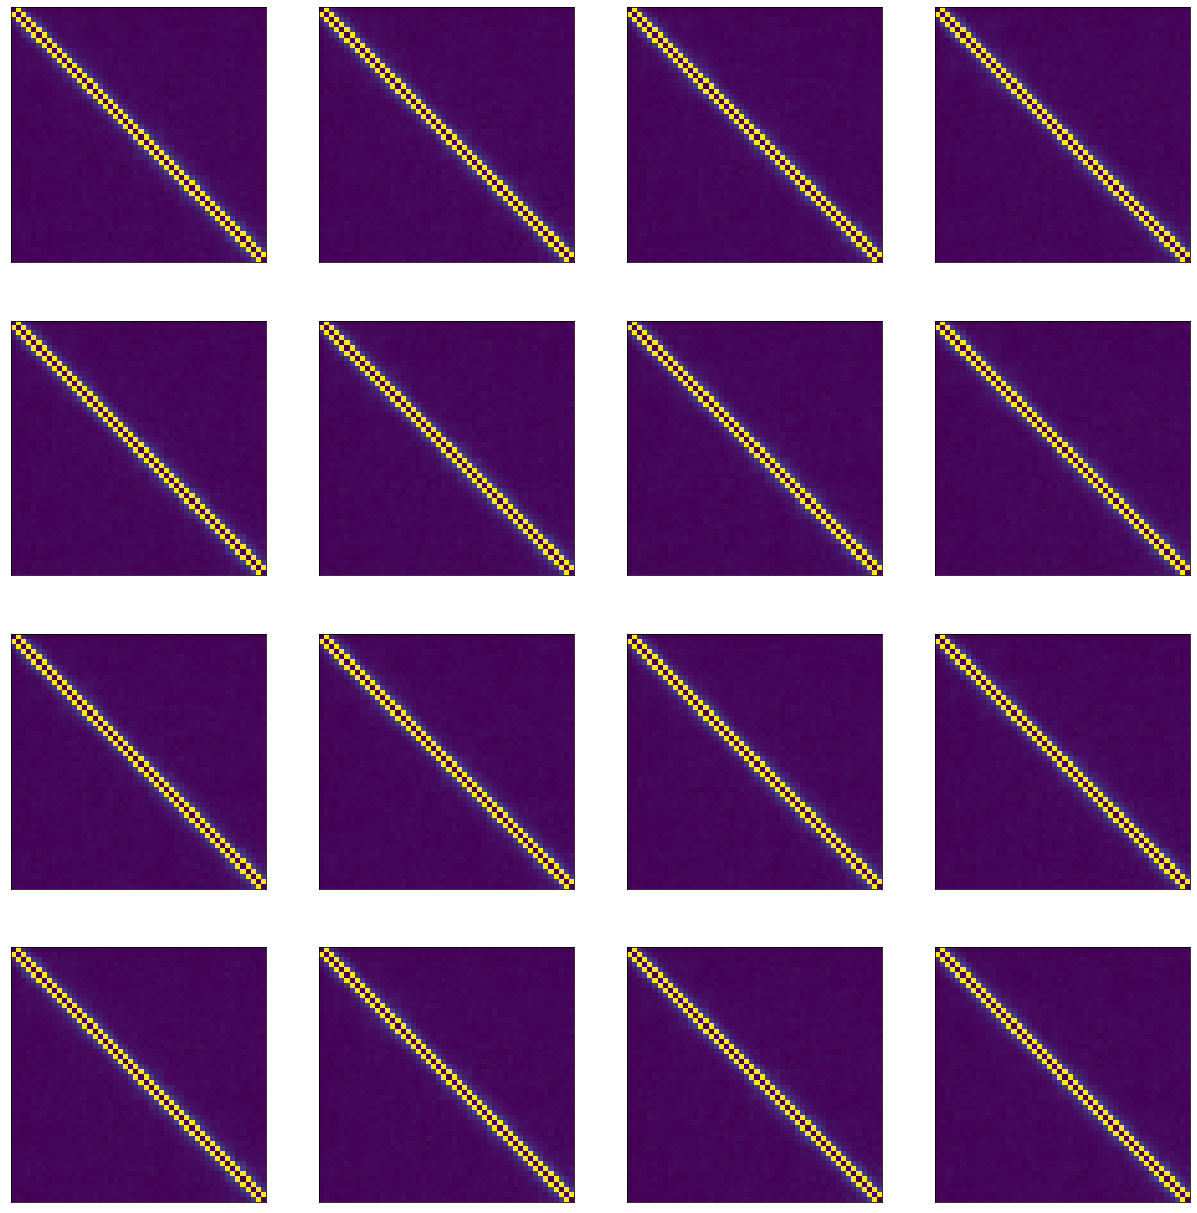

In [169]:
W = results_dict_new_snmf_cv.get('loading')[0]
display_dictionary(save_name=save_folder+'UCLA_SNMF_Dictionaries', W=W, figsize=[20,20])

## LMF

In [170]:
iteration = 200
results_dict_list = []
xi_list = [0, 0.1, 1, 10]
beta_list = [1, None]
iter_avg = 4
r = 16

LMF_AUC_array_naive = np.zeros(shape=[iter_avg, len(xi_list)])
LMF_AUC_array_exhaustive = np.zeros(shape=[iter_avg, len(xi_list)])

for beta in beta_list:
    for j in range(len(xi_list)):
        xi = xi_list[j]
        for i in range(iter_avg):
            LMF_class_new = LMF(X = [X_train.T, Y_train.T],
                            X_test = [X_test.T, Y_test.T],
                            n_components = r,
                            xi = xi,
                            L1_reg = [0,0,0],
                            L2_reg = [0,0,1],
                            nonnegativity=[True,True,False],
                            full_dim=False)

            results_dict_new = LMF_class_new.train_logistic(iter=iteration, subsample_size=None, 
                                                    beta = beta, 
                                                    search_radius_const=1000,
                                                    fine_tune_beta=True,
                                                    update_nuance_param=False,
                                                    if_compute_recons_error=False, if_validate=False)

            results_dict_new.update({'method': 'SDL-feat (naive)'})
            results_dict_new.update({'beta': beta})
            results_dict_new.update({'Accuracy': results_dict_new.get('Accuracy (naive)')})
            results_dict_new.update({'F_score': results_dict_new.get('F_score (naive)')})
            results_dict_list.append(results_dict_new.copy())

            results_dict_new1 = results_dict_new.copy()
            results_dict_new1.update({'method': 'SDL-feat (exhaustive)'})
            results_dict_new1.update({'beta': beta})
            results_dict_new1.update({'Accuracy': results_dict_new1.get('Accuracy (exhaustive)')})
            results_dict_new1.update({'F_score': results_dict_new.get('F_score (exhaustive)')})
            results_dict_list.append(results_dict_new1.copy())

            LMF_AUC_array_naive[i,j] = results_dict_new.get('Accuracy (naive)') 
            LMF_AUC_array_exhaustive[i,j] = results_dict_new.get('Accuracy (exhaustive)')

initial loading beta [[0.2576834  0.32184566 0.30043204 0.432423   0.95928888 0.85453688
  0.73882566 0.95968054 0.60896239 0.20516072 0.742448   0.78086325
  0.94496006 0.22166751 0.78972277 0.33315127 0.43429712]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 48.21it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [1.0, 0.581, 0.64, 0.402]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.55it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.501, 0.697, 0.118]
initial loading beta [[0.5547324  0.82517358 0.53368733 0.28784015 0.18503466 0.86368732
  0.69836283 0.04075751 0.32347122 0.86211851 0.6410295  0.52631059
  0.32665553 0.76283926 0.03349952 0.86874021 0.52318367]]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 57.55it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [1.0, 0.511, 0.65, 0.316]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.64it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.947, 0.489, 0.747, 0.096]
initial loading beta [[0.14149953 0.68038255 0.78325971 0.03732474 0.5337273  0.16000882
  0.91635059 0.44790756 0.33932253 0.27339079 0.07212542 0.30498866
  0.2570688  0.55997852 0.06322374 0.71906876 0.43051628]]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 53.06it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.912, 0.533, 0.66, 0.303]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:09<00:00, 30.18it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.001, 0.51, 0.707, 0.103]
initial loading beta [[0.46761639 0.7132777  0.07536918 0.81787756 0.27710548 0.70597076
  0.41957627 0.63921041 0.63160812 0.52678238 0.46981796 0.75360844
  0.94686889 0.88113354 0.80006834 0.4786376  0.68621905]]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 57.94it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.484, 0.623, 0.263]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.68it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.117, 0.487, 0.751, nan]
initial loading beta [[0.00188253 0.00333998 0.24876449 0.48964637 0.95561302 0.12039279
  0.08116944 0.43593376 0.40612104 0.18149597 0.88205723 0.4838235
  0.90825936 0.207799   0.41877315 0.68736977 0.89584707]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 49.96it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.539, 0.596, 0.333]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.40it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.998, 0.463, 0.313, 0.354]
initial loading beta [[0.97128428 0.43192359 0.58340535 0.87980825 0.87215874 0.23385788
  0.08474983 0.09635679 0.07604558 0.49410629 0.52337548 0.82390092
  0.75813848 0.72110473 0.15956588 0.80781149 0.93714821]]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 52.80it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [1.0, 0.476, 0.67, 0.21]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.12it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.268, 0.526, 0.549, 0.35]
initial loading beta [[0.59402016 0.12435477 0.85449725 0.08150065 0.63909541 0.27404484
  0.37693434 0.30052939 0.73053737 0.45228064 0.04282049 0.84558364
  0.81176678 0.53353914 0.02742183 0.08035495 0.54949787]]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 50.02it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [2.0, 0.437, 0.603, 0.234]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.33it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.001, 0.486, 0.535, 0.289]
initial loading beta [[0.79930475 0.47118209 0.1468386  0.46579523 0.73318841 0.58395682
  0.80637104 0.51354308 0.76391877 0.10373408 0.74544953 0.59499669
  0.89933181 0.78369449 0.37516971 0.13192895 0.89105085]]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 50.30it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.365, 0.502, 0.633, 0.306]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.36it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.489, 0.488, 0.262]
initial loading beta [[9.36604584e-01 8.13093037e-01 2.76616271e-01 3.70688693e-02
  1.52965091e-01 1.13864703e-01 3.86146101e-01 3.80554123e-01
  4.78987536e-01 3.70579433e-01 7.93424747e-01 8.37519791e-02
  3.16300606e-01 2.68534225e-01 2.11597432e-01 4.25749817e-02
  9.11099006e-04]]


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 34.92it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.426, 0.525, 0.269]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.27it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.417, 0.515, 0.258]
initial loading beta [[0.42065368 0.23129634 0.97145796 0.0523866  0.9808136  0.96368881
  0.21814688 0.57217696 0.68537172 0.55921657 0.75928137 0.84271504
  0.81757141 0.18191523 0.2924813  0.65027089 0.55407825]]


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 34.94it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.469, 0.556, 0.275]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.33it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.001, 0.476, 0.572, 0.191]
initial loading beta [[0.63333948 0.82682704 0.50983644 0.01681623 0.0339233  0.65318884
  0.7215579  0.82736294 0.7360572  0.30761502 0.04509116 0.28122881
  0.71253233 0.9556669  0.05291516 0.874933   0.76156564]]


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 37.78it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [1.0, 0.481, 0.606, 0.255]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.33it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.506, 0.519, 0.341]
initial loading beta [[0.4036586  0.03730589 0.47427307 0.26898309 0.5749766  0.21462943
  0.48559032 0.09347247 0.14684275 0.1409113  0.08650957 0.82149464
  0.10054388 0.64421383 0.95132589 0.40668836 0.08184742]]


100%|█████████████████████████████████████████| 200/200 [00:06<00:00, 31.66it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.9, 0.469, 0.646, 0.276]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 28.95it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.999, 0.488, 0.458, 0.332]
initial loading beta [[0.43929608 0.92145803 0.74361646 0.9763782  0.46068703 0.63936979
  0.13244941 0.16649367 0.09636266 0.20679479 0.15377119 0.73823373
  0.01164452 0.3864362  0.96695845 0.35724308 0.26174372]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 42.62it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.102, 0.568, 0.572, 0.386]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 28.96it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.576, 0.717, 0.125]
initial loading beta [[0.67101765 0.22499768 0.57737907 0.9807269  0.17799232 0.1355546
  0.04607383 0.62547555 0.30960333 0.36818821 0.73827582 0.37481344
  0.06622822 0.0576745  0.36870319 0.44061543 0.08025316]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 45.55it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.054, 0.511, 0.589, 0.256]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.19it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.527, 0.684, 0.13]
initial loading beta [[0.98339888 0.46047087 0.68900908 0.23609512 0.77813955 0.0180251
  0.52907635 0.4143598  0.94282832 0.82263749 0.40059137 0.37899451
  0.11681733 0.65068883 0.24595348 0.73524638 0.76407391]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 47.69it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.039, 0.493, 0.646, 0.255]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.08it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.501, 0.687, 0.131]
initial loading beta [[0.28777821 0.5701387  0.89761782 0.79237283 0.14805583 0.85359843
  0.45535925 0.64055013 0.80401359 0.79227524 0.12180886 0.39576792
  0.66687962 0.86050707 0.09681625 0.40749066 0.01728888]]


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 36.95it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.077, 0.53, 0.609, 0.247]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 28.82it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.584, 0.737, 0.114]
initial loading beta [[0.00775657 0.05827597 0.72684723 0.95016084 0.02420614 0.45421362
  0.82012513 0.00939284 0.17491741 0.03081664 0.42774652 0.44990624
  0.55800182 0.60101135 0.93670694 0.72277042 0.97283109]]


100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 67.11it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.452, 0.542, 0.277]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 28.09it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.009, 0.541, 0.741, 0.025]
initial loading beta [[0.94549573 0.34960222 0.8623646  0.92423016 0.22358843 0.84096598
  0.23401149 0.9975437  0.92062455 0.68797624 0.23568161 0.0076252
  0.9265439  0.13218156 0.59354165 0.6290098  0.28832051]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 44.12it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [1.0, 0.516, 0.552, 0.37]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.52it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.002, 0.47, 0.714, 0.066]
initial loading beta [[0.54789318 0.19547558 0.16325529 0.85725449 0.55771805 0.45959679
  0.32544849 0.86871126 0.69682048 0.19450538 0.42499184 0.00945138
  0.21361104 0.28844575 0.4384535  0.89631636 0.63009955]]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 63.52it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.766, 0.489, 0.596, 0.294]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:09<00:00, 29.74it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.004, 0.516, 0.747, 0.051]
initial loading beta [[0.09158125 0.68180347 0.60556437 0.95280297 0.24880674 0.15581567
  0.51214248 0.23892566 0.43084573 0.35417398 0.27935091 0.97326138
  0.12575533 0.43059547 0.54600934 0.36446303 0.84923804]]


100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 67.30it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.986, 0.541, 0.62, 0.315]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:09<00:00, 29.99it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.001, 0.524, 0.707, 0.139]
initial loading beta [[0.58876319 0.18736146 0.27864517 0.23063742 0.78287312 0.22130928
  0.93348149 0.55994294 0.98104113 0.20374361 0.20471749 0.75203789
  0.00366083 0.84205224 0.32166915 0.44493486 0.46855381]]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 60.27it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.573, 0.507, 0.609, 0.301]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.16it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.001, 0.522, 0.498, 0.349]
initial loading beta [[0.62442443 0.40882082 0.78742721 0.29681919 0.33892447 0.24911906
  0.25551882 0.58727427 0.27753137 0.84015179 0.82560942 0.78672963
  0.9322637  0.99067721 0.73678523 0.34939671 0.08341927]]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 55.35it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.663, 0.512, 0.572, 0.342]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 28.88it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.694, 0.526, 0.391, 0.351]
initial loading beta [[0.3688628  0.0777995  0.51046132 0.06517377 0.91807993 0.79694512
  0.32837786 0.19493215 0.23856576 0.72043247 0.82861408 0.99794924
  0.39960502 0.48480528 0.93035487 0.40210762 0.05397102]]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 62.32it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.732, 0.491, 0.653, 0.259]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.05it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.988, 0.54, 0.465, 0.351]
initial loading beta [[0.05919135 0.41786901 0.16899173 0.30048968 0.47073256 0.53093581
  0.81964138 0.58372963 0.23075699 0.32201232 0.38637112 0.45771209
  0.36410624 0.1616678  0.26958963 0.52814217 0.90160714]]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 61.57it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.013, 0.43, 0.606, 0.204]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.32it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.996, 0.516, 0.525, 0.344]
initial loading beta [[0.18532491 0.78581303 0.15041164 0.17466705 0.033154   0.26868627
  0.27278112 0.67604795 0.86574859 0.32696231 0.40860442 0.25297266
  0.64798077 0.4999729  0.79109    0.50410035 0.9411001 ]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 41.73it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.004, 0.519, 0.532, 0.347]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.04it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.988, 0.531, 0.589, 0.344]
initial loading beta [[0.22981343 0.72722199 0.38173212 0.79215193 0.83941605 0.69533603
  0.82149405 0.89949045 0.96495921 0.81334876 0.13947275 0.41122282
  0.55284224 0.52960468 0.05838862 0.24896522 0.06250063]]


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 35.79it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.518, 0.657, 0.301]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.19it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.381, 0.572, 0.64, 0.382]
initial loading beta [[0.54065937 0.89572709 0.54498009 0.2731583  0.95187382 0.17521735
  0.01416684 0.34927937 0.41446196 0.95931763 0.02591585 0.41414683
  0.239147   0.46196899 0.65807581 0.84247989 0.11153304]]


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 35.24it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.169, 0.47, 0.593, 0.309]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 28.94it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [1.0, 0.488, 0.63, 0.286]
initial loading beta [[0.55405041 0.31941328 0.8634258  0.32946823 0.13098942 0.88054809
  0.17708145 0.19314691 0.78382989 0.83763783 0.33126825 0.0527094
  0.18638369 0.64301457 0.45425587 0.91240213 0.8868122 ]]


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 35.58it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.447, 0.596, 0.231]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 28.79it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.827, 0.479, 0.606, 0.273]
initial loading beta [[0.74701932 0.15301038 0.66905165 0.02776599 0.8292649  0.52250233
  0.92076969 0.04740005 0.42372319 0.31775354 0.45934314 0.83194693
  0.09402679 0.18779481 0.13662745 0.3308265  0.45383564]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 49.75it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.103, 0.539, 0.576, 0.337]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 28.69it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.584, 0.724, 0.128]
initial loading beta [[0.70846059 0.60006501 0.88410873 0.55040064 0.10892117 0.37611568
  0.03848085 0.5339066  0.86665228 0.09464293 0.01157989 0.38711103
  0.69852913 0.09772845 0.79350799 0.833907   0.18049596]]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 50.86it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.035, 0.488, 0.566, 0.263]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 28.94it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [2.0, 0.5, 0.673, 0.185]
initial loading beta [[2.84548129e-01 4.74241272e-01 2.25512748e-04 6.97336149e-01
  8.91768958e-01 1.31834773e-02 8.69140290e-01 7.39886361e-01
  6.46312150e-01 1.58866772e-01 5.82531576e-01 1.17046152e-01
  7.36514547e-01 3.00816568e-01 7.27027948e-01 6.32367509e-01
  3.92331605e-01]]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 50.72it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.142, 0.51, 0.566, 0.303]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 29.06it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.507, 0.721, 0.144]
initial loading beta [[0.91959924 0.40270373 0.6913632  0.89542351 0.43648935 0.2119323
  0.69123454 0.8786623  0.88239287 0.31124911 0.15285787 0.74131858
  0.61889244 0.04210491 0.99408548 0.88254517 0.2628059 ]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 47.90it/s]


!!! pred_type naive
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.074, 0.517, 0.495, 0.353]
!!! pred_type exhaustive
exhaustive prection..


100%|█████████████████████████████████████████| 297/297 [00:10<00:00, 28.92it/s]


--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.0, 0.542, 0.731, 0.216]


In [171]:
print(np.sum(LMF_AUC_array_naive, 0))        
xi_NMF_n = xi_list[np.argmax(np.sum(LMF_AUC_array_naive, 0))]
print(xi_NMF_n)

print(np.sum(LMF_AUC_array_exhaustive, 0))        
xi_NMF_e = xi_list[np.argmax(np.sum(LMF_AUC_array_exhaustive, 0))]
print(xi_NMF_e)

[2.30976431 2.44107744 2.37710438 2.2020202 ]
0.1
[2.90909091 1.87878788 2.46464646 2.84848485]
0


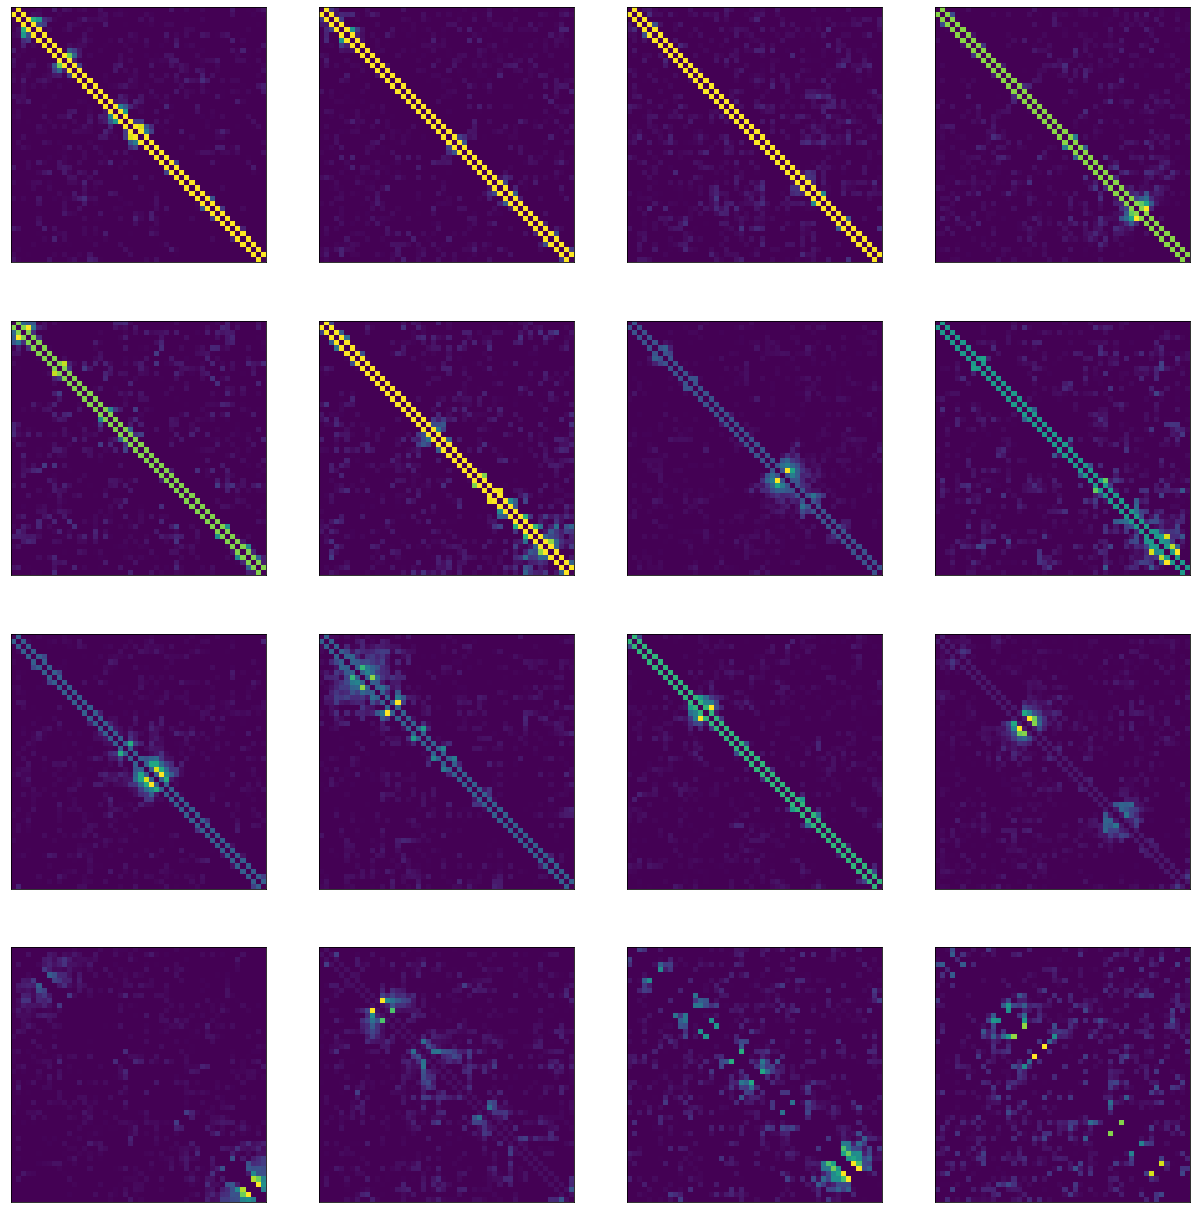

In [172]:
W = results_dict_new.get('loading')[0]
display_dictionary(save_name=save_folder+'UCLA_LMF_Dictionaries', W=W, figsize=[20,20])

In [174]:
results_dict_new['Accuracy (exhaustive)']

0.7306397306397306

In [176]:
results_dict_new['Accuracy (naive)']

0.494949494949495

In [192]:
# SDL_SVP_filter
iteration1 = 200
results_dict_list = []
r = 16

# Cross-validation
xi_list = [0, 0.1, 1, 5, 10]
beta = 1
iter_avg = 2
data_scale=10

for j in range(len(xi_list)):
    xi = xi_list[j]
    for i in range(iter_avg):
        SDL_SVP_class = SDL_SVP(X=[X_train.T/data_scale, Y_train.T],
                                X_test=[X_test.T/data_scale, Y_test.T],
                                n_components=r,
                                xi=xi,
                                L1_reg = [0,0,0],
                                L2_reg = [0,0,0],
                                # nonnegativity=[True,True,False],
                                full_dim=False)

        results_dict_new = SDL_SVP_class.fit(iter=iteration1, subsample_size=None,
                                                beta = 0,
                                                nu = 2,
                                                search_radius_const=0.05,
                                                update_nuance_param=False,
                                                SDL_option = 'filter',
                                                prediction_method_list = ['filter'],
                                                fine_tune_beta = False,
                                                if_compute_recons_error=True, if_validate=False)
        results_dict_new.update({'method': 'SDL-conv-filt'})
        results_dict_new.update({'beta': None})
        results_dict_new.update({'Accuracy': results_dict_new.get('Accuracy (filter)')})
        results_dict_new.update({'F_score': results_dict_new.get('F_score (filter)')})
        results_dict_list.append(results_dict_new.copy())

initial loading beta [[-0.68171791  0.06200862  0.68416264 -0.70242129  0.94060673 -0.8344159
   0.31839089 -0.78535117 -0.55277942  0.99303655  0.38528222  0.46729379
   0.38187922 -0.56742342  0.10816879 -0.63047805 -0.47949606]]


  0%|                                                   | 0/200 [00:00<?, ?it/s]

*** rel_error_data train

  2%|▋                                          | 3/200 [00:00<00:21,  8.97it/s]

 26407.075168992713
--- Training --- [threshold, AUC] =  [0.914, 0.436]
--- Iteration 0: Training loss --- [Data, Label, Total] = [25489693.377622.3, 805.286112.3, 805.286112.3]
error_time (1, 3)


  6%|██▋                                       | 13/200 [00:01<00:16, 11.54it/s]

*** rel_error_data train 26406.926792094633
--- Training --- [threshold, AUC] =  [0.0, 0.439]
--- Iteration 10: Training loss --- [Data, Label, Total] = [25489550.155337.3, 2092.552757.3, 2092.552757.3]
error_time (2, 3)


 12%|████▊                                     | 23/200 [00:02<00:15, 11.62it/s]

*** rel_error_data train 26406.809970586153
--- Training --- [threshold, AUC] =  [0.951, 0.488]
--- Iteration 20: Training loss --- [Data, Label, Total] = [25489437.392208.3, 883.443132.3, 883.443132.3]
error_time (3, 3)


 16%|██████▉                                   | 33/200 [00:02<00:13, 12.55it/s]

*** rel_error_data train 26406.64320943314
--- Training --- [threshold, AUC] =  [0.0, 0.499]
--- Iteration 30: Training loss --- [Data, Label, Total] = [25489276.424337.3, 1379.329849.3, 1379.329849.3]
error_time (4, 3)


 22%|█████████                                 | 43/200 [00:03<00:12, 12.56it/s]

*** rel_error_data train 26406.578335589
--- Training --- [threshold, AUC] =  [0.565, 0.54]
--- Iteration 40: Training loss --- [Data, Label, Total] = [25489213.804211.3, 412.925227.3, 412.925227.3]
error_time (5, 3)


 26%|███████████▏                              | 53/200 [00:04<00:11, 12.34it/s]

*** rel_error_data train 26406.424313055843
--- Training --- [threshold, AUC] =  [0.0, 0.548]
--- Iteration 50: Training loss --- [Data, Label, Total] = [25489065.132420.3, 1860.218544.3, 1860.218544.3]
error_time (6, 3)


 32%|█████████████▏                            | 63/200 [00:05<00:11, 12.19it/s]

*** rel_error_data train 26406.276061922203
--- Training --- [threshold, AUC] =  [0.912, 0.6]
--- Iteration 60: Training loss --- [Data, Label, Total] = [25488922.031531.3, 1057.413078.3, 1057.413078.3]
error_time (7, 3)


 36%|███████████████▎                          | 73/200 [00:05<00:10, 11.93it/s]

*** rel_error_data train 26406.052012681463
--- Training --- [threshold, AUC] =  [0.0, 0.611]
--- Iteration 70: Training loss --- [Data, Label, Total] = [25488705.765761.3, 1592.074125.3, 1592.074125.3]
error_time (8, 3)


 42%|█████████████████▍                        | 83/200 [00:06<00:09, 12.16it/s]

*** rel_error_data train 26405.88699870624
--- Training --- [threshold, AUC] =  [0.185, 0.65]
--- Iteration 80: Training loss --- [Data, Label, Total] = [25488546.484371.3, 315.898842.3, 315.898842.3]
error_time (9, 3)


 46%|███████████████████▌                      | 93/200 [00:07<00:08, 12.16it/s]

*** rel_error_data train 26405.7254382157
--- Training --- [threshold, AUC] =  [0.0, 0.667]
--- Iteration 90: Training loss --- [Data, Label, Total] = [25488390.536492.3, 1501.893068.3, 1501.893068.3]
error_time (10, 3)


 52%|█████████████████████                    | 103/200 [00:08<00:07, 12.71it/s]

*** rel_error_data train 26405.517531389505
--- Training --- [threshold, AUC] =  [0.885, 0.699]
--- Iteration 100: Training loss --- [Data, Label, Total] = [25488189.852349.3, 867.185014.3, 867.185014.3]
error_time (11, 3)


 56%|███████████████████████▏                 | 113/200 [00:09<00:07, 11.89it/s]

*** rel_error_data train 26405.260173899544
--- Training --- [threshold, AUC] =  [0.0, 0.716]
--- Iteration 110: Training loss --- [Data, Label, Total] = [25487941.435458.3, 1244.665942.3, 1244.665942.3]
error_time (12, 3)


 62%|█████████████████████████▏               | 123/200 [00:09<00:06, 12.34it/s]

*** rel_error_data train 26405.091322435248
--- Training --- [threshold, AUC] =  [0.062, 0.739]
--- Iteration 120: Training loss --- [Data, Label, Total] = [25487778.449894.3, 368.691872.3, 368.691872.3]
error_time (13, 3)


 66%|███████████████████████████▎             | 133/200 [00:10<00:05, 12.90it/s]

*** rel_error_data train 26404.89138394706
--- Training --- [threshold, AUC] =  [0.126, 0.758]
--- Iteration 130: Training loss --- [Data, Label, Total] = [25487585.457269.3, 297.964289.3, 297.964289.3]
error_time (14, 3)


 72%|█████████████████████████████▎           | 143/200 [00:11<00:05, 11.30it/s]

*** rel_error_data train 26404.61108392335
--- Training --- [threshold, AUC] =  [0.0, 0.775]
--- Iteration 140: Training loss --- [Data, Label, Total] = [25487314.894868.3, 2529.888001.3, 2529.888001.3]
error_time (15, 3)


 76%|██████████████████████████████▉          | 151/200 [00:12<00:04, 11.47it/s]

*** rel_error_data train 26404.42610837663
--- Training --- [threshold, AUC] =  [0.0, 0.793]
--- Iteration 150: Training loss --- [Data, Label, Total] = [25487136.345372.3, 1916.064919.3, 1916.064919.3]
error_time (16, 3)


 82%|█████████████████████████████████▍       | 163/200 [00:13<00:03, 11.18it/s]

*** rel_error_data train 26404.185661835814
--- Training --- [threshold, AUC] =  [0.0, 0.808]
--- Iteration 160: Training loss --- [Data, Label, Total] = [25486904.251944.3, 1393.469121.3, 1393.469121.3]
error_time (17, 3)


 86%|███████████████████████████████████▍     | 173/200 [00:14<00:02, 11.15it/s]

*** rel_error_data train 26403.9342347145
--- Training --- [threshold, AUC] =  [0.0, 0.822]
--- Iteration 170: Training loss --- [Data, Label, Total] = [25486661.559401.3, 1037.782824.3, 1037.782824.3]
error_time (18, 3)


 92%|█████████████████████████████████████▌   | 183/200 [00:14<00:01, 11.72it/s]

*** rel_error_data train 26403.69158901373
--- Training --- [threshold, AUC] =  [0.0, 0.835]
--- Iteration 180: Training loss --- [Data, Label, Total] = [25486427.343211.3, 965.609389.3, 965.609389.3]
error_time (19, 3)


 96%|███████████████████████████████████████▌ | 193/200 [00:15<00:00, 11.62it/s]

*** rel_error_data train 26403.49890641155
--- Training --- [threshold, AUC] =  [0.039, 0.846]
--- Iteration 190: Training loss --- [Data, Label, Total] = [25486241.354403.3, 336.089595.3, 336.089595.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:16<00:00, 12.27it/s]


!!! pred_type filter
--- Training --- [threshold, AUC] =  [0.978, 0.854]
!!! ACC_list [0.6430976430976431]
--- Validation (filter) --- [threshold, AUC, accuracy, rel_error_data] = [0.978, 0.542, 0.643, 0.955]
initial loading beta [[ 0.73902032 -0.86917625  0.14920974  0.45697078 -0.70581867 -0.66357274
  -0.19827879  0.10747441  0.69033501  0.58940114 -0.59750686  0.1067243
   0.22198563 -0.02867017  0.94062819 -0.7664221   0.93015174]]


  2%|▋                                          | 3/200 [00:00<00:19,  9.93it/s]

*** rel_error_data train 26274.622239409757
--- Training --- [threshold, AUC] =  [0.0, 0.522]
--- Iteration 0: Training loss --- [Data, Label, Total] = [25361841.862813.3, 3161.595603.3, 3161.595603.3]
error_time (1, 3)


  6%|██▋                                       | 13/200 [00:01<00:15, 11.88it/s]

*** rel_error_data train 26274.55734354235
--- Training --- [threshold, AUC] =  [0.964, 0.591]
--- Iteration 10: Training loss --- [Data, Label, Total] = [25361779.221428.3, 1521.757434.3, 1521.757434.3]
error_time (2, 3)


 12%|████▊                                     | 23/200 [00:01<00:14, 12.18it/s]

*** rel_error_data train 26274.420442209474
--- Training --- [threshold, AUC] =  [0.0, 0.59]
--- Iteration 20: Training loss --- [Data, Label, Total] = [25361647.076047.3, 1643.970938.3, 1643.970938.3]
error_time (3, 3)


 16%|██████▉                                   | 33/200 [00:02<00:13, 12.44it/s]

*** rel_error_data train 26274.30471704786
--- Training --- [threshold, AUC] =  [0.629, 0.623]
--- Iteration 30: Training loss --- [Data, Label, Total] = [25361535.371178.3, 501.250261.3, 501.250261.3]
error_time (4, 3)


 22%|█████████                                 | 43/200 [00:03<00:12, 12.29it/s]

*** rel_error_data train 26274.1673082709
--- Training --- [threshold, AUC] =  [0.106, 0.64]
--- Iteration 40: Training loss --- [Data, Label, Total] = [25361402.735982.3, 344.573360.3, 344.573360.3]
error_time (5, 3)


 26%|███████████▏                              | 53/200 [00:04<00:11, 12.34it/s]

*** rel_error_data train 26273.995919307643
--- Training --- [threshold, AUC] =  [0.0, 0.647]
--- Iteration 50: Training loss --- [Data, Label, Total] = [25361237.301071.3, 2508.506221.3, 2508.506221.3]
error_time (6, 3)


 32%|█████████████▏                            | 63/200 [00:05<00:11, 11.75it/s]

*** rel_error_data train 26273.954449417495
--- Training --- [threshold, AUC] =  [0.929, 0.676]
--- Iteration 60: Training loss --- [Data, Label, Total] = [25361197.271845.3, 1251.697750.3, 1251.697750.3]
error_time (7, 3)


 36%|███████████████▎                          | 73/200 [00:05<00:10, 12.32it/s]

*** rel_error_data train 26273.73048791053
--- Training --- [threshold, AUC] =  [0.0, 0.69]
--- Iteration 70: Training loss --- [Data, Label, Total] = [25360981.090761.3, 2113.795045.3, 2113.795045.3]
error_time (8, 3)


 42%|█████████████████▍                        | 83/200 [00:06<00:09, 11.93it/s]

*** rel_error_data train 26273.56829327987
--- Training --- [threshold, AUC] =  [0.0, 0.708]
--- Iteration 80: Training loss --- [Data, Label, Total] = [25360824.530771.3, 3078.177236.3, 3078.177236.3]
error_time (9, 3)


 46%|███████████████████▌                      | 93/200 [00:07<00:09, 11.56it/s]

*** rel_error_data train 26273.384892678503
--- Training --- [threshold, AUC] =  [0.028, 0.728]
--- Iteration 90: Training loss --- [Data, Label, Total] = [25360647.501507.3, 402.598189.3, 402.598189.3]
error_time (10, 3)


 52%|█████████████████████                    | 103/200 [00:08<00:08, 11.28it/s]

*** rel_error_data train 26273.19549790802
--- Training --- [threshold, AUC] =  [0.0, 0.747]
--- Iteration 100: Training loss --- [Data, Label, Total] = [25360464.686311.3, 1729.734815.3, 1729.734815.3]
error_time (11, 3)


 56%|███████████████████████▏                 | 113/200 [00:09<00:07, 11.42it/s]

*** rel_error_data train 26273.005210732535
--- Training --- [threshold, AUC] =  [0.009, 0.763]
--- Iteration 110: Training loss --- [Data, Label, Total] = [25360281.009712.3, 532.551926.3, 532.551926.3]
error_time (12, 3)


 62%|█████████████████████████▏               | 123/200 [00:10<00:06, 12.15it/s]

*** rel_error_data train 26272.806891908996
--- Training --- [threshold, AUC] =  [0.977, 0.775]
--- Iteration 120: Training loss --- [Data, Label, Total] = [25360089.580484.3, 1613.804034.3, 1613.804034.3]
error_time (13, 3)


 66%|███████████████████████████▎             | 133/200 [00:10<00:05, 11.68it/s]

*** rel_error_data train 26272.508354319052
--- Training --- [threshold, AUC] =  [0.0, 0.798]
--- Iteration 130: Training loss --- [Data, Label, Total] = [25359801.414090.3, 3569.598892.3, 3569.598892.3]
error_time (14, 3)


 72%|█████████████████████████████▎           | 143/200 [00:11<00:04, 11.48it/s]

*** rel_error_data train 26272.29238535066
--- Training --- [threshold, AUC] =  [0.0, 0.811]
--- Iteration 140: Training loss --- [Data, Label, Total] = [25359592.947884.3, 2273.247148.3, 2273.247148.3]
error_time (15, 3)


 76%|███████████████████████████████▎         | 153/200 [00:12<00:03, 11.92it/s]

*** rel_error_data train 26272.11410846722
--- Training --- [threshold, AUC] =  [0.052, 0.82]
--- Iteration 150: Training loss --- [Data, Label, Total] = [25359420.864339.3, 333.977063.3, 333.977063.3]
error_time (16, 3)


 82%|█████████████████████████████████▍       | 163/200 [00:13<00:03, 11.39it/s]

*** rel_error_data train 26271.766138194336
--- Training --- [threshold, AUC] =  [0.0, 0.839]
--- Iteration 160: Training loss --- [Data, Label, Total] = [25359084.982553.3, 3723.441092.3, 3723.441092.3]
error_time (17, 3)


 86%|███████████████████████████████████▍     | 173/200 [00:14<00:02, 12.12it/s]

*** rel_error_data train 26271.559924685323
--- Training --- [threshold, AUC] =  [0.0, 0.848]
--- Iteration 170: Training loss --- [Data, Label, Total] = [25358885.932902.3, 1822.239090.3, 1822.239090.3]
error_time (18, 3)


 92%|█████████████████████████████████████▌   | 183/200 [00:15<00:01, 11.87it/s]

*** rel_error_data train 26271.318663721184
--- Training --- [threshold, AUC] =  [0.002, 0.856]
--- Iteration 180: Training loss --- [Data, Label, Total] = [25358653.053344.3, 683.148700.3, 683.148700.3]
error_time (19, 3)


 96%|███████████████████████████████████████▌ | 193/200 [00:15<00:00, 11.79it/s]

*** rel_error_data train 26270.951205082256
--- Training --- [threshold, AUC] =  [0.0, 0.871]
--- Iteration 190: Training loss --- [Data, Label, Total] = [25358298.360218.3, 3824.058848.3, 3824.058848.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:16<00:00, 12.17it/s]


!!! pred_type filter
--- Training --- [threshold, AUC] =  [0.972, 0.87]
!!! ACC_list [0.6060606060606061]
--- Validation (filter) --- [threshold, AUC, accuracy, rel_error_data] = [0.944, 0.600, 0.606, 0.960]
initial loading beta [[-0.03727372  0.49797414  0.32779827  0.34768374  0.10530655 -0.50042921
   0.24559507  0.5903608   0.18772635  0.64955621  0.64052912  0.36370642
   0.93239655  0.6617642  -0.37044871  0.65449684  0.32483257]]


  2%|▋                                          | 3/200 [00:00<00:17, 10.95it/s]

*** rel_error_data train 25511.303211954106
--- Training --- [threshold, AUC] =  [1.0, 0.647]
--- Iteration 0: Training loss --- [Data, Label, Total] = [24625040.538371.3, 7934.175320.3, 2470438.229157.3]
error_time (1, 3)


  6%|██▋                                       | 13/200 [00:01<00:15, 12.01it/s]

*** rel_error_data train 20865.92614322752
--- Training --- [threshold, AUC] =  [0.069, 0.649]
--- Iteration 10: Training loss --- [Data, Label, Total] = [20141043.869012.3, 868.442830.3, 2014972.829731.3]
error_time (2, 3)


 12%|████▊                                     | 23/200 [00:01<00:15, 11.64it/s]

*** rel_error_data train 17066.45002159248
--- Training --- [threshold, AUC] =  [0.016, 0.651]
--- Iteration 20: Training loss --- [Data, Label, Total] = [16473561.547842.3, 843.729320.3, 1648199.884104.3]
error_time (3, 3)


 16%|██████▉                                   | 33/200 [00:02<00:13, 12.28it/s]

*** rel_error_data train 13958.832013810497
--- Training --- [threshold, AUC] =  [0.019, 0.653]
--- Iteration 30: Training loss --- [Data, Label, Total] = [13473902.189651.3, 817.684010.3, 1348207.902975.3]
error_time (4, 3)


 22%|█████████                                 | 43/200 [00:03<00:12, 12.36it/s]

*** rel_error_data train 11417.089546719473
--- Training --- [threshold, AUC] =  [0.021, 0.656]
--- Iteration 40: Training loss --- [Data, Label, Total] = [11020459.855866.3, 789.889286.3, 1102835.874873.3]
error_time (5, 3)


 26%|███████████▏                              | 53/200 [00:04<00:12, 12.17it/s]

*** rel_error_data train 9338.18060822818
--- Training --- [threshold, AUC] =  [0.024, 0.659]
--- Iteration 50: Training loss --- [Data, Label, Total] = [9013772.213898.3, 759.829812.3, 902137.051202.3]
error_time (6, 3)


 32%|█████████████▏                            | 63/200 [00:05<00:11, 11.76it/s]

*** rel_error_data train 7637.826433761022
--- Training --- [threshold, AUC] =  [0.028, 0.664]
--- Iteration 60: Training loss --- [Data, Label, Total] = [7372488.343452.3, 726.918074.3, 737975.752419.3]
error_time (7, 3)


 36%|███████████████▎                          | 73/200 [00:05<00:10, 12.46it/s]

*** rel_error_data train 6247.09485635679
--- Training --- [threshold, AUC] =  [0.035, 0.671]
--- Iteration 70: Training loss --- [Data, Label, Total] = [6030070.781047.3, 690.579216.3, 603697.657321.3]
error_time (8, 3)


 42%|█████████████████▍                        | 83/200 [00:06<00:09, 12.03it/s]

*** rel_error_data train 5109.605804442847
--- Training --- [threshold, AUC] =  [0.039, 0.679]
--- Iteration 80: Training loss --- [Data, Label, Total] = [4932098.098797.3, 650.427807.3, 493860.237686.3]
error_time (9, 3)


 46%|███████████████████▌                      | 93/200 [00:07<00:09, 11.55it/s]

*** rel_error_data train 4179.245653177561
--- Training --- [threshold, AUC] =  [0.043, 0.69]
--- Iteration 90: Training loss --- [Data, Label, Total] = [4034058.659186.3, 606.534345.3, 404012.400263.3]
error_time (10, 3)


 52%|█████████████████████                    | 103/200 [00:08<00:08, 11.97it/s]

*** rel_error_data train 3418.297772128715
--- Training --- [threshold, AUC] =  [0.048, 0.703]
--- Iteration 100: Training loss --- [Data, Label, Total] = [3299546.107525.3, 559.680820.3, 330514.291572.3]
error_time (11, 3)


 56%|███████████████████████▏                 | 113/200 [00:09<00:07, 11.81it/s]

*** rel_error_data train 2795.8958600771525
--- Training --- [threshold, AUC] =  [0.0, 0.722]
--- Iteration 110: Training loss --- [Data, Label, Total] = [2698766.437898.3, 1626.646421.3, 271503.290211.3]
error_time (12, 3)


 62%|█████████████████████████▏               | 123/200 [00:10<00:06, 11.77it/s]

*** rel_error_data train 2286.7765402235004
--- Training --- [threshold, AUC] =  [0.0, 0.74]
--- Iteration 120: Training loss --- [Data, Label, Total] = [2207333.923216.3, 1555.379812.3, 222288.772133.3]
error_time (13, 3)


 66%|███████████████████████████▎             | 133/200 [00:10<00:05, 11.92it/s]

*** rel_error_data train 1870.3765546286454
--- Training --- [threshold, AUC] =  [0.001, 0.758]
--- Iteration 130: Training loss --- [Data, Label, Total] = [1805399.673121.3, 833.082502.3, 181373.049815.3]
error_time (14, 3)


 72%|█████████████████████████████▎           | 143/200 [00:11<00:04, 11.71it/s]

*** rel_error_data train 1529.7514408037205
--- Training --- [threshold, AUC] =  [0.693, 0.776]
--- Iteration 140: Training loss --- [Data, Label, Total] = [1476607.875750.3, 539.747209.3, 148200.534784.3]
error_time (15, 3)


 76%|███████████████████████████████▎         | 153/200 [00:12<00:03, 11.97it/s]

*** rel_error_data train 1251.2128016967424
--- Training --- [threshold, AUC] =  [0.0, 0.798]
--- Iteration 150: Training loss --- [Data, Label, Total] = [1207745.668966.3, 1202.382645.3, 121976.949542.3]
error_time (16, 3)


 82%|█████████████████████████████████▍       | 163/200 [00:13<00:03, 12.10it/s]

*** rel_error_data train 1023.3989213500587
--- Training --- [threshold, AUC] =  [0.945, 0.811]
--- Iteration 160: Training loss --- [Data, Label, Total] = [987846.042822.3, 827.928074.3, 99612.532356.3]
error_time (17, 3)


 86%|███████████████████████████████████▍     | 173/200 [00:14<00:02, 11.78it/s]

*** rel_error_data train 837.0816968967191
--- Training --- [threshold, AUC] =  [0.0, 0.83]
--- Iteration 170: Training loss --- [Data, Label, Total] = [808001.478747.3, 1401.883874.3, 82202.031749.3]
error_time (18, 3)


 92%|█████████████████████████████████████▌   | 183/200 [00:15<00:01, 11.27it/s]

*** rel_error_data train 684.7062879768444
--- Training --- [threshold, AUC] =  [0.042, 0.842]
--- Iteration 180: Training loss --- [Data, Label, Total] = [660919.591533.3, 352.459092.3, 66444.418245.3]
error_time (19, 3)


 96%|███████████████████████████████████████▌ | 193/200 [00:15<00:00, 11.08it/s]

*** rel_error_data train 560.082092279307
--- Training --- [threshold, AUC] =  [0.0, 0.859]
--- Iteration 190: Training loss --- [Data, Label, Total] = [540624.840394.3, 3172.250729.3, 57234.734768.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:16<00:00, 12.16it/s]


!!! pred_type filter
--- Training --- [threshold, AUC] =  [0.0, 0.869]
!!! ACC_list [0.6632996632996633]
--- Validation (filter) --- [threshold, AUC, accuracy, rel_error_data] = [0.000, 0.673, 0.663, 0.935]
initial loading beta [[ 0.25232413  0.95314249 -0.62171816 -0.53111823  0.15003321 -0.46854014
  -0.4413575  -0.36337592 -0.7964727  -0.18511918 -0.3629519  -0.58406547
   0.36601165  0.43626939  0.01965761 -0.43893288 -0.73703457]]


  2%|▋                                          | 3/200 [00:00<00:21,  9.18it/s]

*** rel_error_data train 25217.945375663046
--- Training --- [threshold, AUC] =  [0.0, 0.35]
--- Iteration 0: Training loss --- [Data, Label, Total] = [24341873.953313.3, 3081.026928.3, 2437268.422259.3]
error_time (1, 3)


  6%|██▋                                       | 13/200 [00:01<00:15, 12.30it/s]

*** rel_error_data train 20625.974099564948
--- Training --- [threshold, AUC] =  [0.0, 0.352]
--- Iteration 10: Training loss --- [Data, Label, Total] = [19909427.759346.3, 1860.480245.3, 1992803.256180.3]
error_time (2, 3)


 12%|████▊                                     | 23/200 [00:02<00:15, 11.31it/s]

*** rel_error_data train 16870.152032646427
--- Training --- [threshold, AUC] =  [0.0, 0.354]
--- Iteration 20: Training loss --- [Data, Label, Total] = [16284082.951032.3, 916.933888.3, 1629325.228991.3]
error_time (3, 3)


 16%|██████▉                                   | 33/200 [00:02<00:14, 11.14it/s]

*** rel_error_data train 13798.203347064598
--- Training --- [threshold, AUC] =  [0.0, 0.357]
--- Iteration 30: Training loss --- [Data, Label, Total] = [13318853.762788.3, 1289.959067.3, 1333175.335346.3]
error_time (4, 3)


 22%|█████████                                 | 43/200 [00:03<00:13, 11.75it/s]

*** rel_error_data train 11285.562681566347
--- Training --- [threshold, AUC] =  [0.0, 0.363]
--- Iteration 40: Training loss --- [Data, Label, Total] = [10893502.234009.3, 2561.769020.3, 1091911.992421.3]
error_time (5, 3)


 26%|███████████▏                              | 53/200 [00:04<00:12, 11.79it/s]

*** rel_error_data train 9230.483917257203
--- Training --- [threshold, AUC] =  [0.0, 0.371]
--- Iteration 50: Training loss --- [Data, Label, Total] = [8909816.905972.3, 796.848342.3, 891778.538939.3]
error_time (6, 3)


 32%|█████████████▏                            | 63/200 [00:05<00:10, 12.64it/s]

*** rel_error_data train 7549.55350924823
--- Training --- [threshold, AUC] =  [0.0, 0.384]
--- Iteration 60: Training loss --- [Data, Label, Total] = [7287282.020337.3, 688.161069.3, 729416.363102.3]
error_time (7, 3)


 36%|███████████████▎                          | 73/200 [00:06<00:10, 12.13it/s]

*** rel_error_data train 6174.6953015919435
--- Training --- [threshold, AUC] =  [0.0, 0.403]
--- Iteration 70: Training loss --- [Data, Label, Total] = [5960186.386815.3, 2976.186757.3, 598994.825439.3]
error_time (8, 3)


 42%|█████████████████▍                        | 83/200 [00:06<00:10, 11.67it/s]

*** rel_error_data train 5050.121280195091
--- Training --- [threshold, AUC] =  [0.0, 0.431]
--- Iteration 80: Training loss --- [Data, Label, Total] = [4874680.066921.3, 4331.333634.3, 491799.340326.3]
error_time (9, 3)


 46%|███████████████████▌                      | 93/200 [00:07<00:08, 11.96it/s]

*** rel_error_data train 4130.396163307154
--- Training --- [threshold, AUC] =  [0.0, 0.467]
--- Iteration 90: Training loss --- [Data, Label, Total] = [3986906.200594.3, 1182.828433.3, 399873.448492.3]
error_time (10, 3)


 52%|█████████████████████                    | 103/200 [00:08<00:08, 11.92it/s]

*** rel_error_data train 3378.1736887974084
--- Training --- [threshold, AUC] =  [0.0, 0.503]
--- Iteration 100: Training loss --- [Data, Label, Total] = [3260815.934849.3, 4677.447488.3, 330759.040973.3]
error_time (11, 3)


 56%|███████████████████████▏                 | 113/200 [00:09<00:07, 12.07it/s]

*** rel_error_data train 2763.0226398741415
--- Training --- [threshold, AUC] =  [0.001, 0.548]
--- Iteration 110: Training loss --- [Data, Label, Total] = [2667035.233365.3, 965.971938.3, 267669.495275.3]
error_time (12, 3)


 62%|█████████████████████████▏               | 123/200 [00:10<00:06, 11.60it/s]

*** rel_error_data train 2259.904468881855
--- Training --- [threshold, AUC] =  [0.0, 0.584]
--- Iteration 120: Training loss --- [Data, Label, Total] = [2181395.387633.3, 5121.745328.3, 223261.284091.3]
error_time (13, 3)


 66%|███████████████████████████▎             | 133/200 [00:11<00:05, 11.65it/s]

*** rel_error_data train 1848.4355600693284
--- Training --- [threshold, AUC] =  [0.0, 0.632]
--- Iteration 130: Training loss --- [Data, Label, Total] = [1784220.908713.3, 1405.351058.3, 179827.441929.3]
error_time (14, 3)


 72%|█████████████████████████████▎           | 143/200 [00:11<00:04, 11.57it/s]

*** rel_error_data train 1511.8995325009275
--- Training --- [threshold, AUC] =  [0.0, 0.665]
--- Iteration 140: Training loss --- [Data, Label, Total] = [1459376.142742.3, 4234.001504.3, 150171.615779.3]
error_time (15, 3)


 76%|███████████████████████████████▎         | 153/200 [00:12<00:04, 11.42it/s]

*** rel_error_data train 1236.6521700520789
--- Training --- [threshold, AUC] =  [0.028, 0.714]
--- Iteration 150: Training loss --- [Data, Label, Total] = [1193690.873664.3, 494.220965.3, 119863.308332.3]
error_time (16, 3)


 82%|█████████████████████████████████▍       | 163/200 [00:13<00:03, 12.09it/s]

*** rel_error_data train 1011.527159959704
--- Training --- [threshold, AUC] =  [0.0, 0.735]
--- Iteration 160: Training loss --- [Data, Label, Total] = [976386.706423.3, 5042.885968.3, 102681.556610.3]
error_time (17, 3)


 86%|███████████████████████████████████▍     | 173/200 [00:14<00:02, 11.99it/s]

*** rel_error_data train 827.398707466579
--- Training --- [threshold, AUC] =  [0.0, 0.782]
--- Iteration 170: Training loss --- [Data, Label, Total] = [798654.876369.3, 1259.761462.3, 81125.249099.3]
error_time (18, 3)


 92%|█████████████████████████████████████▌   | 183/200 [00:15<00:01, 11.49it/s]

*** rel_error_data train 676.7993578561035
--- Training --- [threshold, AUC] =  [0.0, 0.802]
--- Iteration 180: Training loss --- [Data, Label, Total] = [653287.348164.3, 4145.491082.3, 69474.225898.3]
error_time (19, 3)


 96%|███████████████████████████████████████▌ | 193/200 [00:16<00:00, 11.97it/s]

*** rel_error_data train 553.6238954602093
--- Training --- [threshold, AUC] =  [0.018, 0.841]
--- Iteration 190: Training loss --- [Data, Label, Total] = [534391.001332.3, 428.758130.3, 53867.858264.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:16<00:00, 12.07it/s]


!!! pred_type filter
--- Training --- [threshold, AUC] =  [0.999, 0.866]
!!! ACC_list [0.5420875420875421]
--- Validation (filter) --- [threshold, AUC, accuracy, rel_error_data] = [1.000, 0.394, 0.542, 0.951]
initial loading beta [[-0.69401338 -0.25808408 -0.52095593 -0.42498934 -0.16977554  0.84636786
   0.479912    0.36296415  0.5926343   0.26883582  0.65293492  0.53375777
  -0.77235329 -0.62677286 -0.91202119 -0.51952334 -0.58375784]]


  2%|▋                                          | 3/200 [00:00<00:18, 10.80it/s]

*** rel_error_data train 20996.996962553465
--- Training --- [threshold, AUC] =  [1.836, 0.366]
--- Iteration 0: Training loss --- [Data, Label, Total] = [20267561.288074.3, 468.934840.3, 20268030.222914.3]
error_time (1, 3)


  6%|██▋                                       | 13/200 [00:01<00:14, 12.61it/s]

*** rel_error_data train 2552.943018483753
--- Training --- [threshold, AUC] =  [0.993, 0.396]
--- Iteration 10: Training loss --- [Data, Label, Total] = [2464253.778022.3, 1554.660091.3, 2465808.438112.3]
error_time (2, 3)


 12%|████▊                                     | 23/200 [00:01<00:14, 12.45it/s]

*** rel_error_data train 310.6419029627931
--- Training --- [threshold, AUC] =  [0.0, 0.468]
--- Iteration 20: Training loss --- [Data, Label, Total] = [299850.203254.3, 2855.607129.3, 302705.810383.3]
error_time (3, 3)


 16%|██████▉                                   | 33/200 [00:02<00:13, 11.93it/s]

*** rel_error_data train 38.07783299192482
--- Training --- [threshold, AUC] =  [0.0, 0.546]
--- Iteration 30: Training loss --- [Data, Label, Total] = [36755.009074.3, 5308.654970.3, 42063.664044.3]
error_time (4, 3)


 22%|█████████                                 | 43/200 [00:03<00:13, 11.94it/s]

*** rel_error_data train 4.937283680206532
--- Training --- [threshold, AUC] =  [0.0, 0.64]
--- Iteration 40: Training loss --- [Data, Label, Total] = [4765.762445.3, 1765.561238.3, 6531.323683.3]
error_time (5, 3)


 26%|███████████▏                              | 53/200 [00:04<00:11, 12.39it/s]

*** rel_error_data train 0.8932097477458009
--- Training --- [threshold, AUC] =  [0.0, 0.721]
--- Iteration 50: Training loss --- [Data, Label, Total] = [862.179641.3, 1770.961069.3, 2633.140710.3]
error_time (6, 3)


 32%|█████████████▏                            | 63/200 [00:05<00:11, 11.89it/s]

*** rel_error_data train 0.391391929069152
--- Training --- [threshold, AUC] =  [0.0, 0.785]
--- Iteration 60: Training loss --- [Data, Label, Total] = [377.794973.3, 2355.914276.3, 2733.709249.3]
error_time (7, 3)


 36%|███████████████▎                          | 73/200 [00:05<00:10, 12.02it/s]

*** rel_error_data train 0.32623279866127236
--- Training --- [threshold, AUC] =  [0.999, 0.86]
--- Iteration 70: Training loss --- [Data, Label, Total] = [314.899471.3, 2658.570486.3, 2973.469957.3]
error_time (8, 3)


 42%|█████████████████▍                        | 83/200 [00:06<00:10, 11.37it/s]

*** rel_error_data train 0.31627964671750053
--- Training --- [threshold, AUC] =  [0.0, 0.877]
--- Iteration 80: Training loss --- [Data, Label, Total] = [305.292092.3, 1633.728640.3, 1939.020731.3]
error_time (9, 3)


 46%|███████████████████▌                      | 93/200 [00:07<00:08, 11.90it/s]

*** rel_error_data train 0.313873782821523
--- Training --- [threshold, AUC] =  [0.0, 0.899]
--- Iteration 90: Training loss --- [Data, Label, Total] = [302.969808.3, 2161.433445.3, 2464.403253.3]
error_time (10, 3)


 52%|█████████████████████                    | 103/200 [00:08<00:07, 12.38it/s]

*** rel_error_data train 0.31279470918801633
--- Training --- [threshold, AUC] =  [0.0, 0.91]
--- Iteration 100: Training loss --- [Data, Label, Total] = [301.928221.3, 3897.649299.3, 4199.577520.3]
error_time (11, 3)


 56%|███████████████████████▏                 | 113/200 [00:09<00:07, 11.94it/s]

*** rel_error_data train 0.31210497343342214
--- Training --- [threshold, AUC] =  [0.856, 0.931]
--- Iteration 110: Training loss --- [Data, Label, Total] = [301.262447.3, 448.920365.3, 750.182812.3]
error_time (12, 3)


 62%|█████████████████████████▏               | 123/200 [00:10<00:06, 11.97it/s]

*** rel_error_data train 0.31161251291021486
--- Training --- [threshold, AUC] =  [0.997, 0.939]
--- Iteration 120: Training loss --- [Data, Label, Total] = [300.787094.3, 1880.077520.3, 2180.864614.3]
error_time (13, 3)


 66%|███████████████████████████▎             | 133/200 [00:10<00:05, 12.12it/s]

*** rel_error_data train 0.31123802778704274
--- Training --- [threshold, AUC] =  [0.034, 0.943]
--- Iteration 130: Training loss --- [Data, Label, Total] = [300.425619.3, 314.665118.3, 615.090736.3]
error_time (14, 3)


 72%|█████████████████████████████▎           | 143/200 [00:11<00:04, 12.41it/s]

*** rel_error_data train 0.310944486416184
--- Training --- [threshold, AUC] =  [0.0, 0.944]
--- Iteration 140: Training loss --- [Data, Label, Total] = [300.142275.3, 2930.895562.3, 3231.037837.3]
error_time (15, 3)


 76%|███████████████████████████████▎         | 153/200 [00:12<00:03, 11.78it/s]

*** rel_error_data train 0.31070205411670865
--- Training --- [threshold, AUC] =  [0.941, 0.949]
--- Iteration 150: Training loss --- [Data, Label, Total] = [299.908265.3, 573.413846.3, 873.322111.3]
error_time (16, 3)


 82%|█████████████████████████████████▍       | 163/200 [00:13<00:02, 12.77it/s]

*** rel_error_data train 0.3105324036182685
--- Training --- [threshold, AUC] =  [0.0, 0.955]
--- Iteration 160: Training loss --- [Data, Label, Total] = [299.744508.3, 753.474475.3, 1053.218983.3]
error_time (17, 3)


 86%|███████████████████████████████████▍     | 173/200 [00:14<00:02, 12.74it/s]

*** rel_error_data train 0.3103821083790894
--- Training --- [threshold, AUC] =  [0.002, 0.957]
--- Iteration 170: Training loss --- [Data, Label, Total] = [299.599434.3, 511.022574.3, 810.622008.3]
error_time (18, 3)


 92%|█████████████████████████████████████▌   | 183/200 [00:14<00:01, 12.08it/s]

*** rel_error_data train 0.31025318545456054
--- Training --- [threshold, AUC] =  [0.007, 0.959]
--- Iteration 180: Training loss --- [Data, Label, Total] = [299.474990.3, 369.294517.3, 668.769507.3]
error_time (19, 3)


 96%|███████████████████████████████████████▌ | 193/200 [00:15<00:00, 12.03it/s]

*** rel_error_data train 0.31015003630404614
--- Training --- [threshold, AUC] =  [0.0, 0.961]
--- Iteration 190: Training loss --- [Data, Label, Total] = [299.375424.3, 1055.432580.3, 1354.808004.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:16<00:00, 12.34it/s]


!!! pred_type filter
--- Training --- [threshold, AUC] =  [0.001, 0.963]
!!! ACC_list [0.6363636363636364]
--- Validation (filter) --- [threshold, AUC, accuracy, rel_error_data] = [0.001, 0.461, 0.636, 0.577]
initial loading beta [[-0.01453706 -0.88568859  0.56523117  0.07784289  0.56276525 -0.41814757
   0.80290278  0.70596888 -0.52188403 -0.73628087  0.90769897  0.0244796
   0.39834907 -0.33109866  0.62156628 -0.17695336 -0.65863184]]


  2%|▋                                          | 3/200 [00:00<00:17, 11.38it/s]

*** rel_error_data train 21082.30680833647
--- Training --- [threshold, AUC] =  [0.0, 0.632]
--- Iteration 0: Training loss --- [Data, Label, Total] = [20349907.469815.3, 2731.704873.3, 20352639.174688.3]
error_time (1, 3)


  6%|██▋                                       | 13/200 [00:01<00:15, 12.36it/s]

*** rel_error_data train 2563.2928931541883
--- Training --- [threshold, AUC] =  [0.0, 0.664]
--- Iteration 10: Training loss --- [Data, Label, Total] = [2474244.098046.3, 1078.630328.3, 2475322.728374.3]
error_time (2, 3)


 12%|████▊                                     | 23/200 [00:01<00:14, 12.31it/s]

*** rel_error_data train 311.8943091216137
--- Training --- [threshold, AUC] =  [0.0, 0.745]
--- Iteration 20: Training loss --- [Data, Label, Total] = [301059.100823.3, 5454.606433.3, 306513.707256.3]
error_time (3, 3)


 16%|██████▉                                   | 33/200 [00:02<00:16, 10.29it/s]

*** rel_error_data train 38.231906800940564
--- Training --- [threshold, AUC] =  [0.717, 0.775]
--- Iteration 30: Training loss --- [Data, Label, Total] = [36903.730359.3, 530.768353.3, 37434.498711.3]
error_time (4, 3)


 22%|█████████                                 | 43/200 [00:03<00:12, 12.41it/s]

*** rel_error_data train 4.956102130417763
--- Training --- [threshold, AUC] =  [0.875, 0.817]
--- Iteration 40: Training loss --- [Data, Label, Total] = [4783.927142.3, 758.331308.3, 5542.258451.3]
error_time (5, 3)


 26%|███████████▏                              | 53/200 [00:04<00:12, 11.73it/s]

*** rel_error_data train 0.8956960781861202
--- Training --- [threshold, AUC] =  [0.0, 0.859]
--- Iteration 50: Training loss --- [Data, Label, Total] = [864.579596.3, 2055.899761.3, 2920.479357.3]
error_time (6, 3)


 32%|█████████████▏                            | 63/200 [00:05<00:12, 11.41it/s]

*** rel_error_data train 0.3912363827004855
--- Training --- [threshold, AUC] =  [0.999, 0.871]
--- Iteration 60: Training loss --- [Data, Label, Total] = [377.644831.3, 2469.892509.3, 2847.537340.3]
error_time (7, 3)


 36%|███████████████▎                          | 73/200 [00:06<00:10, 11.96it/s]

*** rel_error_data train 0.3254377016922758
--- Training --- [threshold, AUC] =  [0.0, 0.895]
--- Iteration 70: Training loss --- [Data, Label, Total] = [314.131996.3, 1544.891206.3, 1859.023202.3]
error_time (8, 3)


 42%|█████████████████▍                        | 83/200 [00:06<00:10, 11.63it/s]

*** rel_error_data train 0.3154752579368407
--- Training --- [threshold, AUC] =  [0.0, 0.906]
--- Iteration 80: Training loss --- [Data, Label, Total] = [304.515647.3, 1142.864748.3, 1447.380395.3]
error_time (9, 3)


 46%|███████████████████▌                      | 93/200 [00:07<00:08, 12.00it/s]

*** rel_error_data train 0.31319115866979763
--- Training --- [threshold, AUC] =  [0.0, 0.92]
--- Iteration 90: Training loss --- [Data, Label, Total] = [302.310898.3, 5137.741385.3, 5440.052283.3]
error_time (10, 3)


 52%|█████████████████████                    | 103/200 [00:08<00:08, 11.78it/s]

*** rel_error_data train 0.31224000979476013
--- Training --- [threshold, AUC] =  [0.937, 0.916]
--- Iteration 100: Training loss --- [Data, Label, Total] = [301.392792.3, 674.903618.3, 976.296410.3]
error_time (11, 3)


 56%|███████████████████████▏                 | 113/200 [00:09<00:07, 11.78it/s]

*** rel_error_data train 0.3116724590540788
--- Training --- [threshold, AUC] =  [0.0, 0.927]
--- Iteration 110: Training loss --- [Data, Label, Total] = [300.844958.3, 2058.247803.3, 2359.092761.3]
error_time (12, 3)


 62%|█████████████████████████▏               | 123/200 [00:10<00:06, 11.86it/s]

*** rel_error_data train 0.31126579387707975
--- Training --- [threshold, AUC] =  [0.0, 0.934]
--- Iteration 120: Training loss --- [Data, Label, Total] = [300.452420.3, 4784.071749.3, 5084.524169.3]
error_time (13, 3)


 66%|██████████████████████████▊              | 131/200 [00:10<00:05, 11.57it/s]

*** rel_error_data train 0.3109555263566243
--- Training --- [threshold, AUC] =  [0.0, 0.933]
--- Iteration 130: Training loss --- [Data, Label, Total] = [300.152931.3, 1279.635976.3, 1579.788907.3]
error_time (14, 3)


 72%|█████████████████████████████▎           | 143/200 [00:12<00:05,  9.99it/s]

*** rel_error_data train 0.31072653573656206
--- Training --- [threshold, AUC] =  [0.0, 0.936]
--- Iteration 140: Training loss --- [Data, Label, Total] = [299.931896.3, 753.164839.3, 1053.096735.3]
error_time (15, 3)


 76%|███████████████████████████████▎         | 153/200 [00:13<00:05,  9.37it/s]

*** rel_error_data train 0.3105446783469116
--- Training --- [threshold, AUC] =  [0.0, 0.941]
--- Iteration 150: Training loss --- [Data, Label, Total] = [299.756356.3, 4635.065381.3, 4934.821737.3]
error_time (16, 3)


 82%|█████████████████████████████████▍       | 163/200 [00:14<00:03,  9.80it/s]

*** rel_error_data train 0.3103982740035082
--- Training --- [threshold, AUC] =  [0.001, 0.94]
--- Iteration 160: Training loss --- [Data, Label, Total] = [299.615038.3, 588.609663.3, 888.224701.3]
error_time (17, 3)


 86%|███████████████████████████████████▍     | 173/200 [00:15<00:02, 10.62it/s]

*** rel_error_data train 0.31028237762862615
--- Training --- [threshold, AUC] =  [0.0, 0.945]
--- Iteration 170: Training loss --- [Data, Label, Total] = [299.503168.3, 4245.836967.3, 4545.340135.3]
error_time (18, 3)


 91%|█████████████████████████████████████▎   | 182/200 [00:16<00:02,  8.74it/s]

*** rel_error_data train 0.31018361737452654
--- Training --- [threshold, AUC] =  [0.006, 0.943]
--- Iteration 180: Training loss --- [Data, Label, Total] = [299.407839.3, 394.397742.3, 693.805580.3]
error_time (19, 3)


 96%|███████████████████████████████████████▌ | 193/200 [00:17<00:00,  9.14it/s]

*** rel_error_data train 0.3101109678927975
--- Training --- [threshold, AUC] =  [0.019, 0.946]
--- Iteration 190: Training loss --- [Data, Label, Total] = [299.337713.3, 284.666961.3, 584.004674.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:17<00:00, 11.23it/s]


!!! pred_type filter
--- Training --- [threshold, AUC] =  [0.947, 0.948]
!!! ACC_list [0.6632996632996633]
--- Validation (filter) --- [threshold, AUC, accuracy, rel_error_data] = [0.791, 0.561, 0.663, 0.577]
initial loading beta [[ 0.70867954 -0.12729323  0.3729858  -0.63322893 -0.54327628  0.93283678
  -0.56003105 -0.89898064 -0.02793623 -0.62051835  0.80326858  0.6289336
  -0.25817107 -0.21249019 -0.28455275 -0.25396789 -0.98170154]]


  0%|▏                                          | 1/200 [00:00<00:35,  5.65it/s]

*** rel_error_data train 6582.453723935877
--- Training --- [threshold, AUC] =  [1.006, 0.362]
--- Iteration 0: Training loss --- [Data, Label, Total] = [6353779.281566.3, 1677.935445.3, 31770574.343277.3]
error_time (1, 3)


  6%|██▋                                       | 13/200 [00:01<00:17, 10.95it/s]

*** rel_error_data train 0.31881564539953233
--- Training --- [threshold, AUC] =  [0.0, 0.392]
--- Iteration 10: Training loss --- [Data, Label, Total] = [307.739990.3, 2907.154321.3, 4445.854271.3]
error_time (2, 3)


 12%|████▊                                     | 23/200 [00:02<00:17, 10.30it/s]

*** rel_error_data train 0.31013209033350864
--- Training --- [threshold, AUC] =  [0.221, 0.423]
--- Iteration 20: Training loss --- [Data, Label, Total] = [299.358102.3, 3194.467031.3, 4691.257538.3]
error_time (3, 3)


 16%|██████▌                                   | 31/200 [00:02<00:17,  9.67it/s]

*** rel_error_data train 0.30991087534368994
--- Training --- [threshold, AUC] =  [0.0, 0.461]
--- Iteration 30: Training loss --- [Data, Label, Total] = [299.144572.3, 3435.334691.3, 4931.057549.3]
error_time (4, 3)


 22%|█████████                                 | 43/200 [00:04<00:16,  9.76it/s]

*** rel_error_data train 0.30984884504585053
--- Training --- [threshold, AUC] =  [0.716, 0.501]
--- Iteration 40: Training loss --- [Data, Label, Total] = [299.084696.3, 1362.976221.3, 2858.399702.3]
error_time (5, 3)


 26%|██████████▉                               | 52/200 [00:05<00:15,  9.81it/s]

*** rel_error_data train 0.30983322940728103
--- Training --- [threshold, AUC] =  [0.0, 0.539]
--- Iteration 50: Training loss --- [Data, Label, Total] = [299.069623.3, 2413.274544.3, 3908.622659.3]
error_time (6, 3)


 31%|█████████████                             | 62/200 [00:06<00:12, 11.22it/s]

*** rel_error_data train 0.3098214834871752
--- Training --- [threshold, AUC] =  [0.996, 0.586]
--- Iteration 60: Training loss --- [Data, Label, Total] = [299.058285.3, 2748.551717.3, 4243.843142.3]
error_time (7, 3)


 36%|███████████████                           | 72/200 [00:06<00:11, 10.81it/s]

*** rel_error_data train 0.30981437727669314
--- Training --- [threshold, AUC] =  [0.0, 0.62]
--- Iteration 70: Training loss --- [Data, Label, Total] = [299.051426.3, 2873.971188.3, 4369.228317.3]
error_time (8, 3)


 41%|█████████████████▏                        | 82/200 [00:07<00:12,  9.77it/s]

*** rel_error_data train 0.3097988162674789
--- Training --- [threshold, AUC] =  [0.992, 0.675]
--- Iteration 80: Training loss --- [Data, Label, Total] = [299.036405.3, 2033.602852.3, 3528.784879.3]
error_time (9, 3)


 47%|███████████████████▋                      | 94/200 [00:09<00:10, 10.16it/s]

*** rel_error_data train 0.30977916183265636
--- Training --- [threshold, AUC] =  [0.0, 0.702]
--- Iteration 90: Training loss --- [Data, Label, Total] = [299.017434.3, 3297.069000.3, 4792.156169.3]
error_time (10, 3)


 51%|████████████████████▉                    | 102/200 [00:09<00:09, 10.68it/s]

*** rel_error_data train 0.30977161256643554
--- Training --- [threshold, AUC] =  [0.0, 0.746]
--- Iteration 100: Training loss --- [Data, Label, Total] = [299.010147.3, 1709.895539.3, 3204.946273.3]
error_time (11, 3)


 56%|██████████████████████▉                  | 112/200 [00:10<00:07, 11.10it/s]

*** rel_error_data train 0.30975755023617185
--- Training --- [threshold, AUC] =  [0.0, 0.775]
--- Iteration 110: Training loss --- [Data, Label, Total] = [298.996573.3, 3800.176605.3, 5295.159469.3]
error_time (12, 3)


 61%|█████████████████████████                | 122/200 [00:11<00:07, 10.79it/s]

*** rel_error_data train 0.30974594443997866
--- Training --- [threshold, AUC] =  [0.0, 0.815]
--- Iteration 120: Training loss --- [Data, Label, Total] = [298.985370.3, 3184.309154.3, 4679.236006.3]
error_time (13, 3)


 66%|███████████████████████████              | 132/200 [00:12<00:06, 10.93it/s]

*** rel_error_data train 0.309724972655727
--- Training --- [threshold, AUC] =  [0.997, 0.861]
--- Iteration 130: Training loss --- [Data, Label, Total] = [298.965127.3, 1655.943009.3, 3150.768644.3]
error_time (14, 3)


 71%|█████████████████████████████            | 142/200 [00:13<00:05, 10.24it/s]

*** rel_error_data train 0.30969587744545757
--- Training --- [threshold, AUC] =  [0.0, 0.87]
--- Iteration 140: Training loss --- [Data, Label, Total] = [298.937043.3, 2814.891162.3, 4309.576375.3]
error_time (15, 3)


 77%|███████████████████████████████▌         | 154/200 [00:14<00:03, 11.91it/s]

*** rel_error_data train 0.30966277686591215
--- Training --- [threshold, AUC] =  [0.997, 0.901]
--- Iteration 150: Training loss --- [Data, Label, Total] = [298.905092.3, 1955.940501.3, 3450.465961.3]
error_time (16, 3)


 81%|█████████████████████████████████▏       | 162/200 [00:14<00:03, 10.70it/s]

*** rel_error_data train 0.3096328919209681
--- Training --- [threshold, AUC] =  [0.0, 0.903]
--- Iteration 160: Training loss --- [Data, Label, Total] = [298.876245.3, 3012.819587.3, 4507.200813.3]
error_time (17, 3)


 86%|███████████████████████████████████▎     | 172/200 [00:15<00:02, 10.26it/s]

*** rel_error_data train 0.3096154451336909
--- Training --- [threshold, AUC] =  [0.0, 0.918]
--- Iteration 170: Training loss --- [Data, Label, Total] = [298.859405.3, 2622.624696.3, 4116.921719.3]
error_time (18, 3)


 91%|█████████████████████████████████████▎   | 182/200 [00:16<00:01, 10.99it/s]

*** rel_error_data train 0.3095853073143062
--- Training --- [threshold, AUC] =  [0.999, 0.933]
--- Iteration 180: Training loss --- [Data, Label, Total] = [298.830314.3, 2156.831999.3, 3650.983567.3]
error_time (19, 3)


 96%|███████████████████████████████████████▎ | 192/200 [00:17<00:00, 10.78it/s]

*** rel_error_data train 0.3095629556596692
--- Training --- [threshold, AUC] =  [0.0, 0.935]
--- Iteration 190: Training loss --- [Data, Label, Total] = [298.808739.3, 2369.781191.3, 3863.824884.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:18<00:00, 11.06it/s]


!!! pred_type filter
--- Training --- [threshold, AUC] =  [0.012, 0.941]
!!! ACC_list [0.5656565656565656]
--- Validation (filter) --- [threshold, AUC, accuracy, rel_error_data] = [0.279, 0.400, 0.566, 0.576]
initial loading beta [[-0.70487849  0.03166547 -0.73123602  0.60581725  0.78724707  0.15691717
   0.66754256  0.3516144   0.62072991  0.17157162 -0.94063539 -0.31220649
   0.46311566  0.47321148 -0.76656715 -0.76454943  0.3290221 ]]


  1%|▍                                          | 2/200 [00:00<00:24,  8.01it/s]

*** rel_error_data train 6553.613565315873
--- Training --- [threshold, AUC] =  [0.0, 0.624]
--- Iteration 0: Training loss --- [Data, Label, Total] = [6325941.030057.3, 3195.629785.3, 31632900.780069.3]
error_time (1, 3)


  6%|██▌                                       | 12/200 [00:01<00:16, 11.09it/s]

*** rel_error_data train 0.32011179233880327
--- Training --- [threshold, AUC] =  [0.0, 0.703]
--- Iteration 10: Training loss --- [Data, Label, Total] = [308.991109.3, 3595.252240.3, 5140.207783.3]
error_time (2, 3)


 11%|████▌                                     | 22/200 [00:01<00:16, 10.70it/s]

*** rel_error_data train 0.31070768840411134
--- Training --- [threshold, AUC] =  [0.0, 0.767]
--- Iteration 20: Training loss --- [Data, Label, Total] = [299.913703.3, 3515.857062.3, 5015.425579.3]
error_time (3, 3)


 16%|██████▋                                   | 32/200 [00:02<00:14, 11.21it/s]

*** rel_error_data train 0.3102228233182556
--- Training --- [threshold, AUC] =  [0.0, 0.807]
--- Iteration 30: Training loss --- [Data, Label, Total] = [299.445682.3, 2194.384707.3, 3691.613119.3]
error_time (4, 3)


 21%|████████▊                                 | 42/200 [00:03<00:13, 11.31it/s]

*** rel_error_data train 0.31001714737602865
--- Training --- [threshold, AUC] =  [0.0, 0.854]
--- Iteration 40: Training loss --- [Data, Label, Total] = [299.247152.3, 5420.355876.3, 6916.591634.3]
error_time (5, 3)


 26%|██████████▉                               | 52/200 [00:04<00:13, 11.03it/s]

*** rel_error_data train 0.30990763240745217
--- Training --- [threshold, AUC] =  [0.0, 0.865]
--- Iteration 50: Training loss --- [Data, Label, Total] = [299.141441.3, 1406.689381.3, 2902.396588.3]
error_time (6, 3)


 32%|█████████████▍                            | 64/200 [00:05<00:10, 12.48it/s]

*** rel_error_data train 0.30982148444624363
--- Training --- [threshold, AUC] =  [0.0, 0.887]
--- Iteration 60: Training loss --- [Data, Label, Total] = [299.058286.3, 2624.350167.3, 4119.641597.3]
error_time (7, 3)


 36%|███████████████                           | 72/200 [00:05<00:10, 11.70it/s]

*** rel_error_data train 0.3097444786971415
--- Training --- [threshold, AUC] =  [0.0, 0.905]
--- Iteration 70: Training loss --- [Data, Label, Total] = [298.983956.3, 5210.541868.3, 6705.461645.3]
error_time (8, 3)


 41%|█████████████████▏                        | 82/200 [00:06<00:10, 11.32it/s]

*** rel_error_data train 0.3096726794866257
--- Training --- [threshold, AUC] =  [0.779, 0.901]
--- Iteration 80: Training loss --- [Data, Label, Total] = [298.914651.3, 345.110272.3, 1839.683525.3]
error_time (9, 3)


 46%|███████████████████▎                      | 92/200 [00:07<00:09, 11.62it/s]

*** rel_error_data train 0.30961898602487037
--- Training --- [threshold, AUC] =  [0.0, 0.914]
--- Iteration 90: Training loss --- [Data, Label, Total] = [298.862822.3, 1452.545423.3, 2946.859536.3]
error_time (10, 3)


 51%|████████████████████▉                    | 102/200 [00:08<00:08, 11.77it/s]

*** rel_error_data train 0.3095731433487897
--- Training --- [threshold, AUC] =  [0.008, 0.919]
--- Iteration 100: Training loss --- [Data, Label, Total] = [298.818572.3, 421.784328.3, 1915.877189.3]
error_time (11, 3)


 56%|██████████████████████▉                  | 112/200 [00:09<00:08, 10.82it/s]

*** rel_error_data train 0.30952810255169205
--- Training --- [threshold, AUC] =  [0.0, 0.929]
--- Iteration 110: Training loss --- [Data, Label, Total] = [298.775096.3, 3194.493117.3, 4688.368598.3]
error_time (12, 3)


 61%|█████████████████████████                | 122/200 [00:10<00:06, 11.91it/s]

*** rel_error_data train 0.3094904317116392
--- Training --- [threshold, AUC] =  [0.0, 0.932]
--- Iteration 120: Training loss --- [Data, Label, Total] = [298.738734.3, 2297.477574.3, 3791.171245.3]
error_time (13, 3)


 67%|███████████████████████████▍             | 134/200 [00:11<00:05, 12.49it/s]

*** rel_error_data train 0.30945460725715707
--- Training --- [threshold, AUC] =  [0.0, 0.938]
--- Iteration 130: Training loss --- [Data, Label, Total] = [298.704154.3, 4922.480448.3, 6416.001219.3]
error_time (14, 3)


 72%|█████████████████████████████▌           | 144/200 [00:11<00:04, 11.60it/s]

*** rel_error_data train 0.30942467211274227
--- Training --- [threshold, AUC] =  [0.996, 0.934]
--- Iteration 140: Training loss --- [Data, Label, Total] = [298.675259.3, 1526.651801.3, 3020.028096.3]
error_time (15, 3)


 76%|███████████████████████████████▏         | 152/200 [00:12<00:04, 10.88it/s]

*** rel_error_data train 0.3094031080104037
--- Training --- [threshold, AUC] =  [0.0, 0.939]
--- Iteration 150: Training loss --- [Data, Label, Total] = [298.654444.3, 1094.316579.3, 2587.588800.3]
error_time (16, 3)


 81%|█████████████████████████████████▏       | 162/200 [00:13<00:03, 10.74it/s]

*** rel_error_data train 0.3093889650270859
--- Training --- [threshold, AUC] =  [0.0, 0.942]
--- Iteration 160: Training loss --- [Data, Label, Total] = [298.640792.3, 851.363317.3, 2344.567279.3]
error_time (17, 3)


 86%|███████████████████████████████████▎     | 172/200 [00:14<00:02, 11.42it/s]

*** rel_error_data train 0.3093768785024225
--- Training --- [threshold, AUC] =  [0.105, 0.944]
--- Iteration 170: Training loss --- [Data, Label, Total] = [298.629126.3, 163.143788.3, 1656.289417.3]
error_time (18, 3)


 92%|█████████████████████████████████████▋   | 184/200 [00:15<00:01, 12.66it/s]

*** rel_error_data train 0.3093767033415453
--- Training --- [threshold, AUC] =  [0.0, 0.95]
--- Iteration 180: Training loss --- [Data, Label, Total] = [298.628957.3, 2268.943172.3, 3762.087955.3]
error_time (19, 3)


 96%|███████████████████████████████████████▎ | 192/200 [00:15<00:00, 11.40it/s]

*** rel_error_data train 0.30936315234215855
--- Training --- [threshold, AUC] =  [0.972, 0.949]
--- Iteration 190: Training loss --- [Data, Label, Total] = [298.615876.3, 639.469738.3, 2132.549121.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:16<00:00, 12.17it/s]


!!! pred_type filter
--- Training --- [threshold, AUC] =  [0.99, 0.951]
!!! ACC_list [0.6767676767676768]
--- Validation (filter) --- [threshold, AUC, accuracy, rel_error_data] = [0.766, 0.567, 0.677, 0.576]
initial loading beta [[-0.82335664  0.99277567  0.69865302 -0.30183483  0.85751488  0.78202001
   0.25084859  0.18358615  0.77268916  0.23984784  0.89666515  0.24669382
   0.45303201 -0.8939993  -0.07716083 -0.58681935 -0.29201771]]


  2%|▋                                          | 3/200 [00:00<00:17, 11.06it/s]

*** rel_error_data train 0.309658250063284
--- Training --- [threshold, AUC] =  [0.0, 0.655]
--- Iteration 0: Training loss --- [Data, Label, Total] = [298.900722.3, 1606.476786.3, 4595.484011.3]
error_time (1, 3)


  6%|██▋                                       | 13/200 [00:01<00:15, 11.75it/s]

*** rel_error_data train 0.30966871237573756
--- Training --- [threshold, AUC] =  [0.001, 0.677]
--- Iteration 10: Training loss --- [Data, Label, Total] = [298.910821.3, 837.552932.3, 3826.661145.3]
error_time (2, 3)


 12%|████▊                                     | 23/200 [00:01<00:14, 12.01it/s]

*** rel_error_data train 0.30967053257019805
--- Training --- [threshold, AUC] =  [0.909, 0.697]
--- Iteration 20: Training loss --- [Data, Label, Total] = [298.912578.3, 1163.351130.3, 4152.476913.3]
error_time (3, 3)


 16%|██████▉                                   | 33/200 [00:02<00:13, 11.99it/s]

*** rel_error_data train 0.3096704970400527
--- Training --- [threshold, AUC] =  [0.0, 0.722]
--- Iteration 30: Training loss --- [Data, Label, Total] = [298.912544.3, 2653.867512.3, 5642.992951.3]
error_time (4, 3)


 22%|█████████                                 | 43/200 [00:03<00:12, 12.39it/s]

*** rel_error_data train 0.30966626925583374
--- Training --- [threshold, AUC] =  [0.0, 0.74]
--- Iteration 40: Training loss --- [Data, Label, Total] = [298.908463.3, 1089.002155.3, 4078.086786.3]
error_time (5, 3)


 26%|███████████▏                              | 53/200 [00:04<00:12, 12.14it/s]

*** rel_error_data train 0.3096635361795243
--- Training --- [threshold, AUC] =  [0.745, 0.756]
--- Iteration 50: Training loss --- [Data, Label, Total] = [298.905825.3, 913.257864.3, 3902.316114.3]
error_time (6, 3)


 32%|█████████████▏                            | 63/200 [00:05<00:11, 11.82it/s]

*** rel_error_data train 0.30966308212912425
--- Training --- [threshold, AUC] =  [0.0, 0.78]
--- Iteration 60: Training loss --- [Data, Label, Total] = [298.905387.3, 2260.053041.3, 5249.106907.3]
error_time (7, 3)


 36%|███████████████▎                          | 73/200 [00:06<00:10, 11.56it/s]

*** rel_error_data train 0.30965608855864796
--- Training --- [threshold, AUC] =  [0.003, 0.794]
--- Iteration 70: Training loss --- [Data, Label, Total] = [298.898636.3, 529.279562.3, 3518.265922.3]
error_time (8, 3)


 42%|█████████████████▍                        | 83/200 [00:06<00:09, 11.97it/s]

*** rel_error_data train 0.3096540546152488
--- Training --- [threshold, AUC] =  [0.502, 0.808]
--- Iteration 80: Training loss --- [Data, Label, Total] = [298.896673.3, 515.500340.3, 3504.467068.3]
error_time (9, 3)


 46%|███████████████████▌                      | 93/200 [00:07<00:09, 11.84it/s]

*** rel_error_data train 0.3096557715214316
--- Training --- [threshold, AUC] =  [0.944, 0.823]
--- Iteration 90: Training loss --- [Data, Label, Total] = [298.898330.3, 969.648466.3, 3958.631766.3]
error_time (10, 3)


 52%|█████████████████████                    | 103/200 [00:08<00:07, 12.14it/s]

*** rel_error_data train 0.30965096356409577
--- Training --- [threshold, AUC] =  [0.0, 0.842]
--- Iteration 100: Training loss --- [Data, Label, Total] = [298.893689.3, 2919.269841.3, 5908.206732.3]
error_time (11, 3)


 56%|███████████████████████▏                 | 113/200 [00:09<00:07, 11.63it/s]

*** rel_error_data train 0.3096434850483172
--- Training --- [threshold, AUC] =  [0.0, 0.851]
--- Iteration 110: Training loss --- [Data, Label, Total] = [298.886470.3, 978.034894.3, 3966.899597.3]
error_time (12, 3)


 62%|█████████████████████████▏               | 123/200 [00:10<00:06, 11.40it/s]

*** rel_error_data train 0.30963589906604666
--- Training --- [threshold, AUC] =  [0.913, 0.858]
--- Iteration 120: Training loss --- [Data, Label, Total] = [298.879148.3, 844.516037.3, 3833.307516.3]
error_time (13, 3)


 66%|███████████████████████████▎             | 133/200 [00:11<00:05, 11.52it/s]

*** rel_error_data train 0.3096300762367161
--- Training --- [threshold, AUC] =  [0.0, 0.872]
--- Iteration 130: Training loss --- [Data, Label, Total] = [298.873527.3, 2465.547115.3, 5454.282389.3]
error_time (14, 3)


 72%|█████████████████████████████▎           | 143/200 [00:11<00:04, 12.00it/s]

*** rel_error_data train 0.3096218166315876
--- Training --- [threshold, AUC] =  [0.0, 0.878]
--- Iteration 140: Training loss --- [Data, Label, Total] = [298.865555.3, 608.623749.3, 3597.279296.3]
error_time (15, 3)


 76%|███████████████████████████████▎         | 153/200 [00:12<00:04, 11.69it/s]

*** rel_error_data train 0.3096175835349759
--- Training --- [threshold, AUC] =  [0.881, 0.885]
--- Iteration 150: Training loss --- [Data, Label, Total] = [298.861469.3, 687.678133.3, 3676.292820.3]
error_time (16, 3)


 82%|█████████████████████████████████▍       | 163/200 [00:13<00:03, 11.61it/s]

*** rel_error_data train 0.30961775422611143
--- Training --- [threshold, AUC] =  [0.0, 0.895]
--- Iteration 160: Training loss --- [Data, Label, Total] = [298.861633.3, 1658.214803.3, 4646.831138.3]
error_time (17, 3)


 86%|███████████████████████████████████▍     | 173/200 [00:14<00:02, 11.71it/s]

*** rel_error_data train 0.30962042122889644
--- Training --- [threshold, AUC] =  [0.087, 0.9]
--- Iteration 170: Training loss --- [Data, Label, Total] = [298.864208.3, 224.930480.3, 3213.572558.3]
error_time (18, 3)


 92%|█████████████████████████████████████▌   | 183/200 [00:15<00:01, 11.12it/s]

*** rel_error_data train 0.30962785581569097
--- Training --- [threshold, AUC] =  [0.911, 0.908]
--- Iteration 180: Training loss --- [Data, Label, Total] = [298.871384.3, 594.542201.3, 3583.256042.3]
error_time (19, 3)


 96%|███████████████████████████████████████▌ | 193/200 [00:16<00:00,  9.93it/s]

*** rel_error_data train 0.30962704818014447
--- Training --- [threshold, AUC] =  [0.029, 0.914]
--- Iteration 190: Training loss --- [Data, Label, Total] = [298.870605.3, 236.419577.3, 3225.125623.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:16<00:00, 11.86it/s]


!!! pred_type filter
--- Training --- [threshold, AUC] =  [0.234, 0.919]
!!! ACC_list [0.6868686868686869]
--- Validation (filter) --- [threshold, AUC, accuracy, rel_error_data] = [0.116, 0.651, 0.687, 0.576]
initial loading beta [[ 0.69494554  0.54376891 -0.64080008  0.33253222  0.61136602  0.68601388
   0.38882906 -0.17630784  0.40463809 -0.77009046  0.52827189 -0.77813344
  -0.74352681 -0.28997822 -0.53059892  0.19838304 -0.82482692]]


  0%|▏                                          | 1/200 [00:00<00:34,  5.80it/s]

*** rel_error_data train 0.3099978669081713
--- Training --- [threshold, AUC] =  [1.0, 0.37]
--- Iteration 0: Training loss --- [Data, Label, Total] = [299.228541.3, 2979.414298.3, 5971.699708.3]
error_time (1, 3)


  6%|██▌                                       | 12/200 [00:01<00:18, 10.08it/s]

*** rel_error_data train 0.31004130879329184
--- Training --- [threshold, AUC] =  [0.0, 0.447]
--- Iteration 10: Training loss --- [Data, Label, Total] = [299.270474.3, 1322.142942.3, 4314.847679.3]
error_time (2, 3)


 11%|████▌                                     | 22/200 [00:02<00:23,  7.70it/s]

*** rel_error_data train 0.31005975851038825
--- Training --- [threshold, AUC] =  [0.0, 0.527]
--- Iteration 20: Training loss --- [Data, Label, Total] = [299.288282.3, 3557.033501.3, 6549.916326.3]
error_time (3, 3)


 16%|██████▋                                   | 32/200 [00:03<00:18,  9.16it/s]

*** rel_error_data train 0.3100577853051892
--- Training --- [threshold, AUC] =  [0.562, 0.629]
--- Iteration 30: Training loss --- [Data, Label, Total] = [299.286378.3, 506.597021.3, 3499.460799.3]
error_time (4, 3)


 21%|████████▊                                 | 42/200 [00:04<00:16,  9.61it/s]

*** rel_error_data train 0.31003830053291875
--- Training --- [threshold, AUC] =  [0.219, 0.714]
--- Iteration 40: Training loss --- [Data, Label, Total] = [299.267570.3, 294.602181.3, 3287.277881.3]
error_time (5, 3)


 26%|██████████▉                               | 52/200 [00:05<00:15,  9.85it/s]

*** rel_error_data train 0.3100089265776519
--- Training --- [threshold, AUC] =  [0.992, 0.794]
--- Iteration 50: Training loss --- [Data, Label, Total] = [299.239216.3, 1956.819294.3, 4949.211459.3]
error_time (6, 3)


 31%|█████████████                             | 62/200 [00:06<00:13, 10.44it/s]

*** rel_error_data train 0.3099550572117444
--- Training --- [threshold, AUC] =  [0.0, 0.833]
--- Iteration 60: Training loss --- [Data, Label, Total] = [299.187219.3, 1420.433096.3, 4412.305281.3]
error_time (7, 3)


 36%|███████████████                           | 72/200 [00:07<00:12, 10.37it/s]

*** rel_error_data train 0.30989911215589355
--- Training --- [threshold, AUC] =  [0.0, 0.865]
--- Iteration 70: Training loss --- [Data, Label, Total] = [299.133217.3, 2842.635055.3, 5833.967225.3]
error_time (8, 3)


 41%|█████████████████▏                        | 82/200 [00:08<00:13,  8.76it/s]

*** rel_error_data train 0.3098351229329019
--- Training --- [threshold, AUC] =  [0.0, 0.881]
--- Iteration 80: Training loss --- [Data, Label, Total] = [299.071451.3, 5183.407239.3, 8174.121746.3]
error_time (9, 3)


 46%|███████████████████▎                      | 92/200 [00:09<00:12,  8.92it/s]

*** rel_error_data train 0.3097835069307199
--- Training --- [threshold, AUC] =  [0.15, 0.924]
--- Iteration 90: Training loss --- [Data, Label, Total] = [299.021628.3, 214.857176.3, 3205.073455.3]
error_time (10, 3)


 51%|████████████████████▉                    | 102/200 [00:10<00:09, 10.01it/s]

*** rel_error_data train 0.3097279208033453
--- Training --- [threshold, AUC] =  [0.0, 0.922]
--- Iteration 100: Training loss --- [Data, Label, Total] = [298.967973.3, 5228.370095.3, 8218.049823.3]
error_time (11, 3)


 56%|██████████████████████▉                  | 112/200 [00:11<00:09,  9.23it/s]

*** rel_error_data train 0.3096718737256683
--- Training --- [threshold, AUC] =  [0.853, 0.942]
--- Iteration 110: Training loss --- [Data, Label, Total] = [298.913873.3, 476.387555.3, 3465.526283.3]
error_time (12, 3)


 61%|█████████████████████████                | 122/200 [00:12<00:09,  8.59it/s]

*** rel_error_data train 0.3096306385349113
--- Training --- [threshold, AUC] =  [0.503, 0.948]
--- Iteration 120: Training loss --- [Data, Label, Total] = [298.874070.3, 182.073054.3, 3170.813755.3]
error_time (13, 3)


 66%|███████████████████████████              | 132/200 [00:13<00:07,  9.11it/s]

*** rel_error_data train 0.3095966174566015
--- Training --- [threshold, AUC] =  [0.0, 0.948]
--- Iteration 130: Training loss --- [Data, Label, Total] = [298.841231.3, 4813.784021.3, 7802.196331.3]
error_time (14, 3)


 71%|█████████████████████████████            | 142/200 [00:14<00:05, 10.11it/s]

*** rel_error_data train 0.3095514964596057
--- Training --- [threshold, AUC] =  [0.0, 0.952]
--- Iteration 140: Training loss --- [Data, Label, Total] = [298.797677.3, 1272.419602.3, 4260.396376.3]
error_time (15, 3)


 76%|███████████████████████████████▏         | 152/200 [00:15<00:04, 10.81it/s]

*** rel_error_data train 0.3095262318183886
--- Training --- [threshold, AUC] =  [0.0, 0.954]
--- Iteration 150: Training loss --- [Data, Label, Total] = [298.773291.3, 2894.163514.3, 5881.896419.3]
error_time (16, 3)


 81%|█████████████████████████████████▏       | 162/200 [00:15<00:03, 11.16it/s]

*** rel_error_data train 0.3094922131012961
--- Training --- [threshold, AUC] =  [0.967, 0.956]
--- Iteration 160: Training loss --- [Data, Label, Total] = [298.740454.3, 656.383729.3, 3643.788265.3]
error_time (17, 3)


 86%|███████████████████████████████████▎     | 172/200 [00:16<00:02, 10.69it/s]

*** rel_error_data train 0.30947207248224634
--- Training --- [threshold, AUC] =  [0.979, 0.957]
--- Iteration 170: Training loss --- [Data, Label, Total] = [298.721013.3, 753.731770.3, 3740.941897.3]
error_time (18, 3)


 91%|█████████████████████████████████████▎   | 182/200 [00:17<00:01, 10.27it/s]

*** rel_error_data train 0.3094588462180464
--- Training --- [threshold, AUC] =  [0.0, 0.959]
--- Iteration 180: Training loss --- [Data, Label, Total] = [298.708246.3, 4488.000674.3, 7475.083133.3]
error_time (19, 3)


 96%|███████████████████████████████████████▎ | 192/200 [00:18<00:00,  9.95it/s]

*** rel_error_data train 0.30943478996812745
--- Training --- [threshold, AUC] =  [0.0, 0.959]
--- Iteration 190: Training loss --- [Data, Label, Total] = [298.685025.3, 727.757425.3, 3714.607679.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:19<00:00, 10.26it/s]


!!! pred_type filter
--- Training --- [threshold, AUC] =  [0.996, 0.959]
!!! ACC_list [0.622895622895623]
--- Validation (filter) --- [threshold, AUC, accuracy, rel_error_data] = [0.998, 0.465, 0.623, 0.576]


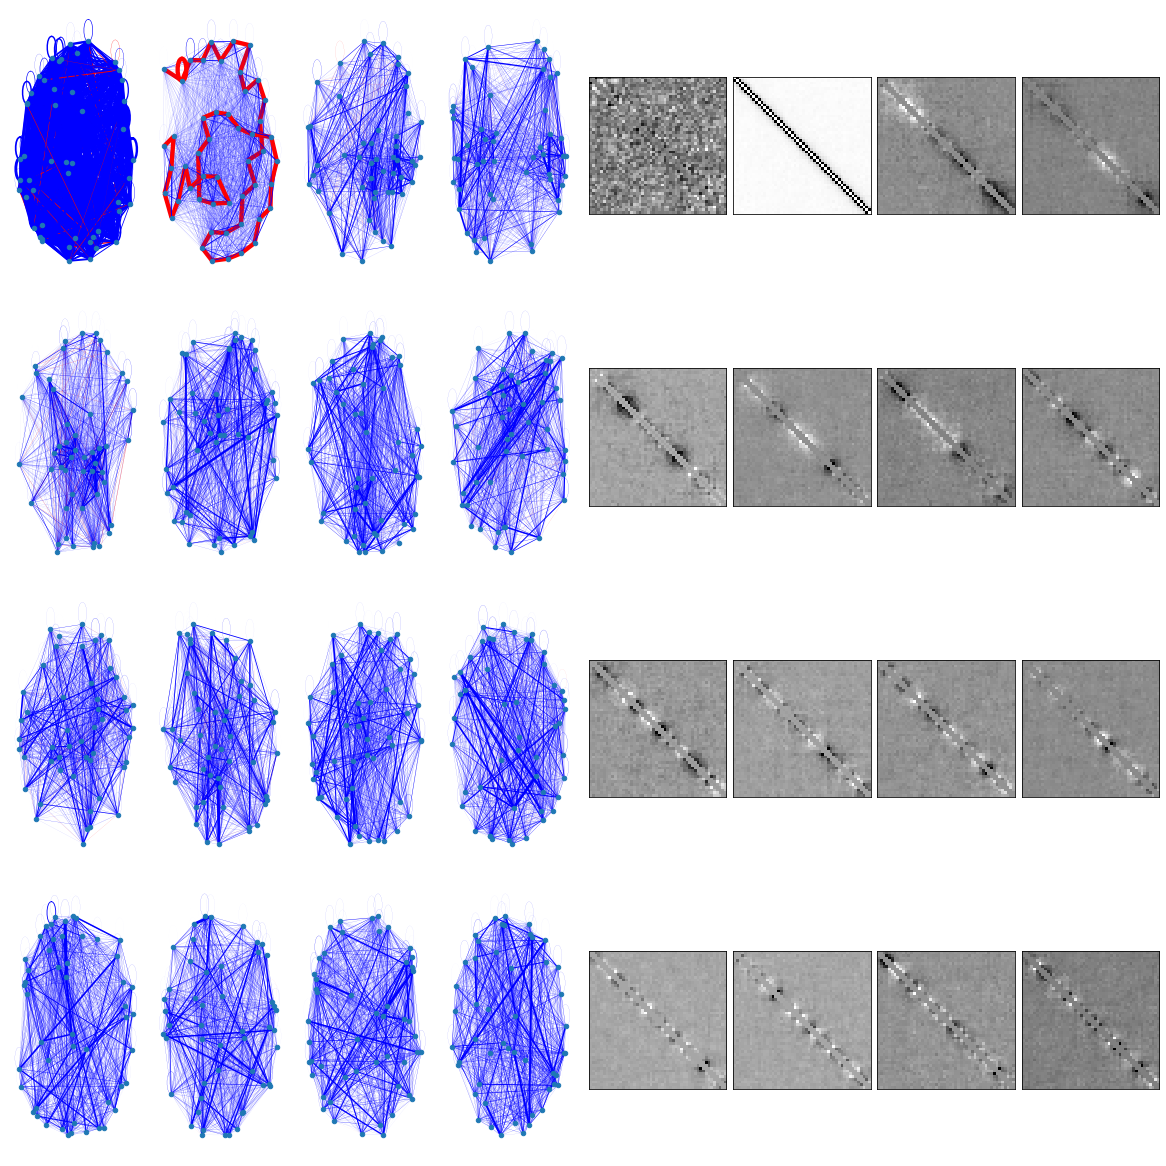

In [194]:
W = results_dict_new.get('loading')[0]
display_dict_and_graph(W=W, fig_size=[20,20])

## Check if dictionary contains negative values

In [196]:
results_dict_new['Accuracy (filter)']

0.622895622895623

In [197]:
# SDL_SVP_feature
data_scale=10
prediction_method_list = ['naive']
results_dict_list1 = []

for j in range(len(xi_list)):
    xi = xi_list[j]
    for i in range(iter_avg):
        data_scale=500
        SDL_SVP_class = SDL_SVP(X=[X_train.T/data_scale, Y_train.T],
                                X_test=[X_test.T/data_scale, Y_test.T],
                                n_components=r,
                                xi=xi,
                                L1_reg = [0,0,0],
                                L2_reg = [0,0,0],
                                full_dim=False)

        results_dict_new1 = SDL_SVP_class.fit(iter=iteration1, subsample_size=None,
                                            beta = 0,
                                            nu = 2,
                                            search_radius_const=0.01,
                                            update_nuance_param=False,
                                            SDL_option = 'feature',
                                            prediction_method_list = prediction_method_list,
                                            fine_tune_beta = False,
                                            if_compute_recons_error=True, if_validate=False)

        for pred_type in prediction_method_list:
            results_dict_new1.update({'method': 'SDL-conv-feat ({})'.format(str(pred_type))})
            results_dict_new1.update({'beta': None})
            results_dict_new1.update({'Accuracy': results_dict_new1.get('Accuracy ({})'.format(str(pred_type)))})
            results_dict_new1.update({'F_score': results_dict_new1.get('F_score ({})'.format(str(pred_type)))})
            results_dict_list1.append(results_dict_new1.copy())

initial loading beta [[ 0.85207516 -0.98704933 -0.57181887 -0.4432919  -0.04561411  0.10576292
   0.41694055 -0.09743986 -0.46611241 -0.38114977 -0.9053981   0.40597669
  -0.04482246  0.00731572  0.45711904 -0.80374945  0.13985299]]


  0%|▏                                          | 1/200 [00:00<00:34,  5.76it/s]

*** rel_error_data train 65014873.886373505
--- Training --- [threshold, AUC] =  [0.145, 0.493]
--- Iteration 0: Training loss --- [Data, Label, Total] = [25102502.867024.3, 338.570909.3, 338.570909.3]
error_time (1, 3)


  6%|██▋                                       | 13/200 [00:01<00:15, 12.03it/s]

*** rel_error_data train 65014873.88212382
--- Training --- [threshold, AUC] =  [0.154, 0.495]
--- Iteration 10: Training loss --- [Data, Label, Total] = [25102502.865384.3, 337.524409.3, 337.524409.3]
error_time (2, 3)


 12%|████▊                                     | 23/200 [00:02<00:17, 10.02it/s]

*** rel_error_data train 65014873.87801017
--- Training --- [threshold, AUC] =  [0.158, 0.496]
--- Iteration 20: Training loss --- [Data, Label, Total] = [25102502.863795.3, 336.742220.3, 336.742220.3]
error_time (3, 3)


 16%|██████▉                                   | 33/200 [00:02<00:15, 10.68it/s]

*** rel_error_data train 65014873.87402661
--- Training --- [threshold, AUC] =  [0.194, 0.498]
--- Iteration 30: Training loss --- [Data, Label, Total] = [25102502.862257.3, 335.989578.3, 335.989578.3]
error_time (4, 3)


 22%|█████████                                 | 43/200 [00:03<00:13, 11.83it/s]

*** rel_error_data train 65014873.870167315
--- Training --- [threshold, AUC] =  [0.193, 0.5]
--- Iteration 40: Training loss --- [Data, Label, Total] = [25102502.860767.3, 335.265319.3, 335.265319.3]
error_time (5, 3)


 26%|███████████▏                              | 53/200 [00:04<00:11, 12.98it/s]

*** rel_error_data train 65014873.86642666
--- Training --- [threshold, AUC] =  [0.25, 0.502]
--- Iteration 50: Training loss --- [Data, Label, Total] = [25102502.859323.3, 334.568315.3, 334.568315.3]
error_time (6, 3)


 32%|█████████████▏                            | 63/200 [00:05<00:10, 13.42it/s]

*** rel_error_data train 65014873.86279978
--- Training --- [threshold, AUC] =  [0.25, 0.503]
--- Iteration 60: Training loss --- [Data, Label, Total] = [25102502.857922.3, 333.897478.3, 333.897478.3]
error_time (7, 3)


 36%|███████████████▎                          | 73/200 [00:06<00:10, 12.68it/s]

*** rel_error_data train 65014873.859280765
--- Training --- [threshold, AUC] =  [0.252, 0.505]
--- Iteration 70: Training loss --- [Data, Label, Total] = [25102502.856564.3, 333.251757.3, 333.251757.3]
error_time (8, 3)


 42%|█████████████████▍                        | 83/200 [00:06<00:08, 13.52it/s]

*** rel_error_data train 65014873.85586454
--- Training --- [threshold, AUC] =  [0.253, 0.507]
--- Iteration 80: Training loss --- [Data, Label, Total] = [25102502.855245.3, 332.630139.3, 332.630139.3]
error_time (9, 3)


 46%|███████████████████▌                      | 93/200 [00:07<00:07, 13.39it/s]

*** rel_error_data train 65014873.85254682
--- Training --- [threshold, AUC] =  [0.253, 0.509]
--- Iteration 90: Training loss --- [Data, Label, Total] = [25102502.853964.3, 332.031643.3, 332.031643.3]
error_time (10, 3)


 52%|█████████████████████                    | 103/200 [00:08<00:07, 13.20it/s]

*** rel_error_data train 65014873.849323
--- Training --- [threshold, AUC] =  [0.255, 0.511]
--- Iteration 100: Training loss --- [Data, Label, Total] = [25102502.852719.3, 331.455325.3, 331.455325.3]
error_time (11, 3)


 56%|███████████████████████▏                 | 113/200 [00:08<00:06, 13.54it/s]

*** rel_error_data train 65014873.846187845
--- Training --- [threshold, AUC] =  [0.255, 0.514]
--- Iteration 110: Training loss --- [Data, Label, Total] = [25102502.851509.3, 330.900276.3, 330.900276.3]
error_time (12, 3)


 62%|█████████████████████████▏               | 123/200 [00:09<00:05, 13.20it/s]

*** rel_error_data train 65014873.84313836
--- Training --- [threshold, AUC] =  [0.195, 0.515]
--- Iteration 120: Training loss --- [Data, Label, Total] = [25102502.850331.3, 330.365616.3, 330.365616.3]
error_time (13, 3)


 66%|███████████████████████████▎             | 133/200 [00:10<00:05, 12.34it/s]

*** rel_error_data train 65014873.84016851
--- Training --- [threshold, AUC] =  [0.244, 0.517]
--- Iteration 130: Training loss --- [Data, Label, Total] = [25102502.849184.3, 329.850499.3, 329.850499.3]
error_time (14, 3)


 72%|█████████████████████████████▎           | 143/200 [00:11<00:04, 12.32it/s]

*** rel_error_data train 65014873.83727639
--- Training --- [threshold, AUC] =  [0.196, 0.519]
--- Iteration 140: Training loss --- [Data, Label, Total] = [25102502.848068.3, 329.354112.3, 329.354112.3]
error_time (15, 3)


 76%|███████████████████████████████▎         | 153/200 [00:12<00:03, 12.44it/s]

*** rel_error_data train 65014873.83445672
--- Training --- [threshold, AUC] =  [0.2, 0.521]
--- Iteration 150: Training loss --- [Data, Label, Total] = [25102502.846979.3, 328.875668.3, 328.875668.3]
error_time (16, 3)


 82%|█████████████████████████████████▍       | 163/200 [00:12<00:03, 11.94it/s]

*** rel_error_data train 65014873.83170611
--- Training --- [threshold, AUC] =  [0.201, 0.522]
--- Iteration 160: Training loss --- [Data, Label, Total] = [25102502.845917.3, 328.414412.3, 328.414412.3]
error_time (17, 3)


 86%|███████████████████████████████████▍     | 173/200 [00:13<00:02, 12.36it/s]

*** rel_error_data train 65014873.82902099
--- Training --- [threshold, AUC] =  [0.24, 0.524]
--- Iteration 170: Training loss --- [Data, Label, Total] = [25102502.844880.3, 327.969616.3, 327.969616.3]
error_time (18, 3)


 92%|█████████████████████████████████████▌   | 183/200 [00:14<00:01, 12.43it/s]

*** rel_error_data train 65014873.82639774
--- Training --- [threshold, AUC] =  [0.201, 0.526]
--- Iteration 180: Training loss --- [Data, Label, Total] = [25102502.843867.3, 327.540580.3, 327.540580.3]
error_time (19, 3)


 96%|███████████████████████████████████████▌ | 193/200 [00:15<00:00, 12.72it/s]

*** rel_error_data train 65014873.82383407
--- Training --- [threshold, AUC] =  [0.242, 0.528]
--- Iteration 190: Training loss --- [Data, Label, Total] = [25102502.842878.3, 327.126630.3, 327.126630.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:15<00:00, 12.73it/s]


!!! pred_type naive
--- Training --- [threshold, AUC] =  [0.586, 0.354]
!!! ACC_list [0.25252525252525254]
--- Validation (naive) --- [threshold, AUC, accuracy, rel_error_data] = [0.586, 0.343, 0.253, 0.967]
initial loading beta [[ 0.85434762  0.69559207  0.24071582  0.39519703 -0.29146833 -0.06553056
  -0.65362043  0.98622867 -0.65741565 -0.06102875 -0.71317451  0.34324296
  -0.49575912  0.39203005 -0.04798779  0.61404454  0.30099281]]


  1%|▍                                          | 2/200 [00:00<00:29,  6.81it/s]

*** rel_error_data train 66523757.46342965
--- Training --- [threshold, AUC] =  [0.077, 0.474]
--- Iteration 0: Training loss --- [Data, Label, Total] = [25685088.851660.3, 361.184750.3, 361.184750.3]
error_time (1, 3)


  6%|██▌                                       | 12/200 [00:01<00:17, 10.46it/s]

*** rel_error_data train 66523757.45826591
--- Training --- [threshold, AUC] =  [0.144, 0.476]
--- Iteration 10: Training loss --- [Data, Label, Total] = [25685088.849666.3, 340.351256.3, 340.351256.3]
error_time (2, 3)


 11%|████▌                                     | 22/200 [00:02<00:16, 10.62it/s]

*** rel_error_data train 66523757.45327519
--- Training --- [threshold, AUC] =  [0.148, 0.478]
--- Iteration 20: Training loss --- [Data, Label, Total] = [25685088.847739.3, 339.323639.3, 339.323639.3]
error_time (3, 3)


 16%|██████▋                                   | 32/200 [00:02<00:15, 11.17it/s]

*** rel_error_data train 66523757.44844949
--- Training --- [threshold, AUC] =  [0.148, 0.48]
--- Iteration 30: Training loss --- [Data, Label, Total] = [25685088.845876.3, 338.334324.3, 338.334324.3]
error_time (4, 3)


 22%|█████████▏                                | 44/200 [00:03<00:12, 12.85it/s]

*** rel_error_data train 66523757.44378278
--- Training --- [threshold, AUC] =  [0.15, 0.482]
--- Iteration 40: Training loss --- [Data, Label, Total] = [25685088.844074.3, 337.381905.3, 337.381905.3]
error_time (5, 3)


 27%|███████████▎                              | 54/200 [00:04<00:11, 12.96it/s]

*** rel_error_data train 66523757.4392684
--- Training --- [threshold, AUC] =  [0.154, 0.484]
--- Iteration 50: Training loss --- [Data, Label, Total] = [25685088.842331.3, 336.465020.3, 336.465020.3]
error_time (6, 3)


 31%|█████████████                             | 62/200 [00:05<00:12, 11.34it/s]

*** rel_error_data train 66523757.43489943
--- Training --- [threshold, AUC] =  [0.156, 0.486]
--- Iteration 60: Training loss --- [Data, Label, Total] = [25685088.840644.3, 335.582348.3, 335.582348.3]
error_time (7, 3)


 37%|███████████████▌                          | 74/200 [00:06<00:09, 12.81it/s]

*** rel_error_data train 66523757.43067027
--- Training --- [threshold, AUC] =  [0.157, 0.488]
--- Iteration 70: Training loss --- [Data, Label, Total] = [25685088.839012.3, 334.732606.3, 334.732606.3]
error_time (8, 3)


 42%|█████████████████▋                        | 84/200 [00:06<00:08, 13.28it/s]

*** rel_error_data train 66523757.426573485
--- Training --- [threshold, AUC] =  [0.158, 0.491]
--- Iteration 80: Training loss --- [Data, Label, Total] = [25685088.837430.3, 333.914554.3, 333.914554.3]
error_time (9, 3)


 46%|███████████████████▎                      | 92/200 [00:07<00:09, 11.47it/s]

*** rel_error_data train 66523757.42260377
--- Training --- [threshold, AUC] =  [0.16, 0.493]
--- Iteration 90: Training loss --- [Data, Label, Total] = [25685088.835897.3, 333.126987.3, 333.126987.3]
error_time (10, 3)


 51%|████████████████████▉                    | 102/200 [00:08<00:08, 11.36it/s]

*** rel_error_data train 66523757.4187558
--- Training --- [threshold, AUC] =  [0.161, 0.496]
--- Iteration 100: Training loss --- [Data, Label, Total] = [25685088.834411.3, 332.368743.3, 332.368743.3]
error_time (11, 3)


 57%|███████████████████████▎                 | 114/200 [00:09<00:06, 12.51it/s]

*** rel_error_data train 66523757.41502435
--- Training --- [threshold, AUC] =  [0.161, 0.498]
--- Iteration 110: Training loss --- [Data, Label, Total] = [25685088.832971.3, 331.638692.3, 331.638692.3]
error_time (12, 3)


 61%|█████████████████████████                | 122/200 [00:09<00:06, 12.00it/s]

*** rel_error_data train 66523757.411402665
--- Training --- [threshold, AUC] =  [0.16, 0.501]
--- Iteration 120: Training loss --- [Data, Label, Total] = [25685088.831572.3, 330.935746.3, 330.935746.3]
error_time (13, 3)


 66%|███████████████████████████              | 132/200 [00:10<00:05, 11.95it/s]

*** rel_error_data train 66523757.4078867
--- Training --- [threshold, AUC] =  [0.162, 0.503]
--- Iteration 130: Training loss --- [Data, Label, Total] = [25685088.830215.3, 330.258850.3, 330.258850.3]
error_time (14, 3)


 72%|█████████████████████████████▌           | 144/200 [00:11<00:04, 13.37it/s]

*** rel_error_data train 66523757.404472224
--- Training --- [threshold, AUC] =  [0.125, 0.506]
--- Iteration 140: Training loss --- [Data, Label, Total] = [25685088.828896.3, 329.606985.3, 329.606985.3]
error_time (15, 3)


 76%|███████████████████████████████▏         | 152/200 [00:12<00:04, 11.83it/s]

*** rel_error_data train 66523757.40115371
--- Training --- [threshold, AUC] =  [0.126, 0.508]
--- Iteration 150: Training loss --- [Data, Label, Total] = [25685088.827615.3, 328.979166.3, 328.979166.3]
error_time (16, 3)


 81%|█████████████████████████████████▏       | 162/200 [00:13<00:03, 12.25it/s]

*** rel_error_data train 66523757.39792781
--- Training --- [threshold, AUC] =  [0.167, 0.51]
--- Iteration 160: Training loss --- [Data, Label, Total] = [25685088.826370.3, 328.374442.3, 328.374442.3]
error_time (17, 3)


 86%|███████████████████████████████████▎     | 172/200 [00:13<00:02, 10.13it/s]

*** rel_error_data train 66523757.3947882
--- Training --- [threshold, AUC] =  [0.151, 0.513]
--- Iteration 170: Training loss --- [Data, Label, Total] = [25685088.825157.3, 327.791895.3, 327.791895.3]
error_time (18, 3)


 91%|█████████████████████████████████████▎   | 182/200 [00:14<00:01,  9.92it/s]

*** rel_error_data train 66523757.39173166
--- Training --- [threshold, AUC] =  [0.155, 0.515]
--- Iteration 180: Training loss --- [Data, Label, Total] = [25685088.823977.3, 327.230637.3, 327.230637.3]
error_time (19, 3)


 96%|███████████████████████████████████████▎ | 192/200 [00:15<00:00, 10.00it/s]

*** rel_error_data train 66523757.38875409
--- Training --- [threshold, AUC] =  [0.157, 0.517]
--- Iteration 190: Training loss --- [Data, Label, Total] = [25685088.822828.3, 326.689814.3, 326.689814.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:16<00:00, 12.10it/s]


!!! pred_type naive
--- Training --- [threshold, AUC] =  [0.146, 0.642]
!!! ACC_list [0.6464646464646465]
--- Validation (naive) --- [threshold, AUC, accuracy, rel_error_data] = [0.146, 0.656, 0.646, 0.967]
initial loading beta [[-0.89204019  0.48716108  0.78692535 -0.69515589 -0.77720069 -0.38312808
  -0.84585217  0.58028958  0.45689809 -0.04439788 -0.1178135  -0.95325048
   0.21880551  0.09571382 -0.52008134 -0.2916211   0.09868291]]


  2%|▋                                          | 3/200 [00:00<00:21,  9.05it/s]

*** rel_error_data train 65274550.374486454
--- Training --- [threshold, AUC] =  [0.15, 0.488]
--- Iteration 0: Training loss --- [Data, Label, Total] = [25202764.997791.3, 344.355847.3, 2520620.855626.3]
error_time (1, 3)


  6%|██▋                                       | 13/200 [00:01<00:18,  9.92it/s]

*** rel_error_data train 62712586.75003861
--- Training --- [threshold, AUC] =  [0.162, 0.49]
--- Iteration 10: Training loss --- [Data, Label, Total] = [24213580.594537.3, 342.877618.3, 2421700.937072.3]
error_time (2, 3)


 12%|████▊                                     | 23/200 [00:02<00:16, 10.68it/s]

*** rel_error_data train 60251177.745954506
--- Training --- [threshold, AUC] =  [0.163, 0.493]
--- Iteration 20: Training loss --- [Data, Label, Total] = [23263220.732424.3, 341.690429.3, 2326663.763672.3]
error_time (3, 3)


 16%|██████▉                                   | 33/200 [00:03<00:15, 10.61it/s]

*** rel_error_data train 57886376.68961615
--- Training --- [threshold, AUC] =  [0.167, 0.495]
--- Iteration 30: Training loss --- [Data, Label, Total] = [22350161.585368.3, 340.538661.3, 2235356.697198.3]
error_time (4, 3)


 22%|█████████                                 | 43/200 [00:04<00:14, 11.01it/s]

*** rel_error_data train 55614391.81152765
--- Training --- [threshold, AUC] =  [0.168, 0.497]
--- Iteration 40: Training loss --- [Data, Label, Total] = [21472939.135998.3, 339.421164.3, 2147633.334764.3]
error_time (5, 3)


 26%|███████████▏                              | 53/200 [00:05<00:14, 10.35it/s]

*** rel_error_data train 53431580.16551756
--- Training --- [threshold, AUC] =  [0.169, 0.5]
--- Iteration 50: Training loss --- [Data, Label, Total] = [20630146.828227.3, 338.336790.3, 2063353.019613.3]
error_time (6, 3)


 32%|█████████████▏                            | 63/200 [00:05<00:13, 10.43it/s]

*** rel_error_data train 51334441.78756349
--- Training --- [threshold, AUC] =  [0.173, 0.504]
--- Iteration 60: Training loss --- [Data, Label, Total] = [19820433.311945.3, 337.284389.3, 1982380.615584.3]
error_time (7, 3)


 36%|███████████████▎                          | 73/200 [00:06<00:12, 10.48it/s]

*** rel_error_data train 49319614.083882235
--- Training --- [threshold, AUC] =  [0.175, 0.506]
--- Iteration 70: Training loss --- [Data, Label, Total] = [19042500.276243.3, 336.262816.3, 1904586.290440.3]
error_time (8, 3)


 42%|█████████████████▍                        | 83/200 [00:07<00:11, 10.63it/s]

*** rel_error_data train 47383866.43927951
--- Training --- [threshold, AUC] =  [0.163, 0.509]
--- Iteration 80: Training loss --- [Data, Label, Total] = [18295100.367672.3, 335.270922.3, 1829845.307689.3]
error_time (9, 3)


 46%|███████████████████▌                      | 93/200 [00:08<00:10, 10.08it/s]

*** rel_error_data train 45524095.03711286
--- Training --- [threshold, AUC] =  [0.164, 0.512]
--- Iteration 90: Training loss --- [Data, Label, Total] = [17577035.190209.3, 334.307562.3, 1758037.826583.3]
error_time (10, 3)


 52%|█████████████████████                    | 103/200 [00:09<00:09, 10.31it/s]

*** rel_error_data train 43737317.882573634
--- Training --- [threshold, AUC] =  [0.164, 0.516]
--- Iteration 100: Training loss --- [Data, Label, Total] = [16887153.383733.3, 333.371591.3, 1689048.709964.3]
error_time (11, 3)


 56%|███████████████████████▏                 | 113/200 [00:10<00:08, 10.58it/s]

*** rel_error_data train 42020670.02129512
--- Training --- [threshold, AUC] =  [0.166, 0.518]
--- Iteration 110: Training loss --- [Data, Label, Total] = [16224348.777902.3, 332.461861.3, 1622767.339651.3]
error_time (12, 3)


 62%|█████████████████████████▏               | 123/200 [00:11<00:07, 10.68it/s]

*** rel_error_data train 40371398.94562715
--- Training --- [threshold, AUC] =  [0.169, 0.521]
--- Iteration 120: Training loss --- [Data, Label, Total] = [15587558.618502.3, 331.577227.3, 1559087.439077.3]
error_time (13, 3)


 66%|██████████████████████████▊              | 131/200 [00:12<00:07,  9.81it/s]

*** rel_error_data train 38786860.18121022
--- Training --- [threshold, AUC] =  [0.17, 0.524]
--- Iteration 130: Training loss --- [Data, Label, Total] = [14975761.863406.3, 330.716540.3, 1497906.902881.3]
error_time (14, 3)


 72%|█████████████████████████████▎           | 143/200 [00:13<00:06,  9.18it/s]

*** rel_error_data train 37264513.04677163
--- Training --- [threshold, AUC] =  [0.186, 0.527]
--- Iteration 140: Training loss --- [Data, Label, Total] = [14387977.545411.3, 329.878650.3, 1439127.633191.3]
error_time (15, 3)


 76%|███████████████████████████████▏         | 152/200 [00:14<00:05,  8.32it/s]

*** rel_error_data train 35801916.58034903
--- Training --- [threshold, AUC] =  [0.188, 0.53]
--- Iteration 150: Training loss --- [Data, Label, Total] = [13823263.199339.3, 329.062404.3, 1382655.382338.3]
error_time (16, 3)


 82%|█████████████████████████████████▍       | 163/200 [00:15<00:03, 11.38it/s]

*** rel_error_data train 34396725.62539803
--- Training --- [threshold, AUC] =  [0.189, 0.533]
--- Iteration 160: Training loss --- [Data, Label, Total] = [13280713.350869.3, 328.266643.3, 1328399.601730.3]
error_time (17, 3)


 86%|███████████████████████████████████▍     | 173/200 [00:16<00:02,  9.64it/s]

*** rel_error_data train 33046687.070525136
--- Training --- [threshold, AUC] =  [0.189, 0.536]
--- Iteration 170: Training loss --- [Data, Label, Total] = [12759458.064678.3, 327.490204.3, 1276273.296672.3]
error_time (18, 3)


 92%|█████████████████████████████████████▌   | 183/200 [00:17<00:01, 10.84it/s]

*** rel_error_data train 31749636.23680215
--- Training --- [threshold, AUC] =  [0.189, 0.539]
--- Iteration 180: Training loss --- [Data, Label, Total] = [12258661.549574.3, 326.731918.3, 1226192.886875.3]
error_time (19, 3)


 96%|███████████████████████████████████████▌ | 193/200 [00:18<00:00,  9.99it/s]

*** rel_error_data train 30503493.40687662
--- Training --- [threshold, AUC] =  [0.184, 0.541]
--- Iteration 190: Training loss --- [Data, Label, Total] = [11777520.818369.3, 325.990605.3, 1178078.072442.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:19<00:00, 10.37it/s]


!!! pred_type naive
--- Training --- [threshold, AUC] =  [0.417, 0.358]
!!! ACC_list [0.24915824915824916]
--- Validation (naive) --- [threshold, AUC, accuracy, rel_error_data] = [0.417, 0.346, 0.249, 0.967]
initial loading beta [[-0.07361674  0.23096989  0.61300597 -0.94766454  0.54967607 -0.88184371
  -0.04726866  0.11738499  0.55982162 -0.91901549 -0.94206937  0.38823641
   0.86655327  0.2097944  -0.34436136  0.92359937  0.42269281]]


  2%|▋                                          | 3/200 [00:00<00:20,  9.74it/s]

*** rel_error_data train 64771632.88854416
--- Training --- [threshold, AUC] =  [0.113, 0.522]
--- Iteration 0: Training loss --- [Data, Label, Total] = [25008586.544798.3, 349.480884.3, 2501208.135364.3]
error_time (1, 3)


  6%|██▋                                       | 13/200 [00:01<00:16, 11.05it/s]

*** rel_error_data train 62229408.29095419
--- Training --- [threshold, AUC] =  [0.161, 0.524]
--- Iteration 10: Training loss --- [Data, Label, Total] = [24027023.458771.3, 340.787117.3, 2403043.132994.3]
error_time (2, 3)


 12%|████▊                                     | 23/200 [00:02<00:17, 10.25it/s]

*** rel_error_data train 59786963.57573991
--- Training --- [threshold, AUC] =  [0.162, 0.527]
--- Iteration 20: Training loss --- [Data, Label, Total] = [23083985.784447.3, 339.635938.3, 2308738.214383.3]
error_time (3, 3)


 16%|██████▉                                   | 33/200 [00:03<00:16, 10.27it/s]

*** rel_error_data train 57440382.47800307
--- Training --- [threshold, AUC] =  [0.162, 0.529]
--- Iteration 30: Training loss --- [Data, Label, Total] = [22177961.436287.3, 338.512208.3, 2218134.655837.3]
error_time (4, 3)


 22%|█████████                                 | 43/200 [00:04<00:15,  9.97it/s]

*** rel_error_data train 55185902.44249621
--- Training --- [threshold, AUC] =  [0.168, 0.532]
--- Iteration 40: Training loss --- [Data, Label, Total] = [21307497.676658.3, 337.414885.3, 2131087.182551.3]
error_time (5, 3)


 26%|██████████▉                               | 52/200 [00:05<00:17,  8.37it/s]

*** rel_error_data train 53019908.59066592
--- Training --- [threshold, AUC] =  [0.17, 0.534]
--- Iteration 50: Training loss --- [Data, Label, Total] = [20471198.786490.3, 336.342918.3, 2047456.221567.3]
error_time (6, 3)


 31%|█████████████                             | 62/200 [00:06<00:16,  8.25it/s]

*** rel_error_data train 50938927.92448065
--- Training --- [threshold, AUC] =  [0.171, 0.537]
--- Iteration 60: Training loss --- [Data, Label, Total] = [19667723.827354.3, 335.295251.3, 1967107.677986.3]
error_time (7, 3)


 36%|███████████████▎                          | 73/200 [00:07<00:14,  8.85it/s]

*** rel_error_data train 48939623.7577581
--- Training --- [threshold, AUC] =  [0.172, 0.539]
--- Iteration 70: Training loss --- [Data, Label, Total] = [18895784.491365.3, 334.270815.3, 1889912.719951.3]
error_time (8, 3)


 41%|█████████████████▏                        | 82/200 [00:08<00:12,  9.57it/s]

*** rel_error_data train 47018790.36605453
--- Training --- [threshold, AUC] =  [0.172, 0.541]
--- Iteration 80: Training loss --- [Data, Label, Total] = [18154143.035495.3, 333.268534.3, 1815747.572084.3]
error_time (9, 3)


 46%|███████████████████▎                      | 92/200 [00:09<00:11,  9.08it/s]

*** rel_error_data train 45173347.84654336
--- Training --- [threshold, AUC] =  [0.173, 0.544]
--- Iteration 90: Training loss --- [Data, Label, Total] = [17441610.296942.3, 332.287322.3, 1744493.317017.3]
error_time (10, 3)


 51%|████████████████████▉                    | 102/200 [00:10<00:13,  7.53it/s]

*** rel_error_data train 43400337.179635465
--- Training --- [threshold, AUC] =  [0.174, 0.547]
--- Iteration 100: Training loss --- [Data, Label, Total] = [16757043.786406.3, 331.326082.3, 1676035.704722.3]
error_time (11, 3)


 56%|██████████████████████▉                  | 112/200 [00:11<00:11,  7.80it/s]

*** rel_error_data train 41696915.4844278
--- Training --- [threshold, AUC] =  [0.183, 0.55]
--- Iteration 110: Training loss --- [Data, Label, Total] = [16099345.856200.3, 330.383703.3, 1610264.969323.3]
error_time (12, 3)


 61%|█████████████████████████                | 122/200 [00:12<00:09,  8.07it/s]

*** rel_error_data train 40060351.460372075
--- Training --- [threshold, AUC] =  [0.184, 0.553]
--- Iteration 120: Training loss --- [Data, Label, Total] = [15467461.940256.3, 329.459063.3, 1547075.653088.3]
error_time (13, 3)


 66%|███████████████████████████              | 132/200 [00:14<00:08,  7.79it/s]

*** rel_error_data train 38488021.00785191
--- Training --- [threshold, AUC] =  [0.185, 0.556]
--- Iteration 130: Training loss --- [Data, Label, Total] = [14860378.863216.3, 328.551025.3, 1486366.437346.3]
error_time (14, 3)


 72%|█████████████████████████████▎           | 143/200 [00:15<00:07,  8.02it/s]

*** rel_error_data train 36977403.02065005
--- Training --- [threshold, AUC] =  [0.189, 0.558]
--- Iteration 140: Training loss --- [Data, Label, Total] = [14277123.215885.3, 327.658435.3, 1428039.980024.3]
error_time (15, 3)


 76%|██████████████████████████████▉          | 151/200 [00:16<00:06,  7.78it/s]

*** rel_error_data train 35526075.34355387
--- Training --- [threshold, AUC] =  [0.19, 0.561]
--- Iteration 150: Training loss --- [Data, Label, Total] = [13716759.794448.3, 326.780126.3, 1372002.759570.3]
error_time (16, 3)


 82%|█████████████████████████████████▍       | 163/200 [00:17<00:03,  9.33it/s]

*** rel_error_data train 34131710.888624676
--- Training --- [threshold, AUC] =  [0.189, 0.564]
--- Iteration 160: Training loss --- [Data, Label, Total] = [13178390.100942.3, 325.914905.3, 1318164.925000.3]
error_time (17, 3)


 86%|███████████████████████████████████▍     | 173/200 [00:18<00:02,  9.00it/s]

*** rel_error_data train 32792073.903897844
--- Training --- [threshold, AUC] =  [0.202, 0.567]
--- Iteration 170: Training loss --- [Data, Label, Total] = [12661150.902591.3, 325.061565.3, 1266440.151824.3]
error_time (18, 3)


 92%|█████████████████████████████████████▌   | 183/200 [00:19<00:01,  8.94it/s]

*** rel_error_data train 31505016.388532896
--- Training --- [threshold, AUC] =  [0.203, 0.57]
--- Iteration 180: Training loss --- [Data, Label, Total] = [12164212.847678.3, 324.218872.3, 1216745.503640.3]
error_time (19, 3)


 96%|███████████████████████████████████████▌ | 193/200 [00:20<00:00,  8.86it/s]

*** rel_error_data train 30268474.648666646
--- Training --- [threshold, AUC] =  [0.205, 0.574]
--- Iteration 190: Training loss --- [Data, Label, Total] = [11686779.135749.3, 323.385569.3, 1169001.299144.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:21<00:00,  9.23it/s]


!!! pred_type naive
--- Training --- [threshold, AUC] =  [0.152, 0.65]
!!! ACC_list [0.5892255892255892]
--- Validation (naive) --- [threshold, AUC, accuracy, rel_error_data] = [0.152, 0.652, 0.589, 0.968]
initial loading beta [[-0.81332514 -0.12889753 -0.29851857 -0.006026   -0.94130423  0.20467294
   0.1363802  -0.11339558 -0.54332925  0.2240762   0.84169509  0.84403994
  -0.7848168  -0.81667203 -0.16528886 -0.46141274  0.22001888]]


  2%|▋                                          | 3/200 [00:00<00:22,  8.86it/s]

*** rel_error_data train 62272047.50213118
--- Training --- [threshold, AUC] =  [0.231, 0.514]
--- Iteration 0: Training loss --- [Data, Label, Total] = [24043486.628763.3, 335.129081.3, 24043821.757844.3]
error_time (1, 3)


  6%|██▋                                       | 13/200 [00:01<00:20,  9.24it/s]

*** rel_error_data train 41573315.44401907
--- Training --- [threshold, AUC] =  [0.305, 0.516]
--- Iteration 10: Training loss --- [Data, Label, Total] = [16051623.386198.3, 334.106449.3, 16051957.492646.3]
error_time (2, 3)


 11%|████▌                                     | 22/200 [00:02<00:20,  8.72it/s]

*** rel_error_data train 27754676.914495092
--- Training --- [threshold, AUC] =  [0.24, 0.519]
--- Iteration 20: Training loss --- [Data, Label, Total] = [10716191.775394.3, 333.088556.3, 10716524.863950.3]
error_time (3, 3)


 16%|██████▋                                   | 32/200 [00:03<00:18,  8.91it/s]

*** rel_error_data train 18529243.670218028
--- Training --- [threshold, AUC] =  [0.241, 0.523]
--- Iteration 30: Training loss --- [Data, Label, Total] = [7154215.098046.3, 331.944782.3, 7154547.042827.3]
error_time (4, 3)


 21%|████████▊                                 | 42/200 [00:04<00:18,  8.60it/s]

*** rel_error_data train 12370270.889204655
--- Training --- [threshold, AUC] =  [0.246, 0.528]
--- Iteration 40: Training loss --- [Data, Label, Total] = [4776211.071405.3, 330.616274.3, 4776541.687680.3]
error_time (5, 3)


 26%|██████████▉                               | 52/200 [00:05<00:16,  8.71it/s]

*** rel_error_data train 8258491.557294689
--- Training --- [threshold, AUC] =  [0.248, 0.534]
--- Iteration 50: Training loss --- [Data, Label, Total] = [3188636.624238.3, 329.025123.3, 3188965.649361.3]
error_time (6, 3)


 31%|█████████████                             | 62/200 [00:06<00:16,  8.54it/s]

*** rel_error_data train 5513434.890475904
--- Training --- [threshold, AUC] =  [0.251, 0.543]
--- Iteration 60: Training loss --- [Data, Label, Total] = [2128759.264952.3, 327.072103.3, 2129086.337056.3]
error_time (7, 3)


 36%|███████████████                           | 72/200 [00:07<00:14,  8.58it/s]

*** rel_error_data train 3680813.169103934
--- Training --- [threshold, AUC] =  [0.255, 0.554]
--- Iteration 70: Training loss --- [Data, Label, Total] = [1421176.687844.3, 324.637834.3, 1421501.325677.3]
error_time (8, 3)


 41%|█████████████████▏                        | 82/200 [00:09<00:18,  6.35it/s]

*** rel_error_data train 2457340.2908750433
--- Training --- [threshold, AUC] =  [0.258, 0.569]
--- Iteration 80: Training loss --- [Data, Label, Total] = [948788.915668.3, 321.590358.3, 949110.506026.3]
error_time (9, 3)


 46%|███████████████████▎                      | 92/200 [00:09<00:11,  9.45it/s]

*** rel_error_data train 1640540.0375147525
--- Training --- [threshold, AUC] =  [0.259, 0.587]
--- Iteration 90: Training loss --- [Data, Label, Total] = [633419.070645.3, 317.801948.3, 633736.872593.3]
error_time (10, 3)


 51%|████████████████████▉                    | 102/200 [00:10<00:09, 10.19it/s]

*** rel_error_data train 1095237.6732499423
--- Training --- [threshold, AUC] =  [0.269, 0.611]
--- Iteration 100: Training loss --- [Data, Label, Total] = [422875.646592.3, 313.175188.3, 423188.821780.3]
error_time (11, 3)


 56%|██████████████████████▉                  | 112/200 [00:11<00:08, 10.53it/s]

*** rel_error_data train 731189.468202499
--- Training --- [threshold, AUC] =  [0.245, 0.641]
--- Iteration 110: Training loss --- [Data, Label, Total] = [282315.178431.3, 307.672542.3, 282622.850973.3]
error_time (12, 3)


 61%|█████████████████████████                | 122/200 [00:12<00:07, 10.78it/s]

*** rel_error_data train 488147.9891506439
--- Training --- [threshold, AUC] =  [0.247, 0.674]
--- Iteration 120: Training loss --- [Data, Label, Total] = [188475.891203.3, 301.337449.3, 188777.228652.3]
error_time (13, 3)


 66%|███████████████████████████              | 132/200 [00:13<00:06, 11.04it/s]

*** rel_error_data train 325891.5683145676
--- Training --- [threshold, AUC] =  [0.231, 0.711]
--- Iteration 130: Training loss --- [Data, Label, Total] = [125828.038093.3, 294.294528.3, 126122.332621.3]
error_time (14, 3)


 71%|█████████████████████████████            | 142/200 [00:14<00:05,  9.88it/s]

*** rel_error_data train 217567.89772456436
--- Training --- [threshold, AUC] =  [0.239, 0.75]
--- Iteration 140: Training loss --- [Data, Label, Total] = [84003.835583.3, 286.725749.3, 84290.561332.3]
error_time (15, 3)


 76%|███████████████████████████████▏         | 152/200 [00:15<00:05,  9.42it/s]

*** rel_error_data train 145250.1606591989
--- Training --- [threshold, AUC] =  [0.25, 0.789]
--- Iteration 150: Training loss --- [Data, Label, Total] = [56081.668031.3, 278.832746.3, 56360.500777.3]
error_time (16, 3)


 81%|█████████████████████████████████▏       | 162/200 [00:16<00:03,  9.74it/s]

*** rel_error_data train 96970.27022139789
--- Training --- [threshold, AUC] =  [0.226, 0.827]
--- Iteration 160: Training loss --- [Data, Label, Total] = [37440.609214.3, 270.801762.3, 37711.410976.3]
error_time (17, 3)


 86%|███████████████████████████████████▎     | 172/200 [00:17<00:02,  9.85it/s]

*** rel_error_data train 64738.235860482055
--- Training --- [threshold, AUC] =  [0.238, 0.861]
--- Iteration 170: Training loss --- [Data, Label, Total] = [24995.691819.3, 262.782600.3, 25258.474419.3]
error_time (18, 3)


 91%|█████████████████████████████████████▎   | 182/200 [00:18<00:01, 10.33it/s]

*** rel_error_data train 43219.876399867346
--- Training --- [threshold, AUC] =  [0.251, 0.891]
--- Iteration 180: Training loss --- [Data, Label, Total] = [16687.367157.3, 254.883029.3, 16942.250186.3]
error_time (19, 3)


 96%|███████████████████████████████████████▎ | 192/200 [00:19<00:00, 10.38it/s]

*** rel_error_data train 28854.050384470345
--- Training --- [threshold, AUC] =  [0.264, 0.917]
--- Iteration 190: Training loss --- [Data, Label, Total] = [11140.664270.3, 247.173468.3, 11387.837737.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:19<00:00, 10.08it/s]


!!! pred_type naive
--- Training --- [threshold, AUC] =  [0.399, 0.355]
!!! ACC_list [0.24915824915824916]
--- Validation (naive) --- [threshold, AUC, accuracy, rel_error_data] = [0.399, 0.341, 0.249, 0.967]
initial loading beta [[-0.59987746 -0.98817738 -0.55436732 -0.14959648  0.36641261  0.98956668
  -0.98259316  0.03045548  0.92908343  0.3159744  -0.5664782   0.51474517
   0.64955413  0.70951482  0.55515195  0.36475464  0.31116362]]


  2%|▋                                          | 3/200 [00:00<00:22,  8.58it/s]

*** rel_error_data train 63849799.291125394
--- Training --- [threshold, AUC] =  [0.121, 0.5]
--- Iteration 0: Training loss --- [Data, Label, Total] = [24652662.905501.3, 360.886425.3, 24653023.791926.3]
error_time (1, 3)


  6%|██▌                                       | 12/200 [00:01<00:20,  9.36it/s]

*** rel_error_data train 42626635.11370774
--- Training --- [threshold, AUC] =  [0.185, 0.502]
--- Iteration 10: Training loss --- [Data, Label, Total] = [16458314.323943.3, 348.211397.3, 16458662.535340.3]
error_time (2, 3)


 12%|████▊                                     | 23/200 [00:02<00:17, 10.24it/s]

*** rel_error_data train 28457881.51975386
--- Training --- [threshold, AUC] =  [0.186, 0.504]
--- Iteration 20: Training loss --- [Data, Label, Total] = [10987701.886303.3, 346.780492.3, 10988048.666795.3]
error_time (3, 3)


 16%|██████▉                                   | 33/200 [00:03<00:16, 10.15it/s]

*** rel_error_data train 18998708.666263167
--- Training --- [threshold, AUC] =  [0.179, 0.508]
--- Iteration 30: Training loss --- [Data, Label, Total] = [7335477.410879.3, 345.170593.3, 7335822.581472.3]
error_time (4, 3)


 22%|█████████                                 | 43/200 [00:04<00:15, 10.17it/s]

*** rel_error_data train 12683689.457471065
--- Training --- [threshold, AUC] =  [0.19, 0.512]
--- Iteration 40: Training loss --- [Data, Label, Total] = [4897223.234287.3, 343.304368.3, 4897566.538655.3]
error_time (5, 3)


 26%|███████████▏                              | 53/200 [00:05<00:14, 10.03it/s]

*** rel_error_data train 8467732.285028888
--- Training --- [threshold, AUC] =  [0.168, 0.519]
--- Iteration 50: Training loss --- [Data, Label, Total] = [3269425.306179.3, 341.083971.3, 3269766.390150.3]
error_time (6, 3)


 32%|█████████████▏                            | 63/200 [00:06<00:13, 10.14it/s]

*** rel_error_data train 5653125.660285465
--- Training --- [threshold, AUC] =  [0.166, 0.527]
--- Iteration 60: Training loss --- [Data, Label, Total] = [2182694.429939.3, 338.392563.3, 2183032.822502.3]
error_time (7, 3)


 36%|███████████████▎                          | 73/200 [00:07<00:12, 10.48it/s]

*** rel_error_data train 3774071.8322017994
--- Training --- [threshold, AUC] =  [0.175, 0.539]
--- Iteration 70: Training loss --- [Data, Label, Total] = [1457184.230700.3, 335.101995.3, 1457519.332695.3]
error_time (8, 3)


 42%|█████████████████▍                        | 83/200 [00:08<00:11, 10.02it/s]

*** rel_error_data train 2519600.510247494
--- Training --- [threshold, AUC] =  [0.175, 0.554]
--- Iteration 80: Training loss --- [Data, Label, Total] = [972827.835409.3, 331.088969.3, 973158.924378.3]
error_time (9, 3)


 46%|███████████████████▌                      | 93/200 [00:08<00:09, 10.93it/s]

*** rel_error_data train 1682105.4510581081
--- Training --- [threshold, AUC] =  [0.184, 0.573]
--- Iteration 90: Training loss --- [Data, Label, Total] = [649467.643075.3, 326.259181.3, 649793.902256.3]
error_time (10, 3)


 52%|█████████████████████                    | 103/200 [00:09<00:08, 10.78it/s]

*** rel_error_data train 1122987.0728675276
--- Training --- [threshold, AUC] =  [0.188, 0.595]
--- Iteration 100: Training loss --- [Data, Label, Total] = [433589.800782.3, 320.573797.3, 433910.374579.3]
error_time (11, 3)


 56%|███████████████████████▏                 | 113/200 [00:10<00:08, 10.75it/s]

*** rel_error_data train 749715.190360774
--- Training --- [threshold, AUC] =  [0.196, 0.622]
--- Iteration 110: Training loss --- [Data, Label, Total] = [289468.033859.3, 314.067849.3, 289782.101708.3]
error_time (12, 3)


 62%|█████████████████████████▏               | 123/200 [00:11<00:07, 10.23it/s]

*** rel_error_data train 500515.9133405203
--- Training --- [threshold, AUC] =  [0.211, 0.652]
--- Iteration 120: Training loss --- [Data, Label, Total] = [193251.196204.3, 306.850621.3, 193558.046826.3]
error_time (13, 3)


 66%|███████████████████████████▎             | 133/200 [00:12<00:06, 10.63it/s]

*** rel_error_data train 334148.4985775558
--- Training --- [threshold, AUC] =  [0.22, 0.686]
--- Iteration 130: Training loss --- [Data, Label, Total] = [129016.071895.3, 299.085977.3, 129315.157872.3]
error_time (14, 3)


 72%|█████████████████████████████▎           | 143/200 [00:13<00:05, 10.42it/s]

*** rel_error_data train 223080.29536516985
--- Training --- [threshold, AUC] =  [0.231, 0.72]
--- Iteration 140: Training loss --- [Data, Label, Total] = [86132.194362.3, 290.960786.3, 86423.155148.3]
error_time (15, 3)


 76%|███████████████████████████████▎         | 153/200 [00:14<00:04, 10.11it/s]

*** rel_error_data train 148930.28537475094
--- Training --- [threshold, AUC] =  [0.243, 0.754]
--- Iteration 150: Training loss --- [Data, Label, Total] = [57502.578904.3, 282.654266.3, 57785.233170.3]
error_time (16, 3)


 82%|█████████████████████████████████▍       | 163/200 [00:15<00:03, 10.15it/s]

*** rel_error_data train 99427.153719287
--- Training --- [threshold, AUC] =  [0.256, 0.787]
--- Iteration 160: Training loss --- [Data, Label, Total] = [38389.221760.3, 274.317551.3, 38663.539311.3]
error_time (17, 3)


 86%|███████████████████████████████████▍     | 173/200 [00:16<00:02, 10.98it/s]

*** rel_error_data train 66378.47278259814
--- Training --- [threshold, AUC] =  [0.269, 0.818]
--- Iteration 170: Training loss --- [Data, Label, Total] = [25628.993855.3, 266.065687.3, 25895.059542.3]
error_time (18, 3)


 90%|█████████████████████████████████████    | 181/200 [00:17<00:02,  9.30it/s]

*** rel_error_data train 44314.91288666405
--- Training --- [threshold, AUC] =  [0.278, 0.847]
--- Iteration 180: Training loss --- [Data, Label, Total] = [17110.165125.3, 257.978984.3, 17368.144109.3]
error_time (19, 3)


 96%|███████████████████████████████████████▌ | 193/200 [00:18<00:00, 10.31it/s]

*** rel_error_data train 29585.106314163728
--- Training --- [threshold, AUC] =  [0.284, 0.874]
--- Iteration 190: Training loss --- [Data, Label, Total] = [11422.927888.3, 250.109148.3, 11673.037037.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:18<00:00, 10.59it/s]


!!! pred_type naive
--- Training --- [threshold, AUC] =  [0.068, 0.65]
!!! ACC_list [0.5757575757575758]
--- Validation (naive) --- [threshold, AUC, accuracy, rel_error_data] = [0.068, 0.656, 0.576, 0.967]
initial loading beta [[ 0.58401373 -0.17590193 -0.11392441  0.86012671 -0.22172283 -0.80726984
   0.53499716 -0.67334464 -0.67427507  0.21942053 -0.20977656 -0.09403348
  -0.654411    0.18830982 -0.85068645 -0.41781396  0.96742199]]


  2%|▋                                          | 3/200 [00:00<00:22,  8.87it/s]

*** rel_error_data train 53244120.236554086
--- Training --- [threshold, AUC] =  [0.109, 0.477]
--- Iteration 0: Training loss --- [Data, Label, Total] = [20557767.799814.3, 351.534928.3, 102789190.534001.3]
error_time (1, 3)


  6%|██▋                                       | 13/200 [00:01<00:17, 10.55it/s]

*** rel_error_data train 6473242.319124552
--- Training --- [threshold, AUC] =  [0.13, 0.483]
--- Iteration 10: Training loss --- [Data, Label, Total] = [2499344.752383.3, 348.328611.3, 12497072.090527.3]
error_time (2, 3)


 12%|████▊                                     | 23/200 [00:02<00:18,  9.56it/s]

*** rel_error_data train 786995.4338545281
--- Training --- [threshold, AUC] =  [0.135, 0.503]
--- Iteration 20: Training loss --- [Data, Label, Total] = [303862.084993.3, 342.868141.3, 1519653.293105.3]
error_time (3, 3)


 16%|██████▉                                   | 33/200 [00:03<00:15, 10.67it/s]

*** rel_error_data train 95680.57640002617
--- Training --- [threshold, AUC] =  [0.145, 0.539]
--- Iteration 30: Training loss --- [Data, Label, Total] = [36942.653270.3, 333.430323.3, 185046.696675.3]
error_time (4, 3)


 22%|█████████                                 | 43/200 [00:04<00:16,  9.72it/s]

*** rel_error_data train 11632.839281733097
--- Training --- [threshold, AUC] =  [0.195, 0.582]
--- Iteration 40: Training loss --- [Data, Label, Total] = [4491.485778.3, 322.904651.3, 22780.333541.3]
error_time (5, 3)


 26%|███████████▏                              | 53/200 [00:05<00:14, 10.42it/s]

*** rel_error_data train 1414.5982613820277
--- Training --- [threshold, AUC] =  [0.217, 0.627]
--- Iteration 50: Training loss --- [Data, Label, Total] = [546.182047.3, 312.518750.3, 3043.428985.3]
error_time (6, 3)


 32%|█████████████▏                            | 63/200 [00:06<00:12, 10.77it/s]

*** rel_error_data train 172.29842403209918
--- Training --- [threshold, AUC] =  [0.231, 0.67]
--- Iteration 60: Training loss --- [Data, Label, Total] = [66.525111.3, 302.466296.3, 635.091850.3]
error_time (7, 3)


 36%|███████████████▎                          | 73/200 [00:07<00:12, 10.41it/s]

*** rel_error_data train 21.26161243644367
--- Training --- [threshold, AUC] =  [0.245, 0.711]
--- Iteration 70: Training loss --- [Data, Label, Total] = [8.209194.3, 292.767235.3, 333.813203.3]
error_time (8, 3)


 42%|█████████████████▍                        | 83/200 [00:07<00:11, 10.39it/s]

*** rel_error_data train 2.8894753466322687
--- Training --- [threshold, AUC] =  [0.221, 0.751]
--- Iteration 80: Training loss --- [Data, Label, Total] = [1.115638.3, 283.418696.3, 288.996886.3]
error_time (9, 3)


 46%|███████████████████▌                      | 93/200 [00:08<00:10, 10.58it/s]

*** rel_error_data train 0.6402998316329331
--- Training --- [threshold, AUC] =  [0.235, 0.789]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.247222.3, 274.414391.3, 275.650503.3]
error_time (10, 3)


 52%|█████████████████████                    | 103/200 [00:09<00:09, 10.57it/s]

*** rel_error_data train 0.3583404421185461
--- Training --- [threshold, AUC] =  [0.23, 0.822]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.138357.3, 265.747024.3, 266.438807.3]
error_time (11, 3)


 56%|███████████████████████▏                 | 113/200 [00:10<00:08,  9.94it/s]

*** rel_error_data train 0.32050685349202984
--- Training --- [threshold, AUC] =  [0.236, 0.854]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.123749.3, 257.408675.3, 258.027420.3]
error_time (12, 3)


 62%|█████████████████████████▏               | 123/200 [00:11<00:06, 11.00it/s]

*** rel_error_data train 0.3142357411416325
--- Training --- [threshold, AUC] =  [0.256, 0.881]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.121328.3, 249.390922.3, 249.997560.3]
error_time (13, 3)


 66%|███████████████████████████▎             | 133/200 [00:12<00:06, 10.86it/s]

*** rel_error_data train 0.31256379122496464
--- Training --- [threshold, AUC] =  [0.266, 0.906]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.120682.3, 241.684925.3, 242.288336.3]
error_time (14, 3)


 72%|█████████████████████████████▎           | 143/200 [00:13<00:05, 10.80it/s]

*** rel_error_data train 0.3118037953502538
--- Training --- [threshold, AUC] =  [0.28, 0.927]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.120389.3, 234.281517.3, 234.883460.3]
error_time (15, 3)


 76%|███████████████████████████████▎         | 153/200 [00:14<00:04, 10.27it/s]

*** rel_error_data train 0.31134036833637957
--- Training --- [threshold, AUC] =  [0.29, 0.944]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.120210.3, 227.171276.3, 227.772325.3]
error_time (16, 3)


 82%|█████████████████████████████████▍       | 163/200 [00:15<00:03, 11.21it/s]

*** rel_error_data train 0.3110213189777797
--- Training --- [threshold, AUC] =  [0.277, 0.958]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.120087.3, 220.344606.3, 220.945039.3]
error_time (17, 3)


 86%|███████████████████████████████████▍     | 173/200 [00:16<00:02, 11.35it/s]

*** rel_error_data train 0.31078826126242926
--- Training --- [threshold, AUC] =  [0.269, 0.97]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.119997.3, 213.791800.3, 214.391783.3]
error_time (18, 3)


 92%|█████████████████████████████████████▌   | 183/200 [00:17<00:01, 10.21it/s]

*** rel_error_data train 0.3106116562602759
--- Training --- [threshold, AUC] =  [0.282, 0.978]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.119928.3, 207.503107.3, 208.102749.3]
error_time (19, 3)


 96%|███████████████████████████████████████▌ | 193/200 [00:18<00:00, 10.56it/s]

*** rel_error_data train 0.3104743041364156
--- Training --- [threshold, AUC] =  [0.295, 0.985]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.119875.3, 201.468782.3, 202.068159.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:18<00:00, 10.66it/s]


!!! pred_type naive
--- Training --- [threshold, AUC] =  [0.414, 0.572]
!!! ACC_list [0.6296296296296297]
--- Validation (naive) --- [threshold, AUC, accuracy, rel_error_data] = [0.414, 0.574, 0.630, 0.591]
initial loading beta [[ 0.04530494 -0.38156152 -0.81739558 -0.14963947 -0.33270034 -0.61183457
  -0.18283982 -0.43601717  0.24778512 -0.86630876 -0.49874672 -0.34519993
  -0.86885101  0.62752172  0.01968778 -0.47679065 -0.41363553]]


  0%|▏                                          | 1/200 [00:00<00:27,  7.25it/s]

*** rel_error_data train 53226613.744791925
--- Training --- [threshold, AUC] =  [0.129, 0.512]
--- Iteration 0: Training loss --- [Data, Label, Total] = [20551008.473319.3, 348.355099.3, 102755390.721695.3]
error_time (1, 3)


  6%|██▋                                       | 13/200 [00:01<00:15, 11.87it/s]

*** rel_error_data train 6471113.944073445
--- Training --- [threshold, AUC] =  [0.18, 0.515]
--- Iteration 10: Training loss --- [Data, Label, Total] = [2498522.978263.3, 337.715597.3, 12492952.606910.3]
error_time (2, 3)


 12%|████▊                                     | 23/200 [00:01<00:13, 12.86it/s]

*** rel_error_data train 786736.6750787124
--- Training --- [threshold, AUC] =  [0.188, 0.527]
--- Iteration 20: Training loss --- [Data, Label, Total] = [303762.177195.3, 334.422946.3, 1519145.308919.3]
error_time (3, 3)


 16%|██████▉                                   | 33/200 [00:02<00:13, 12.81it/s]

*** rel_error_data train 95649.10962306683
--- Training --- [threshold, AUC] =  [0.183, 0.56]
--- Iteration 30: Training loss --- [Data, Label, Total] = [36930.503822.3, 326.600304.3, 184979.119414.3]
error_time (4, 3)


 22%|█████████                                 | 43/200 [00:03<00:12, 12.57it/s]

*** rel_error_data train 11629.011830668953
--- Training --- [threshold, AUC] =  [0.21, 0.604]
--- Iteration 40: Training loss --- [Data, Label, Total] = [4490.007984.3, 316.626369.3, 22766.666289.3]
error_time (5, 3)


 26%|███████████▏                              | 53/200 [00:04<00:12, 12.13it/s]

*** rel_error_data train 1414.1330807802044
--- Training --- [threshold, AUC] =  [0.219, 0.649]
--- Iteration 50: Training loss --- [Data, Label, Total] = [546.002439.3, 306.548152.3, 3036.560347.3]
error_time (6, 3)


 32%|█████████████▏                            | 63/200 [00:05<00:11, 12.13it/s]

*** rel_error_data train 172.24218450823867
--- Training --- [threshold, AUC] =  [0.222, 0.693]
--- Iteration 60: Training loss --- [Data, Label, Total] = [66.503396.3, 296.766753.3, 629.283735.3]
error_time (7, 3)


 36%|███████████████▎                          | 73/200 [00:05<00:10, 12.17it/s]

*** rel_error_data train 21.25446647747905
--- Training --- [threshold, AUC] =  [0.251, 0.735]
--- Iteration 70: Training loss --- [Data, Label, Total] = [8.206435.3, 287.328142.3, 328.360314.3]
error_time (8, 3)


 42%|█████████████████▍                        | 83/200 [00:06<00:09, 11.79it/s]

*** rel_error_data train 2.8873640791241835
--- Training --- [threshold, AUC] =  [0.265, 0.775]
--- Iteration 80: Training loss --- [Data, Label, Total] = [1.114823.3, 278.231901.3, 283.806015.3]
error_time (9, 3)


 46%|███████████████████▌                      | 93/200 [00:07<00:09, 11.83it/s]

*** rel_error_data train 0.6399111404392747
--- Training --- [threshold, AUC] =  [0.262, 0.811]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.247072.3, 269.471677.3, 270.707038.3]
error_time (10, 3)


 52%|█████████████████████                    | 103/200 [00:08<00:08, 11.60it/s]

*** rel_error_data train 0.3586740187665816
--- Training --- [threshold, AUC] =  [0.263, 0.845]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.138485.3, 261.039937.3, 261.732364.3]
error_time (11, 3)


 56%|███████████████████████▏                 | 113/200 [00:09<00:07, 11.82it/s]

*** rel_error_data train 0.32107856773846455
--- Training --- [threshold, AUC] =  [0.29, 0.874]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.123970.3, 252.928579.3, 253.548427.3]
error_time (12, 3)


 62%|█████████████████████████▏               | 123/200 [00:09<00:06, 12.11it/s]

*** rel_error_data train 0.31480556617285477
--- Training --- [threshold, AUC] =  [0.255, 0.901]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.121548.3, 245.129059.3, 245.736797.3]
error_time (13, 3)


 66%|███████████████████████████▎             | 133/200 [00:10<00:05, 12.55it/s]

*** rel_error_data train 0.3130570654642684
--- Training --- [threshold, AUC] =  [0.244, 0.922]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.120873.3, 237.632478.3, 238.236841.3]
error_time (14, 3)


 72%|█████████████████████████████▎           | 143/200 [00:11<00:04, 12.21it/s]

*** rel_error_data train 0.3122115835191109
--- Training --- [threshold, AUC] =  [0.267, 0.94]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.120546.3, 230.429664.3, 231.032395.3]
error_time (15, 3)


 76%|███████████████████████████████▎         | 153/200 [00:12<00:03, 13.19it/s]

*** rel_error_data train 0.31167283918625743
--- Training --- [threshold, AUC] =  [0.271, 0.956]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.120338.3, 223.511246.3, 224.112936.3]
error_time (16, 3)


 82%|█████████████████████████████████▍       | 163/200 [00:13<00:03, 12.01it/s]

*** rel_error_data train 0.3112917050036024
--- Training --- [threshold, AUC] =  [0.275, 0.968]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.120191.3, 216.867722.3, 217.468677.3]
error_time (17, 3)


 86%|███████████████████████████████████▍     | 173/200 [00:13<00:02, 12.10it/s]

*** rel_error_data train 0.3110083429433132
--- Training --- [threshold, AUC] =  [0.288, 0.977]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.120082.3, 210.489527.3, 211.089934.3]
error_time (18, 3)


 92%|█████████████████████████████████████▌   | 183/200 [00:14<00:01, 12.59it/s]

*** rel_error_data train 0.31079099449490294
--- Training --- [threshold, AUC] =  [0.271, 0.984]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.119998.3, 204.367081.3, 204.967069.3]
error_time (19, 3)


 96%|███████████████████████████████████████▌ | 193/200 [00:15<00:00, 12.49it/s]

*** rel_error_data train 0.3106205303008854
--- Training --- [threshold, AUC] =  [0.271, 0.989]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.119932.3, 198.490849.3, 199.090509.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:15<00:00, 12.55it/s]


!!! pred_type naive
--- Training --- [threshold, AUC] =  [0.798, 0.64]
!!! ACC_list [0.6127946127946128]
--- Validation (naive) --- [threshold, AUC, accuracy, rel_error_data] = [0.798, 0.569, 0.613, 0.596]
initial loading beta [[ 0.00198545 -0.50556159 -0.84230511  0.45681332 -0.77886604 -0.39198177
   0.05737427  0.51461252  0.06623677  0.24345005  0.14808417  0.47766238
   0.32943374 -0.60307031  0.77235203 -0.92825503 -0.79349524]]


  0%|▏                                          | 1/200 [00:00<00:26,  7.64it/s]

*** rel_error_data train 41427359.91196483
--- Training --- [threshold, AUC] =  [0.177, 0.52]
--- Iteration 0: Training loss --- [Data, Label, Total] = [15995269.371449.3, 340.778845.3, 159953034.493338.3]
error_time (1, 3)


  6%|██▋                                       | 13/200 [00:01<00:14, 12.79it/s]

*** rel_error_data train 477625.28275792056
--- Training --- [threshold, AUC] =  [0.189, 0.534]
--- Iteration 10: Training loss --- [Data, Label, Total] = [184413.032174.3, 336.250555.3, 1844466.572295.3]
error_time (2, 3)


 12%|████▊                                     | 23/200 [00:01<00:14, 12.45it/s]

*** rel_error_data train 5507.000257966735
--- Training --- [threshold, AUC] =  [0.185, 0.577]
--- Iteration 20: Training loss --- [Data, Label, Total] = [2126.274828.3, 325.852627.3, 21588.600903.3]
error_time (3, 3)


 16%|██████▉                                   | 33/200 [00:02<00:14, 11.67it/s]

*** rel_error_data train 63.84663460762797
--- Training --- [threshold, AUC] =  [0.2, 0.621]
--- Iteration 30: Training loss --- [Data, Label, Total] = [24.651441.3, 315.296790.3, 561.811200.3]
error_time (4, 3)


 22%|█████████                                 | 43/200 [00:03<00:13, 11.98it/s]

*** rel_error_data train 1.0677683862511655
--- Training --- [threshold, AUC] =  [0.214, 0.663]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.412270.3, 305.102007.3, 309.224703.3]
error_time (5, 3)


 26%|███████████▏                              | 53/200 [00:04<00:11, 12.58it/s]

*** rel_error_data train 0.3245834386885191
--- Training --- [threshold, AUC] =  [0.227, 0.704]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.125323.3, 295.270239.3, 296.523468.3]
error_time (6, 3)


 32%|█████████████▏                            | 63/200 [00:04<00:10, 13.12it/s]

*** rel_error_data train 0.31255153040338324
--- Training --- [threshold, AUC] =  [0.241, 0.744]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.120677.3, 285.795635.3, 287.002409.3]
error_time (7, 3)


 36%|███████████████▎                          | 73/200 [00:05<00:10, 12.46it/s]

*** rel_error_data train 0.3112923685665672
--- Training --- [threshold, AUC] =  [0.251, 0.782]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.120191.3, 276.671466.3, 277.873378.3]
error_time (8, 3)


 42%|█████████████████▍                        | 83/200 [00:06<00:09, 12.88it/s]

*** rel_error_data train 0.31075135261073056
--- Training --- [threshold, AUC] =  [0.268, 0.816]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.119982.3, 267.890278.3, 269.090101.3]
error_time (9, 3)


 46%|███████████████████▌                      | 93/200 [00:07<00:08, 12.22it/s]

*** rel_error_data train 0.31045129301339136
--- Training --- [threshold, AUC] =  [0.26, 0.848]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.119866.3, 259.444003.3, 260.642668.3]
error_time (10, 3)


 52%|█████████████████████                    | 103/200 [00:08<00:07, 12.81it/s]

*** rel_error_data train 0.3102681241765239
--- Training --- [threshold, AUC] =  [0.293, 0.876]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.119796.3, 251.324046.3, 252.522004.3]
error_time (11, 3)


 56%|███████████████████████▏                 | 113/200 [00:08<00:06, 12.45it/s]

*** rel_error_data train 0.3101497643748432
--- Training --- [threshold, AUC] =  [0.253, 0.901]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.119750.3, 243.521384.3, 244.718885.3]
error_time (12, 3)


 62%|█████████████████████████▏               | 123/200 [00:09<00:06, 11.35it/s]

*** rel_error_data train 0.3100700153130459
--- Training --- [threshold, AUC] =  [0.243, 0.923]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.119719.3, 236.026646.3, 237.223838.3]
error_time (13, 3)


 66%|███████████████████████████▎             | 133/200 [00:10<00:05, 12.17it/s]

*** rel_error_data train 0.31001425988625514
--- Training --- [threshold, AUC] =  [0.238, 0.941]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.119698.3, 228.830199.3, 230.027177.3]
error_time (14, 3)


 72%|█████████████████████████████▎           | 143/200 [00:11<00:04, 12.67it/s]

*** rel_error_data train 0.30997386129205334
--- Training --- [threshold, AUC] =  [0.269, 0.956]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.119682.3, 221.922228.3, 223.119050.3]
error_time (15, 3)


 76%|███████████████████████████████▎         | 153/200 [00:12<00:03, 12.28it/s]

*** rel_error_data train 0.3099435448138509
--- Training --- [threshold, AUC] =  [0.282, 0.968]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.119670.3, 215.292801.3, 216.489505.3]
error_time (16, 3)


 82%|█████████████████████████████████▍       | 163/200 [00:12<00:02, 12.91it/s]

*** rel_error_data train 0.3099200149059308
--- Training --- [threshold, AUC] =  [0.265, 0.978]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.119661.3, 208.931937.3, 210.128551.3]
error_time (17, 3)


 86%|███████████████████████████████████▍     | 173/200 [00:13<00:02, 12.60it/s]

*** rel_error_data train 0.30990117204612266
--- Training --- [threshold, AUC] =  [0.278, 0.985]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.119654.3, 202.829665.3, 204.026206.3]
error_time (18, 3)


 92%|█████████████████████████████████████▌   | 183/200 [00:14<00:01, 12.93it/s]

*** rel_error_data train 0.3098856524979327
--- Training --- [threshold, AUC] =  [0.292, 0.99]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.119648.3, 196.976075.3, 198.172556.3]
error_time (19, 3)


 96%|███████████████████████████████████████▌ | 193/200 [00:15<00:00, 12.78it/s]

*** rel_error_data train 0.3098725520058625
--- Training --- [threshold, AUC] =  [0.305, 0.994]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.119643.3, 191.361364.3, 192.557794.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:15<00:00, 12.80it/s]


!!! pred_type naive
--- Training --- [threshold, AUC] =  [0.365, 0.564]
!!! ACC_list [0.6498316498316499]
--- Validation (naive) --- [threshold, AUC, accuracy, rel_error_data] = [0.365, 0.569, 0.650, 0.591]
initial loading beta [[ 0.69498847 -0.38435623  0.14439147  0.10036007 -0.1470412  -0.21622072
  -0.11703035 -0.85303569 -0.36128331  0.40296865 -0.75234176  0.40821107
  -0.13659217 -0.81958183  0.81537804  0.73277121 -0.58290334]]


  0%|▏                                          | 1/200 [00:00<00:29,  6.66it/s]

*** rel_error_data train 42169694.79927056
--- Training --- [threshold, AUC] =  [0.138, 0.541]
--- Iteration 0: Training loss --- [Data, Label, Total] = [16281887.840778.3, 333.028882.3, 162819211.436657.3]
error_time (1, 3)


  6%|██▋                                       | 13/200 [00:01<00:15, 12.32it/s]

*** rel_error_data train 486183.8212968283
--- Training --- [threshold, AUC] =  [0.175, 0.558]
--- Iteration 10: Training loss --- [Data, Label, Total] = [187717.518138.3, 326.029507.3, 1877501.210886.3]
error_time (2, 3)


 12%|████▊                                     | 23/200 [00:01<00:13, 13.14it/s]

*** rel_error_data train 5605.673471854963
--- Training --- [threshold, AUC] =  [0.238, 0.605]
--- Iteration 20: Training loss --- [Data, Label, Total] = [2164.372950.3, 316.140470.3, 21959.869972.3]
error_time (3, 3)


 16%|██████▉                                   | 33/200 [00:02<00:12, 13.51it/s]

*** rel_error_data train 64.98424353237543
--- Training --- [threshold, AUC] =  [0.244, 0.653]
--- Iteration 30: Training loss --- [Data, Label, Total] = [25.090676.3, 306.014971.3, 556.921735.3]
error_time (4, 3)


 22%|█████████                                 | 43/200 [00:03<00:12, 12.26it/s]

*** rel_error_data train 1.0815750075477215
--- Training --- [threshold, AUC] =  [0.265, 0.7]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.417600.3, 296.236353.3, 300.412357.3]
error_time (5, 3)


 26%|███████████▏                              | 53/200 [00:04<00:11, 12.44it/s]

*** rel_error_data train 0.32592626271858566
--- Training --- [threshold, AUC] =  [0.226, 0.745]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.125841.3, 286.807266.3, 288.065680.3]
error_time (6, 3)


 32%|█████████████▏                            | 63/200 [00:04<00:11, 12.25it/s]

*** rel_error_data train 0.3133705507079528
--- Training --- [threshold, AUC] =  [0.239, 0.785]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.120994.3, 277.721709.3, 278.931645.3]
error_time (7, 3)


 36%|███████████████▎                          | 73/200 [00:05<00:10, 12.65it/s]

*** rel_error_data train 0.31182414404540004
--- Training --- [threshold, AUC] =  [0.253, 0.824]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.120397.3, 268.972822.3, 270.176788.3]
error_time (8, 3)


 42%|█████████████████▍                        | 83/200 [00:06<00:09, 12.41it/s]

*** rel_error_data train 0.3111447597831208
--- Training --- [threshold, AUC] =  [0.266, 0.857]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.120134.3, 260.553076.3, 261.754419.3]
error_time (9, 3)


 46%|███████████████████▌                      | 93/200 [00:07<00:08, 12.46it/s]

*** rel_error_data train 0.31078873160258774
--- Training --- [threshold, AUC] =  [0.249, 0.886]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.119997.3, 252.454381.3, 253.654348.3]
error_time (10, 3)


 52%|█████████████████████                    | 103/200 [00:08<00:07, 12.36it/s]

*** rel_error_data train 0.31058218217006095
--- Training --- [threshold, AUC] =  [0.258, 0.91]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.119917.3, 244.668178.3, 245.867348.3]
error_time (11, 3)


 56%|███████████████████████▏                 | 113/200 [00:08<00:06, 12.60it/s]

*** rel_error_data train 0.31044911724486235
--- Training --- [threshold, AUC] =  [0.252, 0.931]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.119866.3, 237.185536.3, 238.384192.3]
error_time (12, 3)


 62%|█████████████████████████▏               | 123/200 [00:09<00:06, 12.38it/s]

*** rel_error_data train 0.3103547016348412
--- Training --- [threshold, AUC] =  [0.259, 0.948]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.119829.3, 229.997228.3, 231.195520.3]
error_time (13, 3)


 66%|███████████████████████████▎             | 133/200 [00:10<00:05, 11.97it/s]

*** rel_error_data train 0.31028234179789055
--- Training --- [threshold, AUC] =  [0.279, 0.962]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.119801.3, 223.093818.3, 224.291831.3]
error_time (14, 3)


 72%|█████████████████████████████▎           | 143/200 [00:11<00:04, 12.08it/s]

*** rel_error_data train 0.3102237175026259
--- Training --- [threshold, AUC] =  [0.276, 0.973]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.119779.3, 216.465728.3, 217.663514.3]
error_time (15, 3)


 76%|███████████████████████████████▎         | 153/200 [00:12<00:04, 11.60it/s]

*** rel_error_data train 0.3101743648049873
--- Training --- [threshold, AUC] =  [0.298, 0.982]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.119760.3, 210.103307.3, 211.300903.3]
error_time (16, 3)


 82%|█████████████████████████████████▍       | 163/200 [00:12<00:03, 11.72it/s]

*** rel_error_data train 0.31013168597338464
--- Training --- [threshold, AUC] =  [0.302, 0.987]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.119743.3, 203.996891.3, 205.194322.3]
error_time (17, 3)


 86%|███████████████████████████████████▍     | 173/200 [00:13<00:02, 11.81it/s]

*** rel_error_data train 0.31009403553103637
--- Training --- [threshold, AUC] =  [0.284, 0.992]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.119729.3, 198.136857.3, 199.334142.3]
error_time (18, 3)


 92%|█████████████████████████████████████▌   | 183/200 [00:14<00:01, 11.22it/s]

*** rel_error_data train 0.31006028992362406
--- Training --- [threshold, AUC] =  [0.27, 0.995]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.119716.3, 192.513668.3, 193.710823.3]
error_time (19, 3)


 96%|███████████████████████████████████████▌ | 193/200 [00:15<00:00, 12.37it/s]

*** rel_error_data train 0.3100296375161869
--- Training --- [threshold, AUC] =  [0.272, 0.997]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.119704.3, 187.117916.3, 188.314953.3]
error_time (20, 3)


100%|█████████████████████████████████████████| 200/200 [00:16<00:00, 12.42it/s]


!!! pred_type naive
--- Training --- [threshold, AUC] =  [0.378, 0.565]
!!! ACC_list [0.67003367003367]
--- Validation (naive) --- [threshold, AUC, accuracy, rel_error_data] = [0.378, 0.568, 0.670, 0.591]


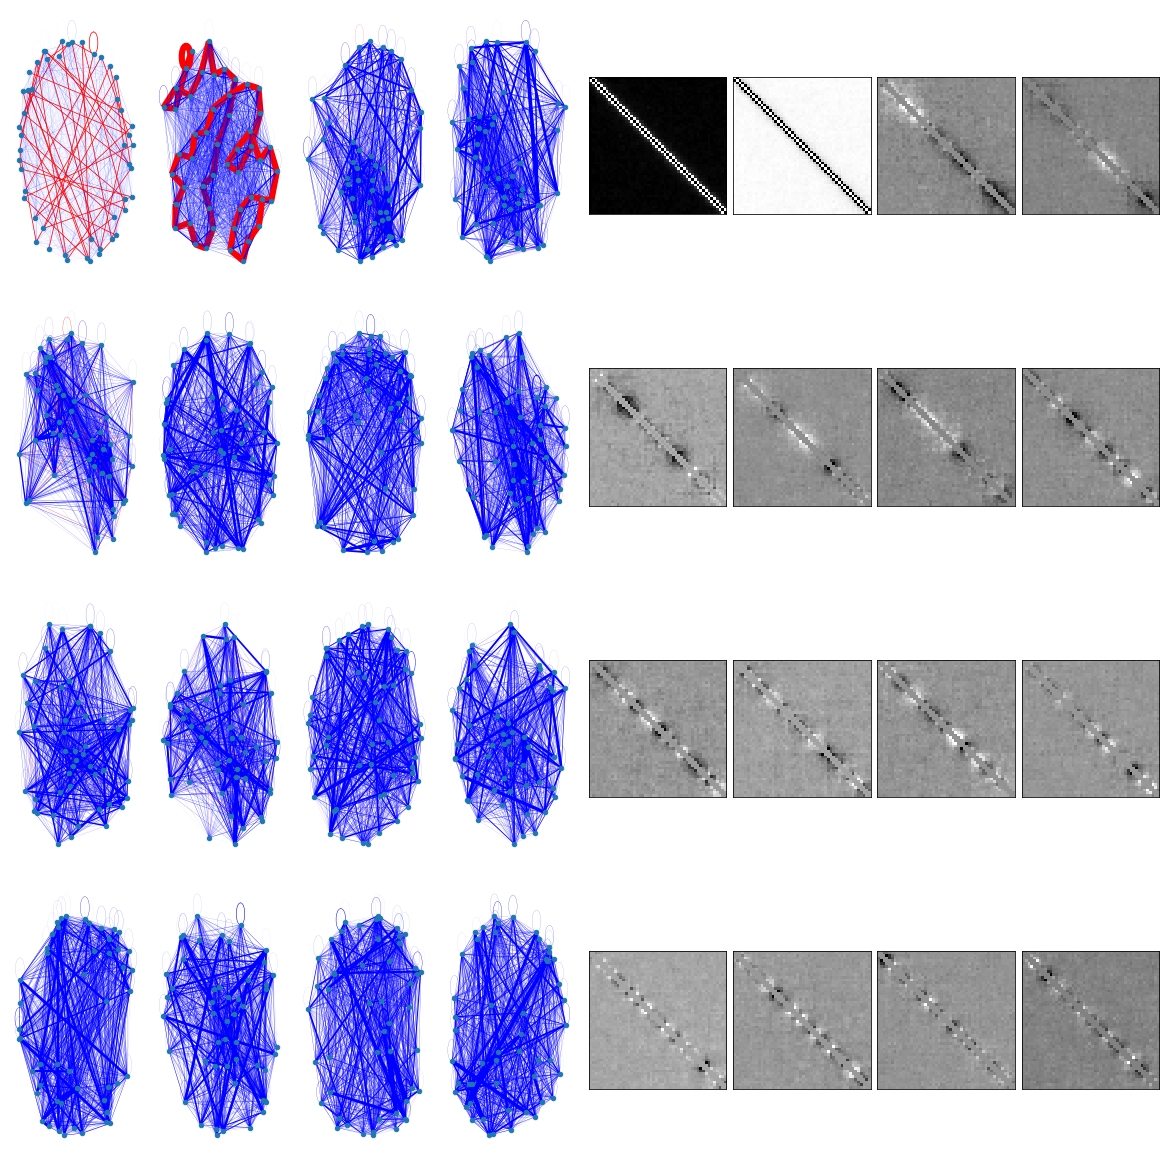

In [217]:
W = results_dict_new1.get('loading')[0]
display_dict_and_graph(W=W, fig_size=[20,20])

In [218]:
display_dict_and_graph?

In [199]:
results_dict_new1['Accuracy']

0.67003367003367

<AxesSubplot:>

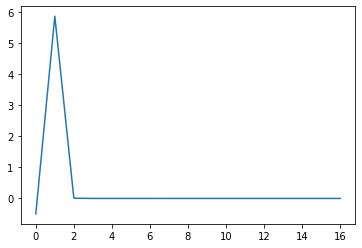

In [211]:
pd.Series(results_dict_new1.get('loading')[1].reshape(17,)).plot()

In [210]:
results_dict_new1.get('loading')[1].reshape(17,)

array([-4.98713265e-01,  5.86602202e+00,  7.70321803e-03,  5.00791807e-06,
       -1.98693867e-05,  3.13624242e-06, -5.19572422e-06, -1.44815805e-05,
        9.72887679e-06,  6.96385212e-06, -2.57976707e-06,  6.82878564e-06,
        1.88549991e-05,  2.13264447e-06,  1.07325752e-07,  1.29132822e-06,
        1.61111218e-05])